# DEEP EUTECTIC SOLVENTS. VISCOSITY. ML ALGORITHMS 

## 1. Preparation

In [1]:
#Installing the necessary libraries
!pip install pandas
!pip install openpyxl
!pip install sklearn
!pip install matplotlib
!pip install scikit-optimize
!pip install numpy
!pip install shap
!pip install catboost
!pip install xgboost
!pip install shap

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor
import math
import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import shap
plt.style.use('seaborn')

c:\Users\lera-\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import pubchempy as pcp
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor

import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdchem import PeriodicTable, GetPeriodicTable
from rdkit.Chem import Fragments
from rdkit.Chem.rdchem import EditableMol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem import PyMol
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

### 1.1. Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [4]:
#We move the predicted column to the end for convenience
db_final1 = pd.read_excel('viscosity_df_ML.xlsx')
db_final = db_final1.drop(columns=['Viscosity, cP'])
db_final.insert(0, 'Viscosity, cP', db_final1['Viscosity, cP'])

In [5]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d'] # Palette of colors

In [6]:
#Removing unnecessary columns
db_final = db_final.drop(['Unnamed: 0', 'isomer_smiles#1', 'isomer_smiles#2', 'isomer_smiles#3'], axis = 1)
#Table Information
db_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Viscosity, cP         4042 non-null   float64
 1   Component#1           4042 non-null   object 
 2   Component#2           4042 non-null   object 
 3   Component#3           4042 non-null   object 
 4   X#1 (molar fraction)  4042 non-null   float64
 5   X#2 (molar fraction)  4042 non-null   float64
 6   X#3 (molar fraction)  4042 non-null   float64
 7   I                     4042 non-null   int64  
 8   II                    4042 non-null   int64  
 9   III                   4042 non-null   int64  
 10  IV                    4042 non-null   int64  
 11  V                     4042 non-null   int64  
 12  Temperature, K        4042 non-null   float64
 13  VdWVolume, A^3#1      4042 non-null   float64
 14  VdWVolume, A^3#2      4042 non-null   float64
 15  VdWVolume, A^3#3     

In [7]:
db_final

Viscosity, cP       Component#1                    Component#2  \
0          7.153834   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
1          6.716595   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
2          6.008813   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
3          5.497168   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
4          4.852030   FERRIC CHLORIDE  Tetrabutylphosphonium bromide   
...             ...               ...                            ...   
4037       0.025863  CHOLINE CHLORIDE                       glycerol   
4038      -0.261105  CHOLINE CHLORIDE                       glycerol   
4039      -0.486946  CHOLINE CHLORIDE                       glycerol   
4040      -0.764858  CHOLINE CHLORIDE                       glycerol   
4041      -0.951400  CHOLINE CHLORIDE                       glycerol   

     Component#3  X#1 (molar fraction)  X#2 (molar fraction)  \
0              0                 0.333                 0.667   
1              0                 0.333                 0.667   
2              0                 0.333                 0.667   
3              0                 0.333                 0.667   
4              0                 0.333                 0.667   
...          ...                   ...                   ...   
4037       water                 0.048                 0.095   
4038       water                 0.033                 0.066   
4039       water                 0.022                 0.044   
4040       water                 0.013                 0.027   
4041       water                 0.006                 0.012   

      X#3 (molar fraction)  I  II  III  ...     Cl    K   Cr  Mn     Fe   Co  \
0                    0.000  1   0    0  ...  0.999  0.0  0.0   0  0.333  0.0   
1                    0.000  1   0    0  ...  0.999  0.0  0.0   0  0.333  0.0   
2                    0.000  1   0    0  ...  0.999  0.0  0.0   0  0.333  0.0   
3                    0.000  1   0    0  ...  0.999  0.0  0.0   0  0.333  0.0   
4                    0.000  1   0    0  ...  0.999  0.0  0.0   0  0.333  0.0   
...                    ... ..  ..  ...  ...    ...  ...  ...  ..    ...  ...   
4037                 0.857  0   0    1  ...  0.048  0.0  0.0   0  0.000  0.0   
4038                 0.901  0   0    1  ...  0.033  0.0  0.0   0  0.000  0.0   
4039                 0.934  0   0    1  ...  0.022  0.0  0.0   0  0.000  0.0   
4040                 0.960  0   0    1  ...  0.013  0.0  0.0   0  0.000  0.0   
4041                 0.982  0   0    1  ...  0.006  0.0  0.0   0  0.000  0.0   

       Cu   Zn     Br  ind_syst  
0     0.0  0.0  0.667       177  
1     0.0  0.0  0.667       177  
2     0.0  0.0  0.667       177  
3     0.0  0.0  0.667       177  
4     0.0  0.0  0.667       177  
...   ...  ...    ...       ...  
4037  0.0  0.0  0.000        96  
4038  0.0  0.0  0.000        96  
4039  0.0  0.0  0.000        96  
4040  0.0  0.0  0.000        96  
4041  0.0  0.0  0.000        96  

[4042 rows x 40 columns]

In [8]:
#Information on the final table
db_final.describe()

Viscosity, cP  X#1 (molar fraction)  X#2 (molar fraction)  \
count    4042.000000           4042.000000           4042.000000   
mean        3.291466              0.341001              0.579342   
std         1.646106              0.202019              0.232570   
min        -5.521461              0.006000              0.012000   
25%         2.333138              0.182500              0.435000   
50%         3.218676              0.333000              0.667000   
75%         4.276666              0.500000              0.750000   
max         7.200425              0.917000              0.950000   

       X#3 (molar fraction)            I      II          III           IV  \
count           4042.000000  4042.000000  4042.0  4042.000000  4042.000000   
mean               0.079668     0.005443     0.0     0.578674     0.060119   
std                0.207565     0.073584     0.0     0.493833     0.237736   
min                0.000000     0.000000     0.0     0.000000     0.000000   
25%                0.000000     0.000000     0.0     0.000000     0.000000   
50%                0.000000     0.000000     0.0     1.000000     0.000000   
75%                0.000000     0.000000     0.0     1.000000     0.000000   
max                0.982000     1.000000     0.0     1.000000     1.000000   

                 V  Temperature, K  ...           Cl            K  \
count  4042.000000     4042.000000  ...  4042.000000  4042.000000   
mean      0.518060      319.097437  ...     0.198507     0.000223   
std       0.499736       19.902628  ...     0.327848     0.008395   
min       0.000000      278.150000  ...     0.000000     0.000000   
25%       0.000000      303.150000  ...     0.000000     0.000000   
50%       1.000000      313.200000  ...     0.100000     0.000000   
75%       1.000000      333.150000  ...     0.286000     0.000000   
max       1.000000      373.150000  ...     3.001000     0.400000   

                Cr      Mn           Fe           Co           Cu  \
count  4042.000000  4042.0  4042.000000  4042.000000  4042.000000   
mean      0.000454     0.0     0.001171     0.000274     0.000165   
std       0.007713     0.0     0.022002     0.007147     0.010491   
min       0.000000     0.0     0.000000     0.000000     0.000000   
25%       0.000000     0.0     0.000000     0.000000     0.000000   
50%       0.000000     0.0     0.000000     0.000000     0.000000   
75%       0.000000     0.0     0.000000     0.000000     0.000000   
max       0.135000     0.0     0.667000     0.200000     0.667000   

                Zn           Br     ind_syst  
count  4042.000000  4042.000000  4042.000000  
mean      0.000791     0.013858   185.633845  
std       0.017059     0.064419   118.354755  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000    85.000000  
50%       0.000000     0.000000   127.500000  
75%       0.000000     0.000000   305.000000  
max       0.667000     0.999000   394.000000  

[8 rows x 37 columns]

### 1.2. Splitting data into test and train

In [9]:
# A function for splitting data so that different systems appear in the test and train sample
def custom_cv(x,y,groups,n_splits,test_size):
    custom_cv = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42) #randomized test/train indexes to split data according to a third-party group provided
    for train_idx, test_idx in kfold.split(x, y, groups): 
        custom_cv.append((train_idx, test_idx)) #Returning data as a tuple
    return custom_cv

In [10]:
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Viscosity, cP']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

### 1.3. Functions for plotting and calculating metrics

In [11]:
#Let's introduce a function for plotting graphs
def regr_plot(y_train, y_test, y_pred, y1_pred):
    f, ax = plt.subplots(figsize=(15, 10)) #Initialization - creating an empty graph
    plt.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train') #Prediction for the training sample
    plt.scatter(y_test, y_pred, color=colors[1],s=70, label='Test') #Prediction for the test sample
    plt.plot(y_train, y_train, color=colors[0]) #Building a straight line
    plt.xlabel('Test data', fontsize=35) #Signatures
    plt.ylabel('Predicted data', fontsize=35)
    plt.legend(fontsize = 30, frameon=False) #Creating a legend
    plt.xlim(-6, 11) #Intervals of x and y
    plt.ylim(-6, 11)
    plt.tick_params(axis='both', which='major', labelsize=30)
    x = x = np.linspace(-6, 11, 100)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    plt.fill_between(x, x-RMSE, x+RMSE, interpolate=True, color=colors[2], alpha=0.2)

In [12]:
#Let's introduce a function for calculating metrics
def regr_metrics(regr, x_train, y_train, y_test, y_pred, y1_pred):
    #Calculation of metrics
    R2 = metrics.r2_score(y_test, y_pred)
    R2_train = metrics.r2_score(y_train, y1_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y1_pred))
    
    #Metrics output
    print('r2_test:', R2)
    print('MAE_test:', MAE)
    print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE_test:', RMSE)
    print('r2_train:', metrics.r2_score(y_train, y1_pred))
    print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
    print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
    print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
    return [R2_train, R2, RMSE_train, RMSE]

In [13]:
#Function for finding metrics by different classes
def metrics_class(df, Name_method):
    df_error = pd.DataFrame(columns = ['Algorithm MO', 'Num_comp', 'Type', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']) 
    for num_fold in range(5):
        for type_DES in ['I','III','IV','V']:
            condition = (df['X#3 (molar fraction)'] == 0) & (df[type_DES] == 1) #Selection of binary systems of a certain class
            df_train = df[condition]
            df_test = df[condition]
            df_train = df_train.dropna(subset=['Viscosity_train'+ str(num_fold)])
            df_test = df_test.dropna(subset=['Viscosity_test'+ str(num_fold)])
            try:
                #Finding metrics
                R2_train = metrics.r2_score(df_train['Viscosity_lit'], df_train['Viscosity_train' + str(num_fold)])
                RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Viscosity_lit'], df_train['Viscosity_train' + str(num_fold)]))
            except:
                #If it is impossible, None is returned
                R2_train = None
                RMSE_train = None
            try:
                R2_test = metrics.r2_score(df_test['Viscosity_lit'], df_test['Viscosity_test' + str(num_fold)])
                RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Viscosity_lit'], df_test['Viscosity_test' + str(num_fold)]))
            except:
                R2_test = None
                RMSE_test = None
            df_error.loc[ len(df_error.index )] = [Name_method + str(num_fold), 2, type_DES, R2_train, R2_test, RMSE_train, RMSE_test]
        #For ternary systems
        condition = (df['X#3 (molar fraction)'] != 0)
        df_train = df[condition]
        df_test = df[condition]
        df_train = df_train.dropna(subset=['Viscosity_train' + str(num_fold)])
        df_test = df_test.dropna(subset=['Viscosity_test' + str(num_fold)])
        R2_train = metrics.r2_score(df_train['Viscosity_lit'], df_train['Viscosity_train'+ str(num_fold)])
        RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Viscosity_lit'], df_train['Viscosity_train'+ str(num_fold)]))
        R2_test = metrics.r2_score(df_test['Viscosity_lit'], df_test['Viscosity_test'+ str(num_fold)])
        RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Viscosity_lit'], df_test['Viscosity_test'+ str(num_fold)]))
        df_error.loc[len(df_error.index)] = [Name_method + str(num_fold), 3, None, R2_train, R2_test, RMSE_train, RMSE_test]
      #The function returns a table
    return df_error

In [15]:
#Let's introduce the Feature importance function
list_columns = db_final.loc[:, 'X#1 (molar fraction)' : 'Br'].columns
def regr_feature(regr, x_test, list_columns):
    explainer = shap.TreeExplainer(regr)
    shap_values = explainer.shap_values(x_test)
    f, ax = plt.subplots(figsize=(15, 13))
    shap.summary_plot(shap_values, x_test, plot_type='bar', color=colors[4], title='Feature importance', feature_names=list_columns, max_display = 10)

## 2. Linear Regression
Linear regression is the simplest machine learning method that finds a linear equation that best describes the correlation of dependent variables with independent ones


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6008149519470407
MAE_test: 0.6740755083952591
MSE_test: 0.9368094610714374
RMSE_test: 0.9678891780939786
r2_train: 0.4907847809127447
MAE_train: 0.8338697026474593
MSE_train: 1.4368363343050594
RMSE_train: 1.1986810811492186



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a D

r2_test: 0.13942192109292306
MAE_test: 0.8398075358791459
MSE_test: 1.2868447301577328
RMSE_test: 1.134391788650523
r2_train: 0.5619184835770712
MAE_train: 0.8119411119608398
MSE_train: 1.3361065439812931
RMSE_train: 1.1559007500565492



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.48609198960513567
MAE_test: 0.8268952279992229
MSE_test: 1.4517962348774027
RMSE_test: 1.2049050729735529
r2_train: 0.5139982123533527
MAE_train: 0.8101682330936354
MSE_train: 1.2937354194594266
RMSE_train: 1.1374249071738436



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.4551621698766535
MAE_test: 0.748125582536271
MSE_test: 1.1361968168214616
RMSE_test: 1.065925333605249
r2_train: 0.52896963684263
MAE_train: 0.8235056216480195
MSE_train: 1.3382566854534863
RMSE_train: 1.1568304480145248
r2_test: 0.33434914237364477
MAE_test: 0.9535364459616464
MSE_test: 1.6892958044729625
RMSE_test: 1.2997291273465261
r2_train: 0.5419225426212084
MAE_train: 0.7838034561187737
MSE_train: 1.242207839470539
RMSE_train: 1.1145437808675525



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  
0            0.528970            0.541923  
1            0.455162            0.334349  
2            1.156830            1.114544  
3            1.065925            1.299729

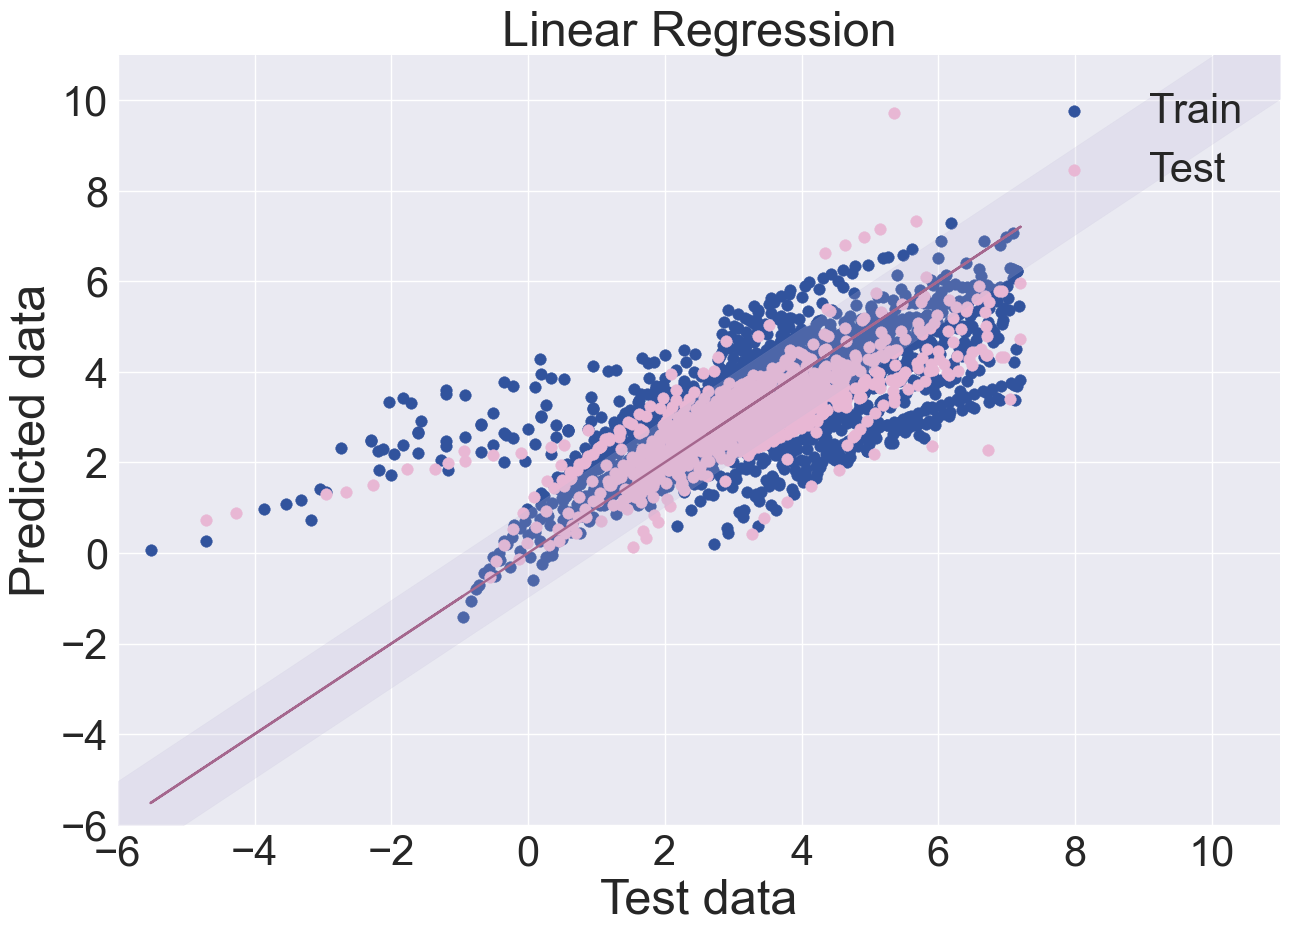

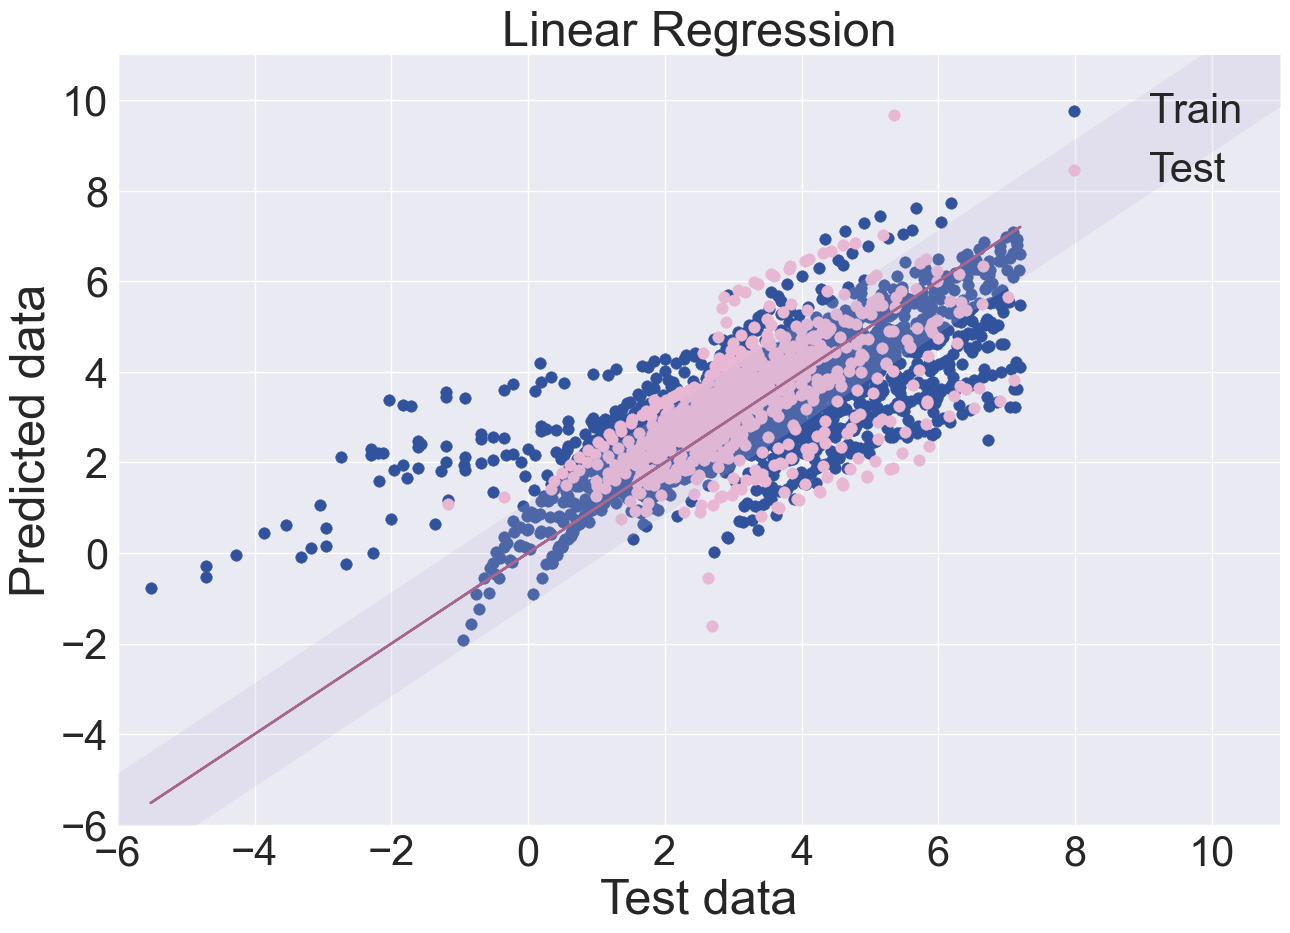

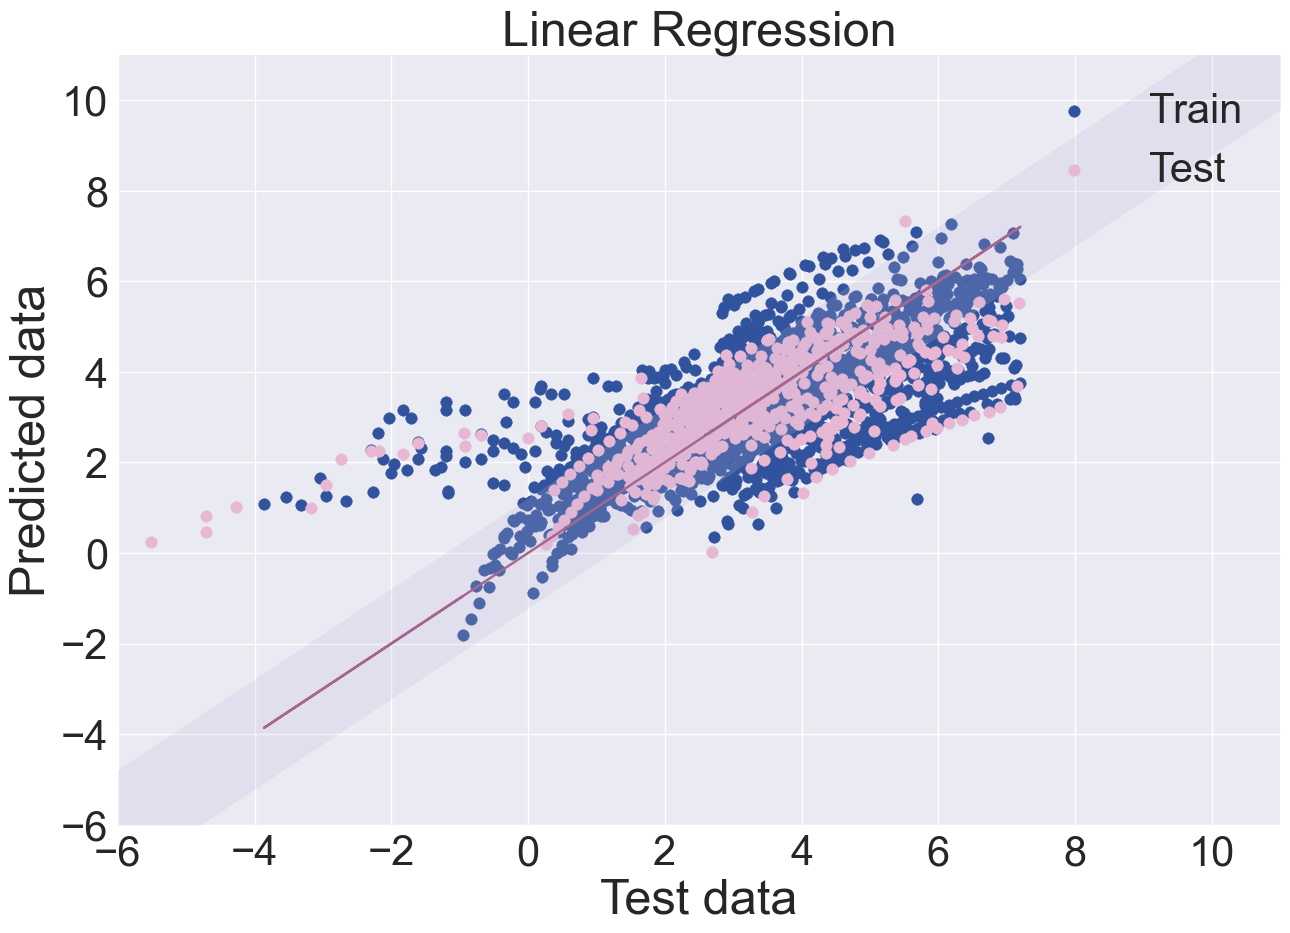

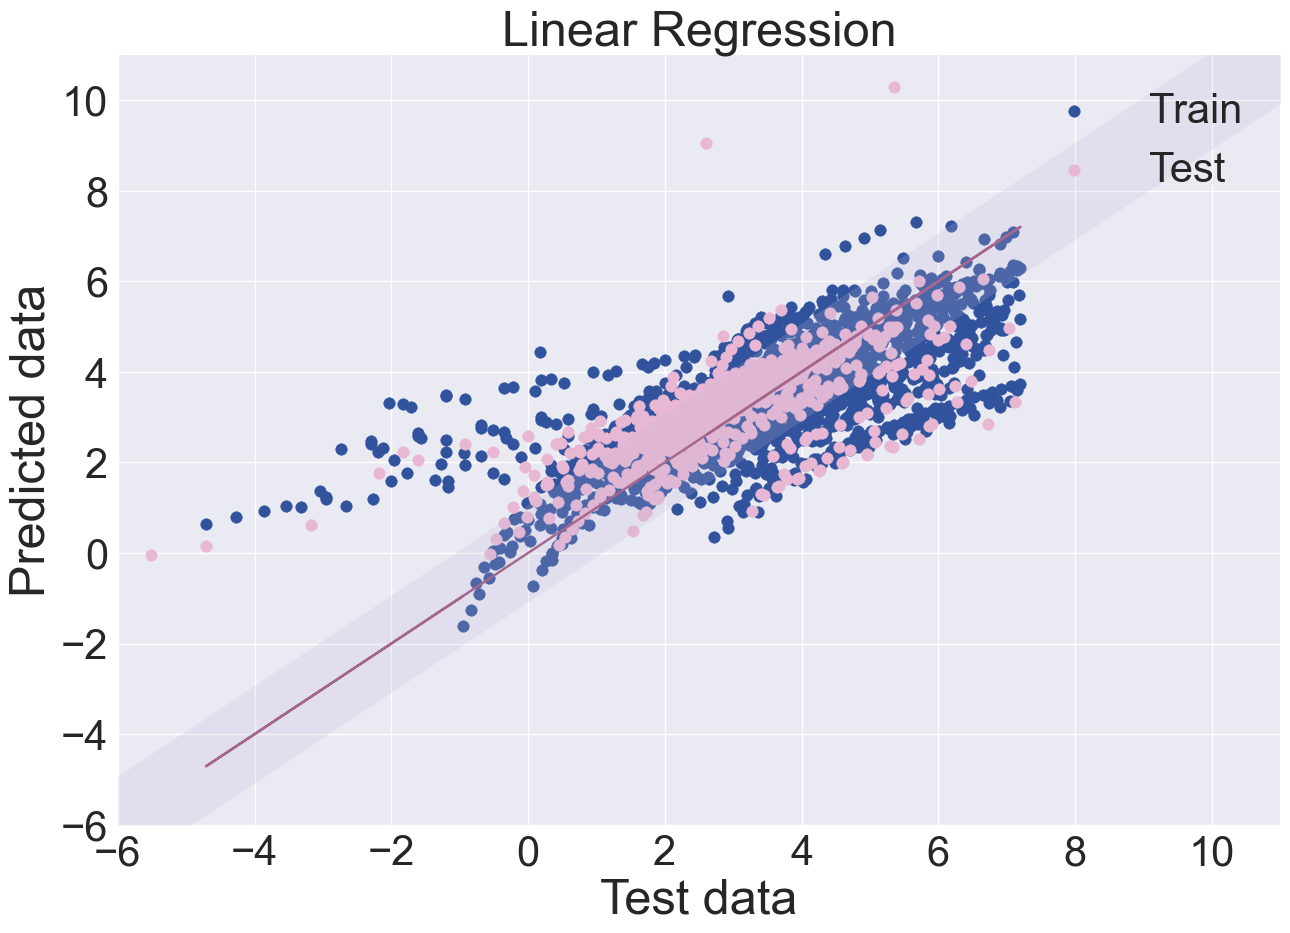

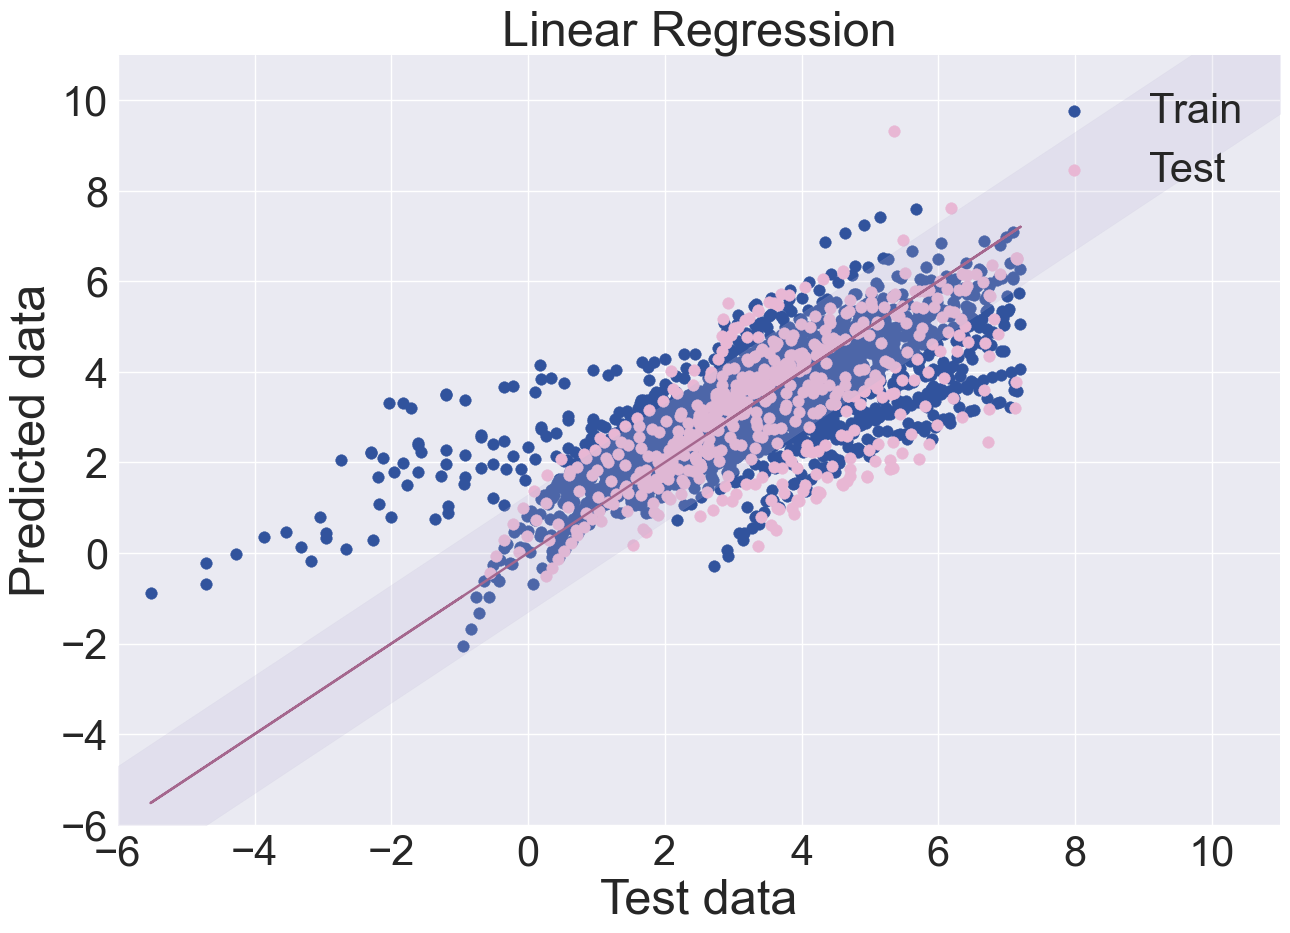

In [16]:
#LR for training dataset
# We split the sample so that there are different systems in the test and training
df_error_train = pd.DataFrame()
x_model = x_train.copy().drop(['ind_syst'],axis=1)
y_model = y_train.copy()
cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2)
count = 0    
#Creating a table to check accuracy on different DES classes
LR_df = x_model[:]
LR_df['Viscosity_lit'] = y_model

   #Scaling the data
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    name = 'x_test' + str(count) + '.xlsx'
    name1 = 'x_train' + str(count) + '.xlsx'
    db_final.iloc[x_test_mod.index].to_excel(name)
    db_final.iloc[x_train_mod.index].to_excel(name1)
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #Linear regression
    regr_LR = LinearRegression()
    regr_LR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_LR.predict(x_test_mod)
    y1_pred = regr_LR.predict(x_train_mod)

    #Filling in the table in accordance with the metrics
    LR_df['Viscosity_train' + str(count)] = None
    LR_df['Viscosity_test' + str(count)] = None
    LR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    LR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Linear Regression' + str(count)] = regr_metrics(regr_LR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Linear Regression', fontsize=35)
df_error_train

In [17]:
df_error_LR = metrics_class(LR_df, 'Linear Regression')
df_error_LR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train       R2_test  RMSE_train  \
0   Linear Regression0         2     I -0.276107           NaN    0.043133   
1   Linear Regression0         2   III  0.495297      0.622122    0.854815   
2   Linear Regression0         2    IV  0.872775      0.049778    0.334109   
3   Linear Regression0         2     V  0.162474       0.50946    1.620172   
4   Linear Regression0         3  None  0.764037      0.529463    0.884643   
5   Linear Regression1         2     I  0.817860 -11671.137605    0.016715   
6   Linear Regression1         2   III  0.571340      0.321801    0.824674   
7   Linear Regression1         2    IV  0.875280     -1.288606    0.291334   
8   Linear Regression1         2     V  0.273598     -0.087321    1.610998   
9   Linear Regression1         3  None  0.757192      0.365182    0.904095   
10  Linear Regression2         2     I  0.178239           NaN    0.029905   
11  Linear Regression2         2   III  0.516425       0.55186    0.867455   
12  Linear Regression2         2    IV  0.843517      0.373361    0.383036   
13  Linear Regression2         2     V  0.203137      0.346608    1.543391   
14  Linear Regression2         3  None  0.726440      0.181706    0.949537   
15  Linear Regression3         2     I  0.371021           NaN    0.024019   
16  Linear Regression3         2   III  0.481162      0.698078    0.873607   
17  Linear Regression3         2    IV  0.885864     -0.664332    0.280352   
18  Linear Regression3         2     V  0.257217      0.297597    1.481259   
19  Linear Regression3         3  None  0.754105      0.474374    0.955960   
20  Linear Regression4         2     I  0.226951          None    0.033571   
21  Linear Regression4         2   III  0.524879      0.445114    0.844444   
22  Linear Regression4         2    IV  0.843333     -0.149663    0.328460   
23  Linear Regression4         2     V  0.311511     -0.397222    1.498418   
24  Linear Regression4         3  None  0.761634      0.527426    0.878443   

   RMSE_test  
0        NaN  
1   0.793957  
2    0.63138  
3   1.192201  
4    1.16452  
5   3.779081  
6   0.920676  
7   0.974412  
8   1.351297  
9   0.923379  
10  2.668931  
11  0.824659  
12  0.357264  
13   1.46697  
14  1.147878  
15  6.446244  
16  0.599075  
17  0.865658  
18  1.632028  
19  1.060003  
20      None  
21   0.93839  
22  0.719469  
23  1.656182  
24  1.278345

**Output:** Linear regression has low accuracy characteristics, but can be used to compare other methods with it

## 3. Decision trees
A decision tree is a logical classification algorithm that solves classification and regression problems. It is a combination of logical conditions into a tree structure.other methods with it

### 3.1. Decision Tree Regressor
A decision tree is a decision-making tool that uses a tree-like structure similar to a flowchart, or is a model of decisions and all their possible outcomes, including outcomes, input costs and utility.

In [18]:
#We optimize for DTR
regr_DTR = DecisionTreeRegressor()

search_space = {"max_depth": Integer(1, 13),
                "criterion": Categorical(['squared_error', 'absolute_error']), 
                "min_samples_split": Real(0.01, 0.5), 
                "min_samples_leaf": Real(0.01, 0.2), 
                "max_features": Categorical(['auto', 'sqrt', 'log2'])}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_DTR = BayesSearchCV(estimator = regr_DTR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_DTR.fit(x_train01, y_model, sample_weight=sample_weight)


criterion = opt_DTR.best_estimator_.criterion
max_depth = opt_DTR.best_estimator_.max_depth
min_samples_split = opt_DTR.best_estimator_.min_samples_split
min_samples_leaf = opt_DTR.best_estimator_.min_samples_leaf
max_features = opt_DTR.best_estimator_.max_features


print('criterion:', criterion,'max_depth:', max_depth, 'min_samples_split:', min_samples_split,'min_samples_leaf:', min_samples_leaf,'max_features:', max_features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
criterion: squared_error max_depth: 7 min_samples_split: 0.3680495119537419 min_samples_leaf: 0.01 max_features: auto


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame


r2_test: -0.39295405778861725
MAE_test: 1.1523195438279004
MSE_test: 3.2689915279619965
RMSE_test: 1.808035267344638
r2_train: -0.4946292479182226
MAE_train: 1.415271994525135
MSE_train: 4.217347654245898
RMSE_train: 2.053618186091538
r2_test: 0.01609553037394318
MAE_test: 0.9003604434362658
MSE_test: 1.471257882056329
RMSE_test: 1.212954196190577
r2_train: -0.5377361317676246
MAE_train: 1.4798660523328695
MSE_train: 4.689947490475013
RMSE_train: 2.1656286594139385
r2_test: 0.06639146720059741
MAE_test: 1.1364544570143307
MSE_test: 2.6374551969449778
RMSE_test: 1.6240243831128207
r2_train: -0.6545892956901769
MAE_train: 1.4219801776288294
MSE_train: 4.404512145640819
RMSE_train: 2.0986929612596548
r2_test: -1.8392477063550445
MAE_test: 1.6928798127153017
MSE_test: 5.920925508050555
RMSE_test: 2.4332951954192805
r2_train: -0.22810617801686606
MAE_train: 1.257612572514003
MSE_train: 3.4892045857958927
RMSE_train: 1.867941269364723
r2_test: 0.1565078710100305
MAE_test: 1.1140783207538039


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.528970            0.541923                  -0.494629   
1            0.455162            0.334349                  -0.392954   
2            1.156830            1.114544                   2.053618   
3            1.065925            1.299729                   1.808035   

   Decision Tree Regression1  Decision Tree Regression2  \
0                  -0.537736                  -0.654589   
1                   0.016096                   0.066391   
2                   2.165629                   2.098693   
3                   1.212954                   1.624024   

   Decision Tree Regression3  Decision Tree Regression4  
0                  -0.228106                   0.272850  
1                  -1.839248                   0.156508  
2                   1.867941                   1.404235  
3                   2.433295                   1.463087

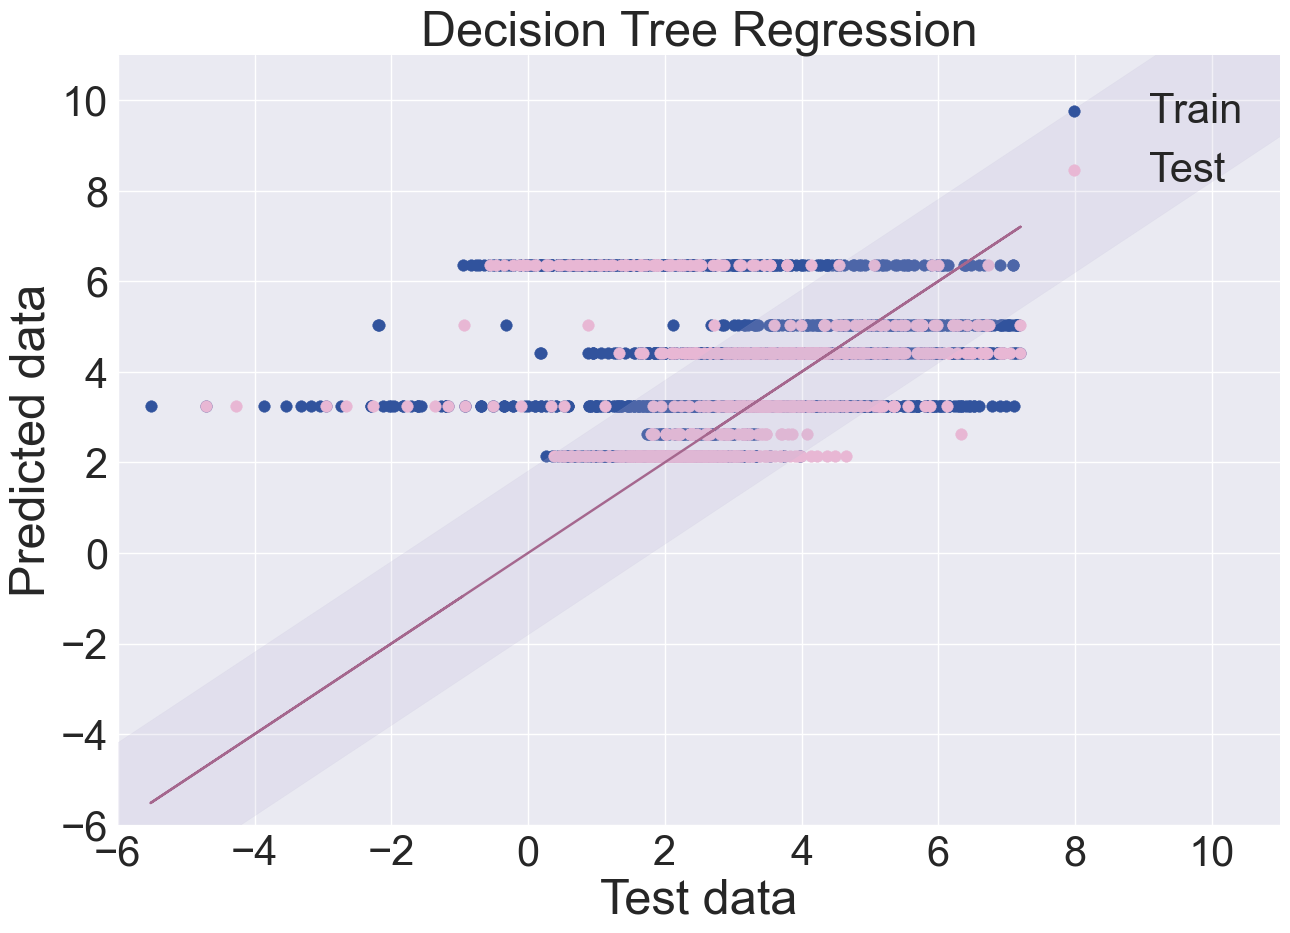

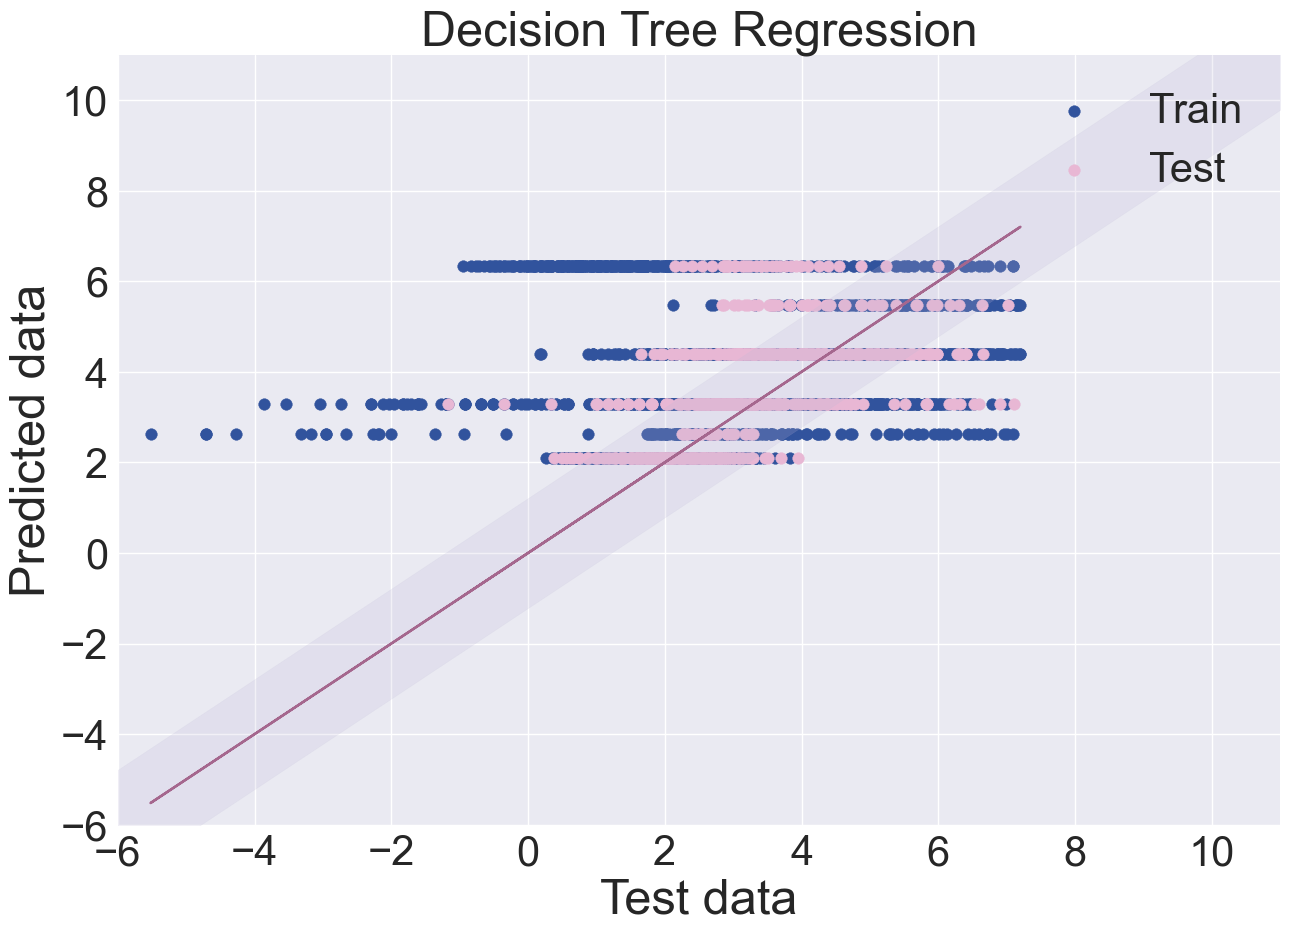

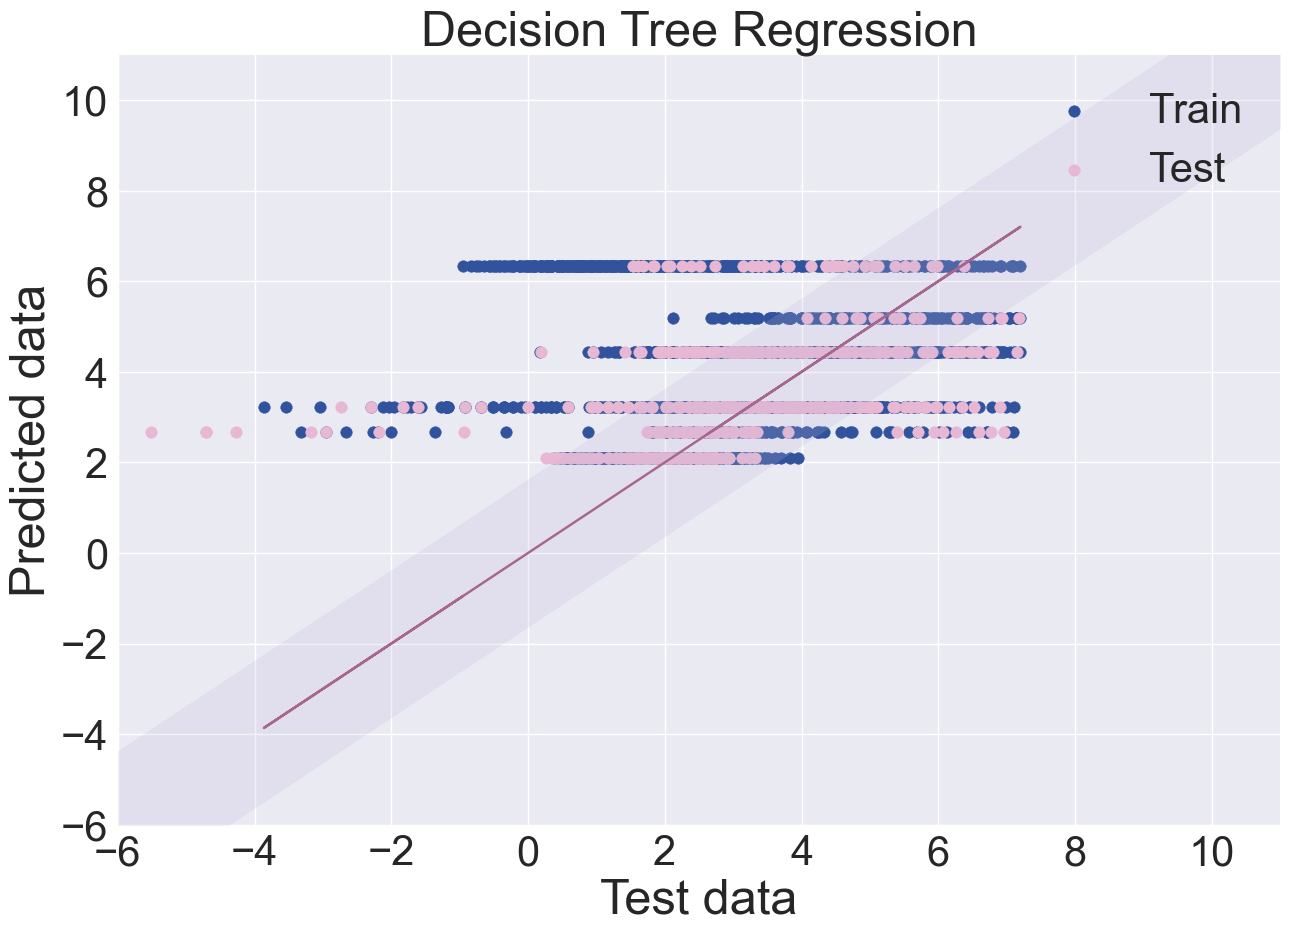

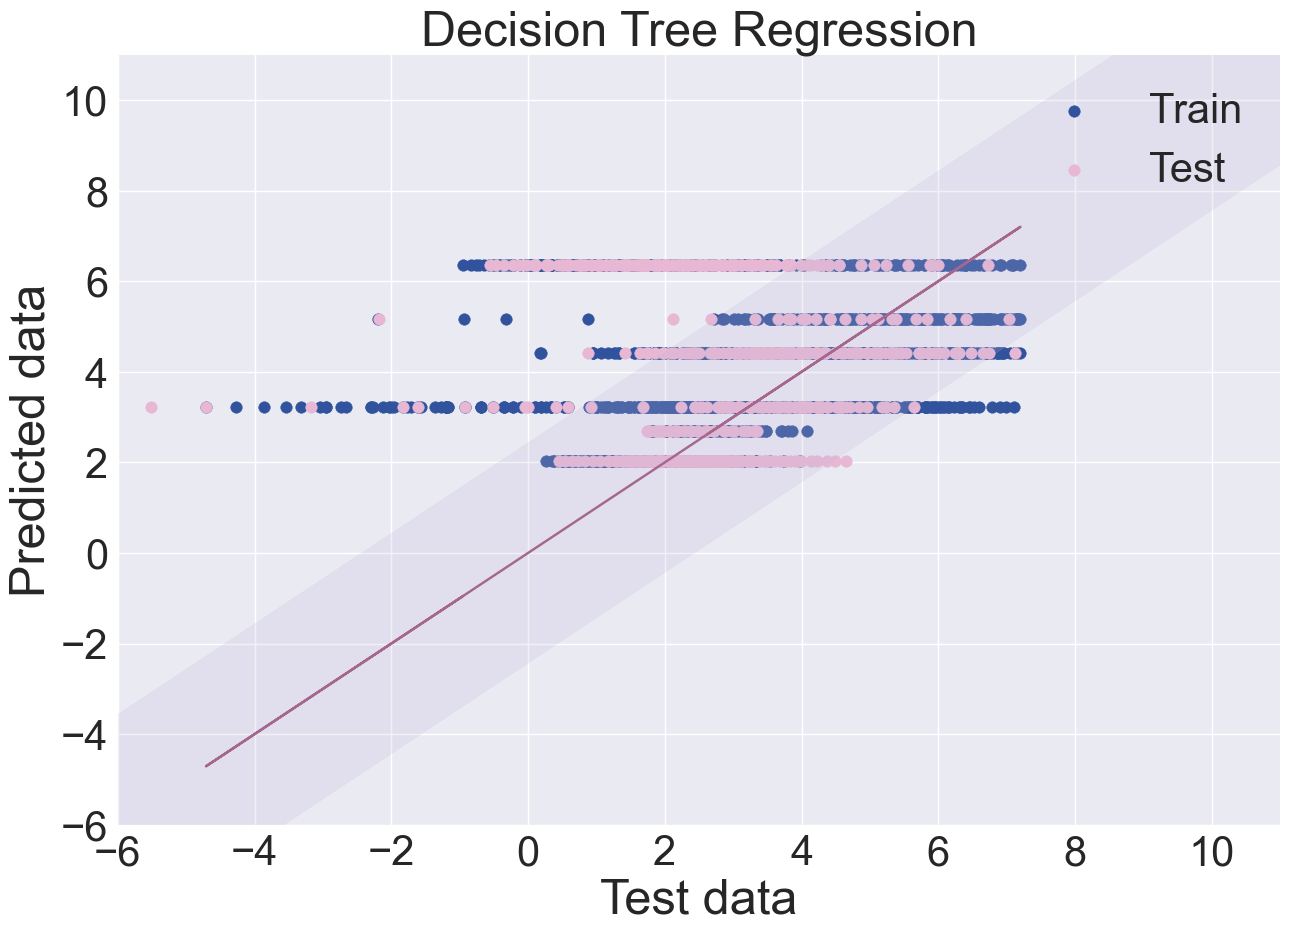

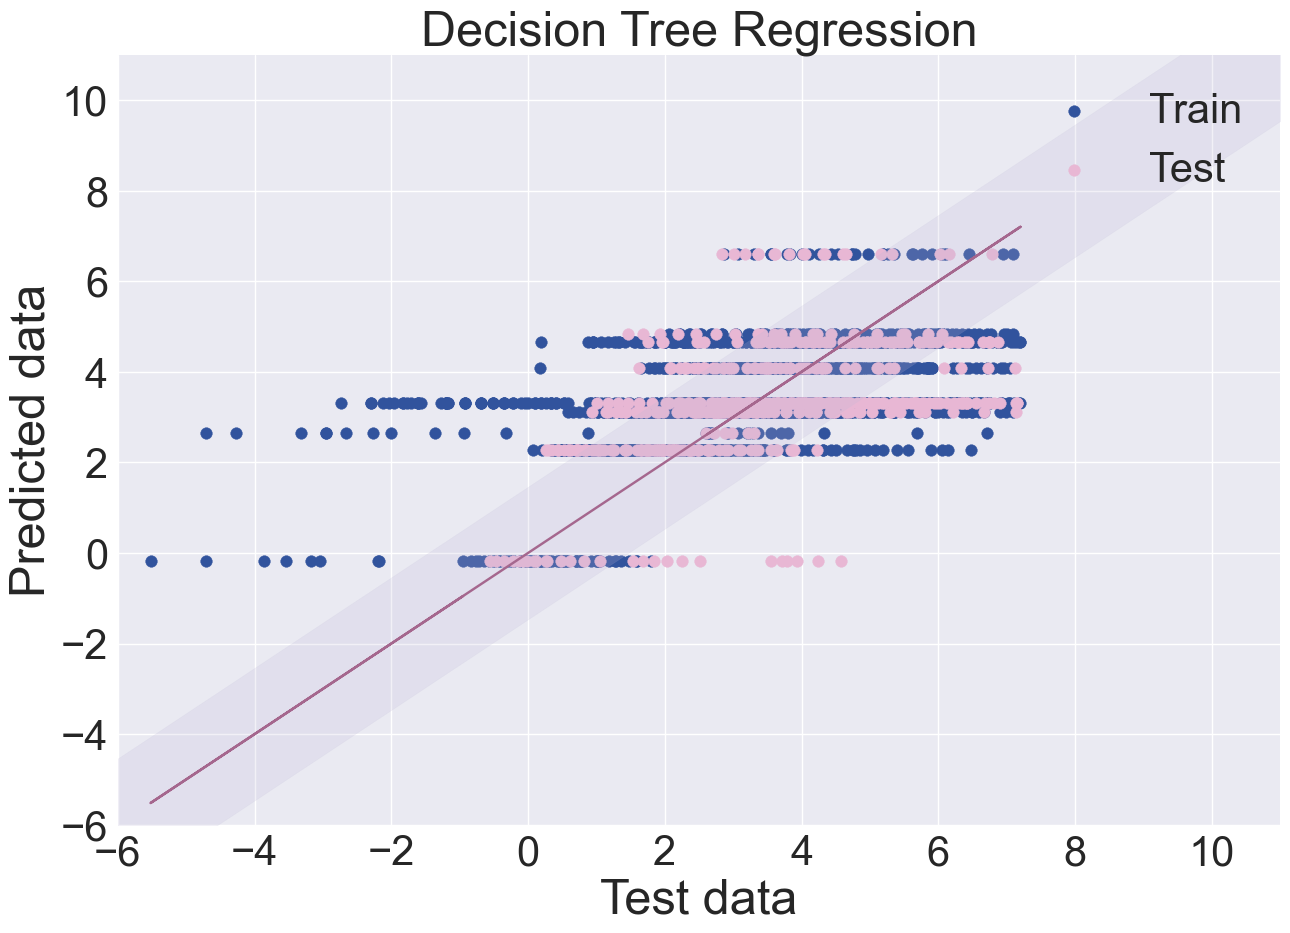

In [19]:
count = 0
#Creating a table to check accuracy on different DES classes
DTR_df = x_model[:]
DTR_df['Viscosity_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #DTR
    regr_DTR = DecisionTreeRegressor(criterion = criterion, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features)
    regr_DTR.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = regr_DTR.predict(x_test_mod)
    y1_pred = regr_DTR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    DTR_df['Viscosity_train' + str(count)] = None
    DTR_df['Viscosity_test' + str(count)] = None
    DTR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    DTR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Decision Tree Regression' + str(count)] = regr_metrics(regr_DTR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Decision Tree Regression', fontsize=35)
df_error_train

In [20]:
df_error_DTR = metrics_class(DTR_df, 'Decision Tree Regressor')
df_error_DTR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train   R2_test  RMSE_train  \
0   Decision Tree Regressor0         2     I -0.746353       NaN    0.050458   
1   Decision Tree Regressor0         2   III  0.220091  0.486945    1.062615   
2   Decision Tree Regressor0         2    IV  0.414295   0.06933    0.716871   
3   Decision Tree Regressor0         2     V -0.013853  0.061112    1.782582   
4   Decision Tree Regressor0         3  None -2.186275 -4.666446    3.250782   
5   Decision Tree Regressor1         2     I -0.033288 -0.508284    0.039812   
6   Decision Tree Regressor1         2   III  0.171796  0.287165    1.146291   
7   Decision Tree Regressor1         2    IV  0.306145  0.234074    0.687159   
8   Decision Tree Regressor1         2     V  0.028303   0.20271    1.863254   
9   Decision Tree Regressor1         3  None -2.480012 -4.724358    3.422731   
10  Decision Tree Regressor2         2     I -1.499036       NaN    0.052150   
11  Decision Tree Regressor2         2   III  0.288030  -0.10038    1.052557   
12  Decision Tree Regressor2         2    IV  0.316903 -0.069253    0.800288   
13  Decision Tree Regressor2         2     V  0.060410  0.003869    1.675921   
14  Decision Tree Regressor2         3  None -3.016229 -1.354041    3.638273   
15  Decision Tree Regressor3         2     I -0.513036       NaN    0.037253   
16  Decision Tree Regressor3         2   III  0.239557  0.286288    1.057630   
17  Decision Tree Regressor3         2    IV  0.312795  0.109644    0.687917   
18  Decision Tree Regressor3         2     V  0.003345 -0.012298    1.715823   
19  Decision Tree Regressor3         3  None -1.736783 -6.268564    3.189226   
20  Decision Tree Regressor4         2     I -0.027377      None    0.038702   
21  Decision Tree Regressor4         2   III  0.090753 -0.680721    1.168179   
22  Decision Tree Regressor4         2    IV  0.443365  0.527923    0.619125   
23  Decision Tree Regressor4         2     V  0.066065 -0.060238    1.745190   
24  Decision Tree Regressor4         3  None  0.503901  0.435734    1.267289   

   RMSE_test  
0        NaN  
1   0.925131  
2   0.624851  
3   1.649374  
4   4.041157  
5   0.042959  
6   0.943894  
7   0.563703  
8   1.157125  
9     2.7728  
10   0.01811  
11  1.292227  
12  0.466682  
13  1.811308  
14   1.94692  
15  0.085775  
16  0.921075  
17  0.633153  
18  1.959245  
19  3.941787  
20      None  
21  1.633162  
22  0.461034  
23  1.442703  
24  1.396867

### 3.2. Random Forest Regression
Random forest or random decision forests is a collective learning method for classification, regression, and other tasks that works by building multiple decision trees during training. For regression tasks, the average value or the averaged forecast of individual trees is returned.

In [21]:
#We optimize for RFR
regr_RFR = RandomForestRegressor()

search_space = {"n_estimators": Integer(50,400),
    "criterion": Categorical(['squared_error', 'absolute_error']),
    "min_samples_split": Real(0.01, 0.6),
    "min_samples_leaf": Real(0.01, 0.5),
    "max_depth": Integer(1, 12),
    "max_features": Integer(3, 24)}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_RFR = BayesSearchCV(estimator = regr_RFR, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_RFR.fit(x_train01, y_model, sample_weight=sample_weight)

n_esti = opt_RFR.best_estimator_.n_estimators
criterion = opt_RFR.best_estimator_.criterion
min_leaf = opt_RFR.best_estimator_.min_samples_leaf
min_split = opt_RFR.best_estimator_.min_samples_split
depth = opt_RFR.best_estimator_.max_depth
max_feat = opt_RFR.best_estimator_.max_features

print('n_esti:', n_esti,'depth:', depth, 'criterion:', criterion, 'min_leaf:', min_leaf,'min_split:', min_split,'max_feat:', max_feat)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_esti: 400 depth: 11 criterion: squared_error min_leaf: 0.01 min_split: 0.01 max_feat: 24



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.5922323925388944
MAE_test: 0.6677957266555621
MSE_test: 0.9569510542823445
RMSE_test: 0.9782387511657594
r2_train: 0.7827687216382082
MAE_train: 0.5053167220297949
MSE_train: 0.6129545661601198
RMSE_train: 0.782914149929684



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5374033337971486
MAE_test: 0.6241371137495874
MSE_test: 0.6917327976186494
RMSE_test: 0.8317047538752255
r2_train: 0.7782316882304601
MAE_train: 0.5159895698724934
MSE_train: 0.6763720483402195
RMSE_train: 0.8224184143975738



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5146488510599727
MAE_test: 0.7892200437446888
MSE_test: 1.3711227619961512
RMSE_test: 1.1709495130005183
r2_train: 0.7856732552509025
MAE_train: 0.48966130007563197
MSE_train: 0.5705372039103443
RMSE_train: 0.7553391317218673



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5693783409519053
MAE_test: 0.6482565952053689
MSE_test: 0.8980120894946946
RMSE_test: 0.9476349980317815
r2_train: 0.7757186409939664
MAE_train: 0.5133657972806577
MSE_train: 0.6372116355737771
RMSE_train: 0.798255369899744
r2_test: 0.5101763634203808
MAE_test: 0.8439941060795961
MSE_test: 1.2430796185800304
RMSE_test: 1.114934804632105
r2_train: 0.748372618078308
MAE_train: 0.5196841786401303
MSE_train: 0.6823595036463475
RMSE_train: 0.8260505454549059



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.528970            0.541923                  -0.494629   
1            0.455162            0.334349                  -0.392954   
2            1.156830            1.114544                   2.053618   
3            1.065925            1.299729                   1.808035   

   Decision Tree Regression1  Decision Tree Regression2  \
0                  -0.537736                  -0.654589   
1                   0.016096                   0.066391   
2                   2.165629                   2.098693   
3                   1.212954                   1.624024   

   Decision Tree Regression3  Decision Tree Regression4  \
0                  -0.228106                   0.272850   
1                  -1.839248                   0.156508   
2                   1.867941                   1.404235   
3                   2.433295                   1.463087   

   Random Forest Regression0  Random Forest Regression1  \
0                   0.782769                   0.778232   
1                   0.592232                   0.537403   
2                   0.782914                   0.822418   
3                   0.978239                   0.831705   

   Random Forest Regression2  Random Forest Regression3  \
0                   0.785673                   0.775719   
1                   0.514649                   0.569378   
2                   0.755339                   0.798255   
3                   1.170950                   0.947635   

   Random Forest Regression4  
0                   0.748373  
1                   0.510176  
2                   0.826051  
3                   1.114935

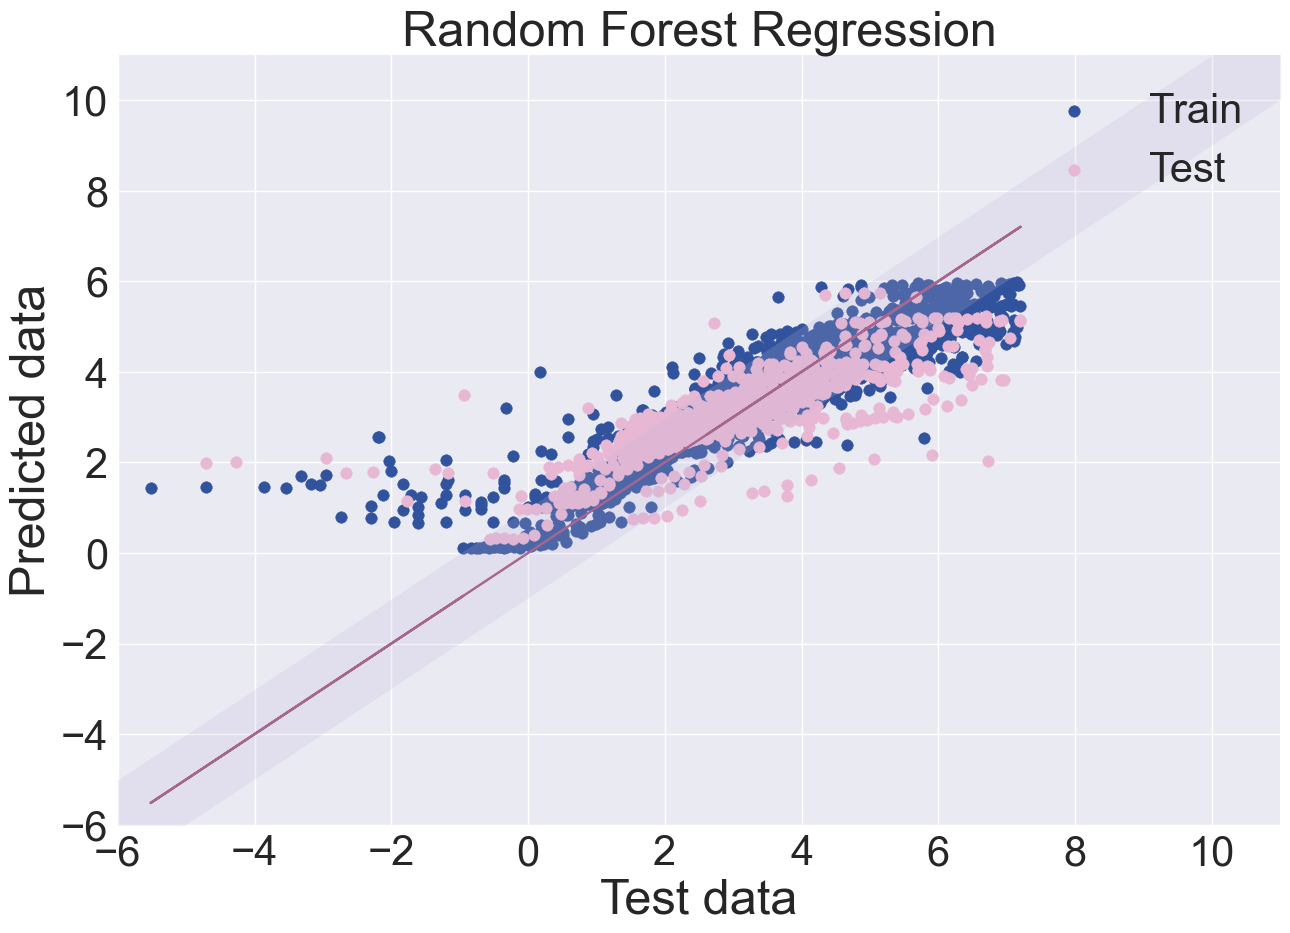

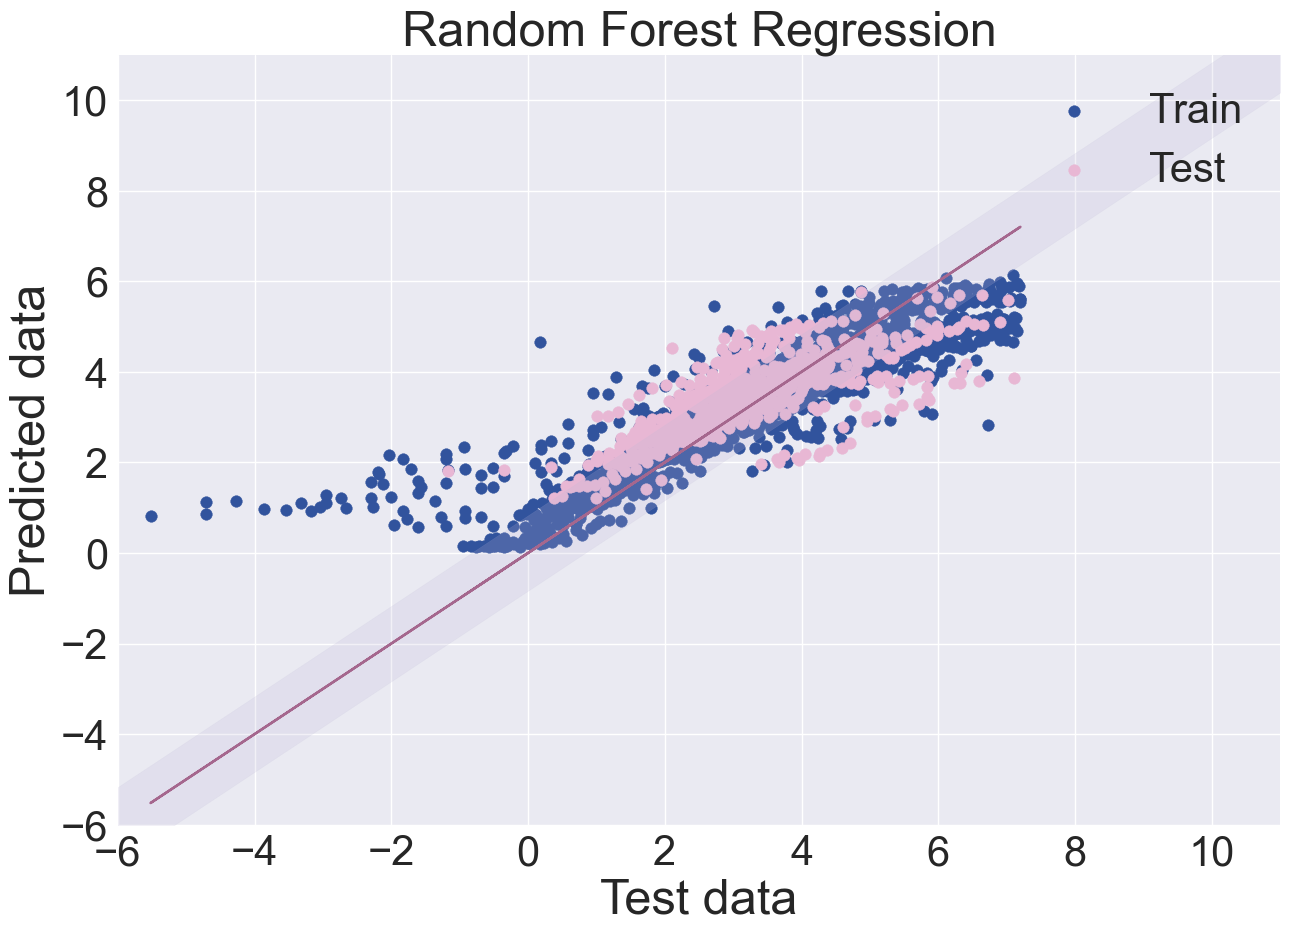

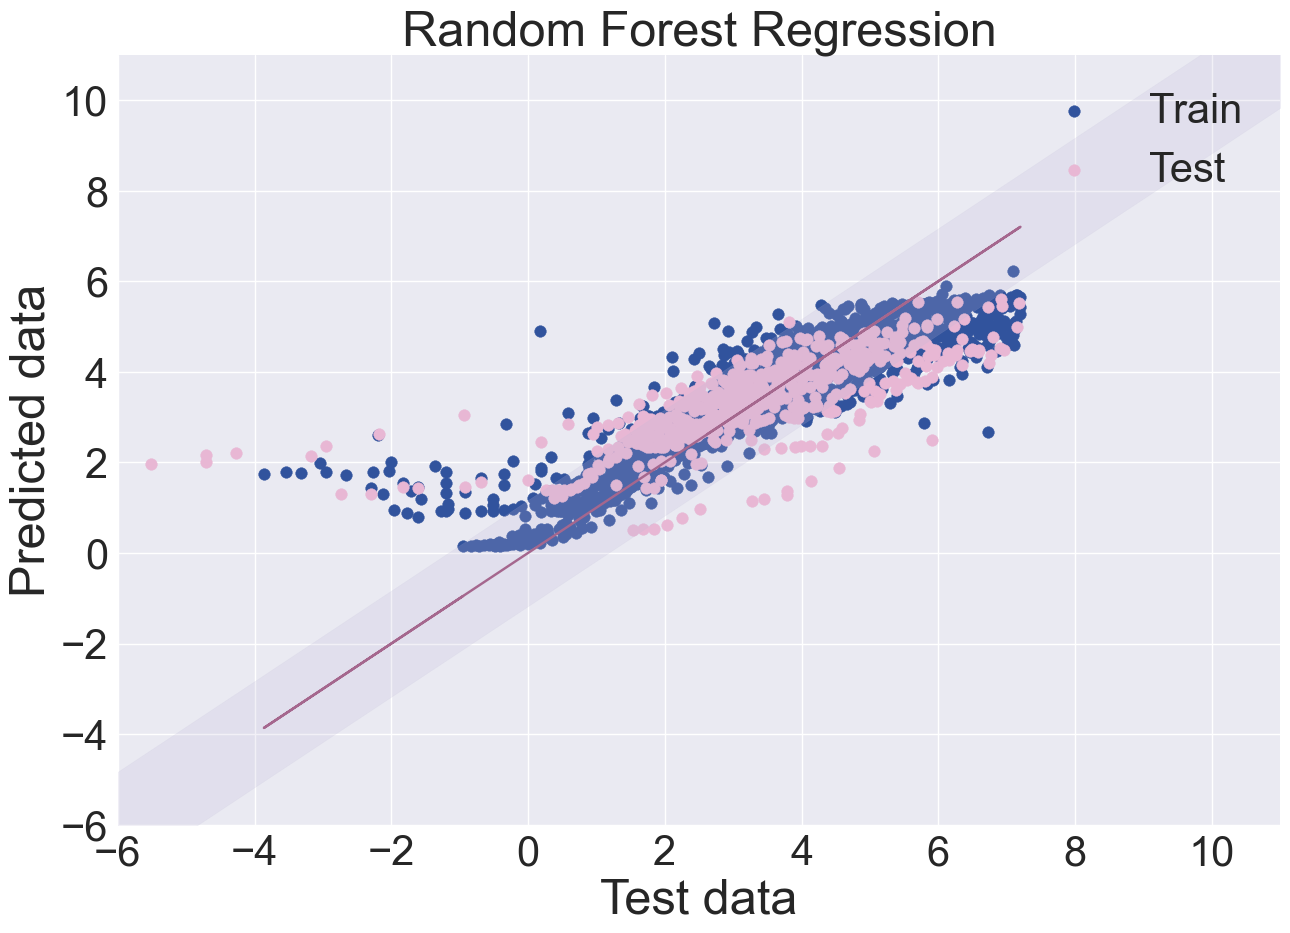

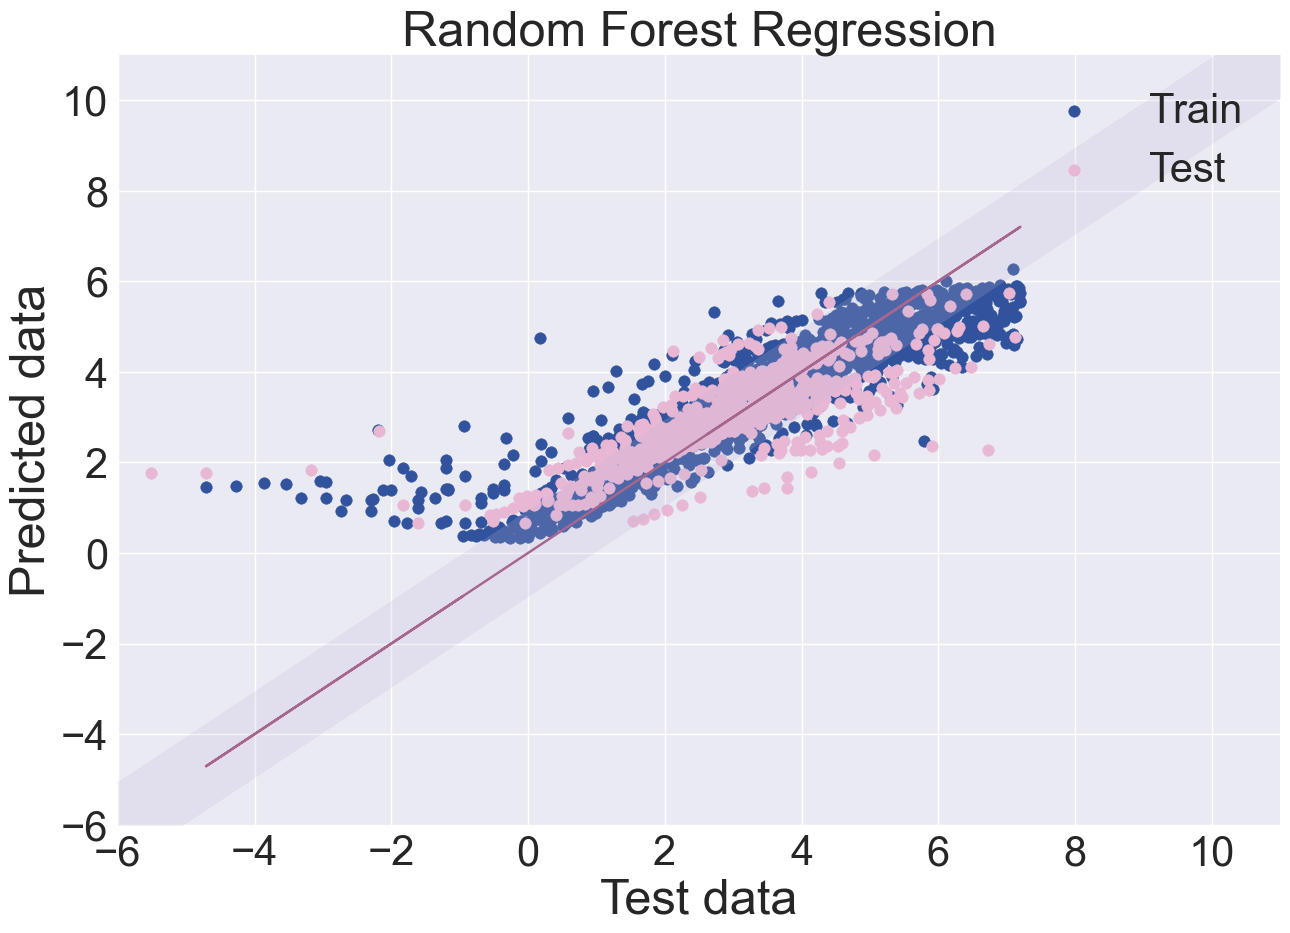

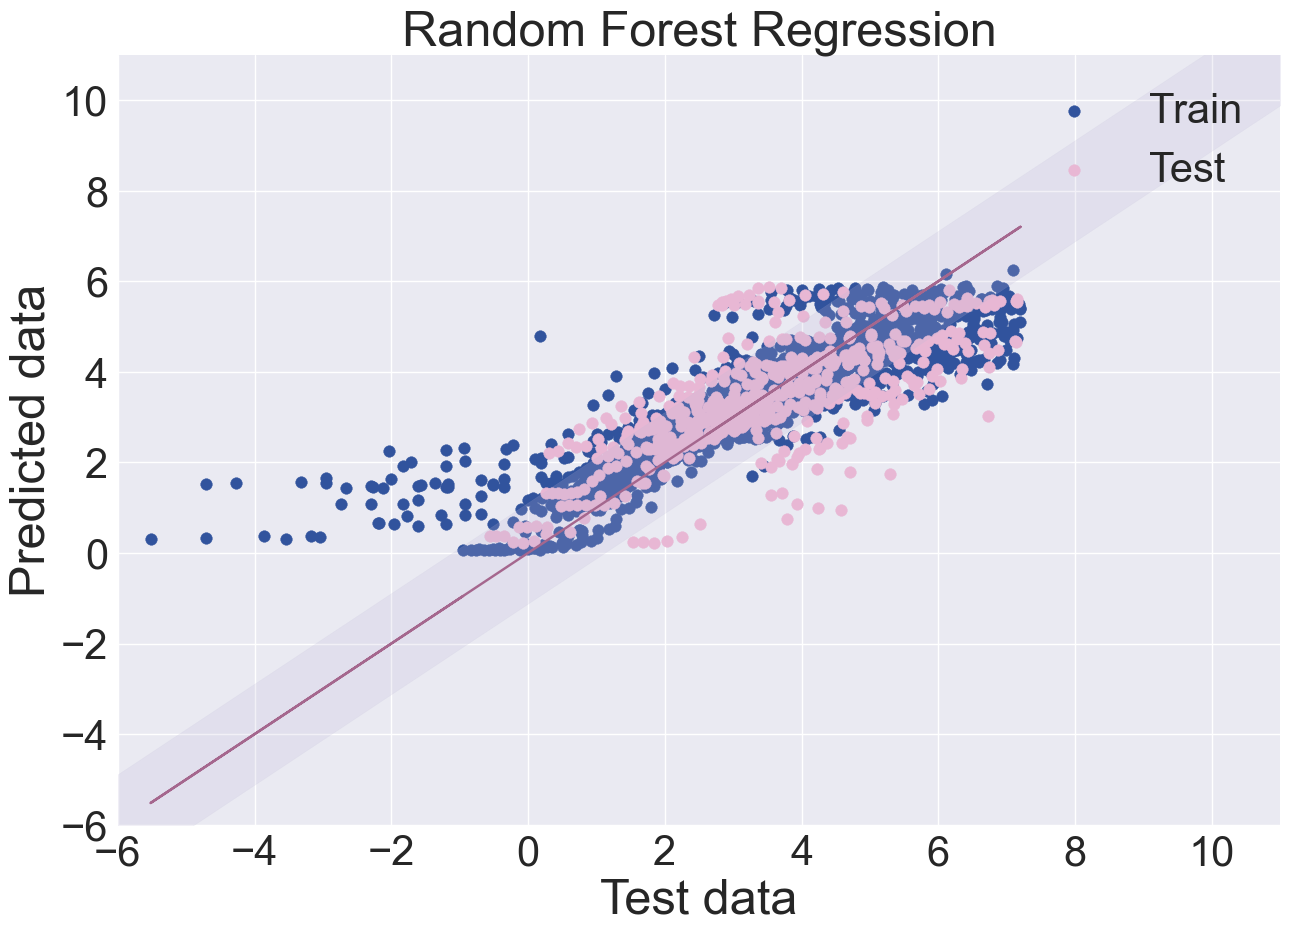

In [22]:
count = 0
#Creating a table to check accuracy on different DES classes
RFR_df = x_model[:]
RFR_df['Viscosity_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #Random Forest Regression
    regr_RFR = RandomForestRegressor(n_estimators=n_esti, max_depth=depth, min_samples_leaf=min_leaf, 
                                 min_samples_split=min_split, criterion=criterion, max_features=max_feat)
    regr_RFR.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = regr_RFR.predict(x_test_mod)
    y1_pred = regr_RFR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    RFR_df['Viscosity_train' + str(count)] = None
    RFR_df['Viscosity_test' + str(count)] = None
    RFR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    RFR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Random Forest Regression' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Random Forest Regression', fontsize=35)
df_error_train

In [23]:
df_error_RFR = metrics_class(RFR_df, 'Random Forest Regression')
df_error_RFR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type    R2_train     R2_test  \
0   Random Forest Regression0         2     I   -5.045336         NaN   
1   Random Forest Regression0         2   III    0.718737     0.59263   
2   Random Forest Regression0         2    IV    0.743514    0.581306   
3   Random Forest Regression0         2     V    0.677570     0.51789   
4   Random Forest Regression0         3  None    0.895683    0.475803   
5   Random Forest Regression1         2     I -110.177191 -137.376818   
6   Random Forest Regression1         2   III    0.750189    0.560216   
7   Random Forest Regression1         2    IV    0.804861    0.597243   
8   Random Forest Regression1         2     V    0.656242    0.473486   
9   Random Forest Regression1         3  None    0.870014    0.371245   
10  Random Forest Regression2         2     I  -58.168172         NaN   
11  Random Forest Regression2         2   III    0.744831    0.367435   
12  Random Forest Regression2         2    IV    0.784912    0.617006   
13  Random Forest Regression2         2     V    0.693077     0.40101   
14  Random Forest Regression2         3  None    0.864035      0.3998   
15  Random Forest Regression3         2     I  -50.380522         NaN   
16  Random Forest Regression3         2   III    0.713162    0.700577   
17  Random Forest Regression3         2    IV    0.762934    0.487254   
18  Random Forest Regression3         2     V    0.678940    0.404434   
19  Random Forest Regression3         3  None    0.865591    0.588128   
20  Random Forest Regression4         2     I  -15.312708        None   
21  Random Forest Regression4         2   III    0.690918    0.330687   
22  Random Forest Regression4         2    IV    0.774770    0.525908   
23  Random Forest Regression4         2     V    0.661957    0.361955   
24  Random Forest Regression4         3  None    0.849081    0.451416   

    RMSE_train RMSE_test  
0     0.093880       NaN  
1     0.638132  0.824358  
2     0.474388  0.419109  
3     1.005264  1.181913  
4     0.588198   1.22913  
5     0.412968  0.411474  
6     0.629552  0.741392  
7     0.364414   0.40877  
8     1.108238  0.940323  
9     0.661502  0.918958  
10    0.253756  0.210217  
11    0.630128  0.979761  
12    0.449069  0.279304  
13    0.957853  1.404572  
14    0.669421  0.983081  
15    0.217088  0.484156  
16    0.649559   0.59659  
17    0.404043  0.480483  
18    0.973852  1.502793  
19    0.706771  0.938318  
20    0.154215      None  
21    0.681092  1.030614  
22    0.393828  0.462017  
23    1.049955  1.119182  
24    0.698979  1.377319

**Conclusion:** Decision trees work better than linear regression, but also with low accuracy


## 4. Boosting
Boosting is a procedure for sequentially constructing the composition of machine learning algorithms, when each subsequent algorithm seeks to compensate for the shortcomings of the composition of all previous algorithms.

### 4.1. Gradient Boosting Regression
Gradient Boosting builds a prediction in the form of an ensemble of weak predictive models, which are mainly decision trees. Out of several weak models, one is eventually assembled, but already effective. The general idea of the algorithm is the consistent application of a predictor (predictor) in such a way that each subsequent model reduces the error of the previous one to a minimum.

In [24]:
#We optimize for GBR
regr_GBR = GradientBoostingRegressor()

search_space = {"learning_rate": Real(0.05, 0.15),
    "n_estimators": Integer(50, 400),
    "max_depth": Integer(1, 6),
    "min_samples_leaf": Real(0.05, 0.5),
    "min_samples_split": Real(0.02, 0.6)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)

sample_w = compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))

opt_GBR = BayesSearchCV(estimator = regr_GBR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_GBR.fit(x_train01, y_model, sample_weight=sample_w)

learning_rate = opt_GBR.best_estimator_.learning_rate
n_estimators = opt_GBR.best_estimator_.n_estimators
max_depth = opt_GBR.best_estimator_.max_depth
min_samples_leaf = opt_GBR.best_estimator_.min_samples_leaf
min_samples_split = opt_GBR.best_estimator_.min_samples_split

print('learning_rate:', learning_rate,'n_estimators:', n_estimators, 'max_depth:', max_depth, 'min_samples_leaf:', min_samples_leaf,'min_samples_split:', min_samples_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.5908930995518495
MAE_test: 0.6664510697450364
MSE_test: 0.9600941137419359
RMSE_test: 0.9798439231540582
r2_train: 0.9477964120963133
MAE_train: 0.24666989695859498
MSE_train: 0.14730119813691664
RMSE_train: 0.3837983821447358



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.4981645339430878
MAE_test: 0.6390676824463387
MSE_test: 0.7504075931398637
RMSE_test: 0.866260695829993
r2_train: 0.9493877183994153
MAE_train: 0.2554347917859551
MSE_train: 0.1543625971817556
RMSE_train: 0.3928900573719773



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6433325278539906
MAE_test: 0.7857160120177044
MSE_test: 1.0075898462196686
RMSE_test: 1.0037877495863698
r2_train: 0.9352677665205475
MAE_train: 0.26895427606078653
MSE_train: 0.17231702714224104
RMSE_train: 0.41511086126749447



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6083140458262737
MAE_test: 0.6081905318386147
MSE_test: 0.8168161418327233
RMSE_test: 0.9037788124495525
r2_train: 0.9516057504348219
MAE_train: 0.23511965544617802
MSE_train: 0.13749416828245253
RMSE_train: 0.370802060785067
r2_test: 0.564534516003421
MAE_test: 0.8067393055638609
MSE_test: 1.1051289225877245
RMSE_test: 1.0512511225143708
r2_train: 0.9510211058688194
MAE_train: 0.23680482189523847
MSE_train: 0.13282025840454953
RMSE_train: 0.36444513771560944



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.528970            0.541923                  -0.494629   
1            0.455162            0.334349                  -0.392954   
2            1.156830            1.114544                   2.053618   
3            1.065925            1.299729                   1.808035   

   Decision Tree Regression1  Decision Tree Regression2  \
0                  -0.537736                  -0.654589   
1                   0.016096                   0.066391   
2                   2.165629                   2.098693   
3                   1.212954                   1.624024   

   Decision Tree Regression3  Decision Tree Regression4  \
0                  -0.228106                   0.272850   
1                  -1.839248                   0.156508   
2                   1.867941                   1.404235   
3                   2.433295                   1.463087   

   Random Forest Regression0  Random Forest Regression1  \
0                   0.782769                   0.778232   
1                   0.592232                   0.537403   
2                   0.782914                   0.822418   
3                   0.978239                   0.831705   

   Random Forest Regression2  Random Forest Regression3  \
0                   0.785673                   0.775719   
1                   0.514649                   0.569378   
2                   0.755339                   0.798255   
3                   1.170950                   0.947635   

   Random Forest Regression4  Gradient Boosting Regression0  \
0                   0.748373                       0.947796   
1                   0.510176                       0.590893   
2                   0.826051                       0.383798   
3                   1.114935                       0.979844   

   Gradient Boosting Regression1  Gradient Boosting Regression2  \
0                       0.949388                       0.935268   
1                       0.498165                       0.643333   
2                       0.392890                       0.415111   
3                       0.866261                       1.003788   

   Gradient Boosting Regression3  Gradient Boosting Regression4  
0                       0.951606                       0.951021  
1                       0.608314                       0.564535  
2                       0.370802                       0.364445  
3                       0.903779                       1.051251

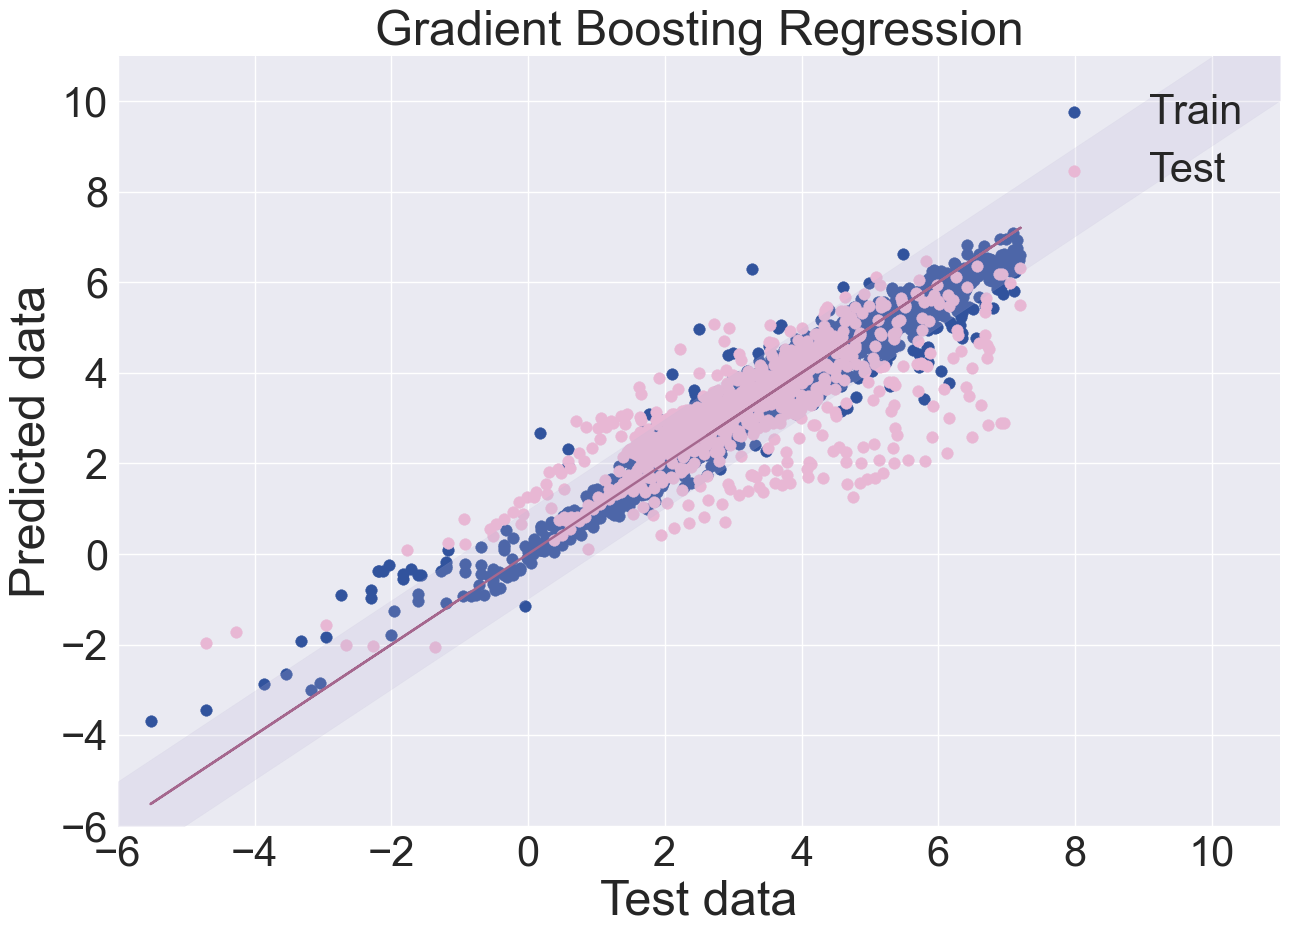

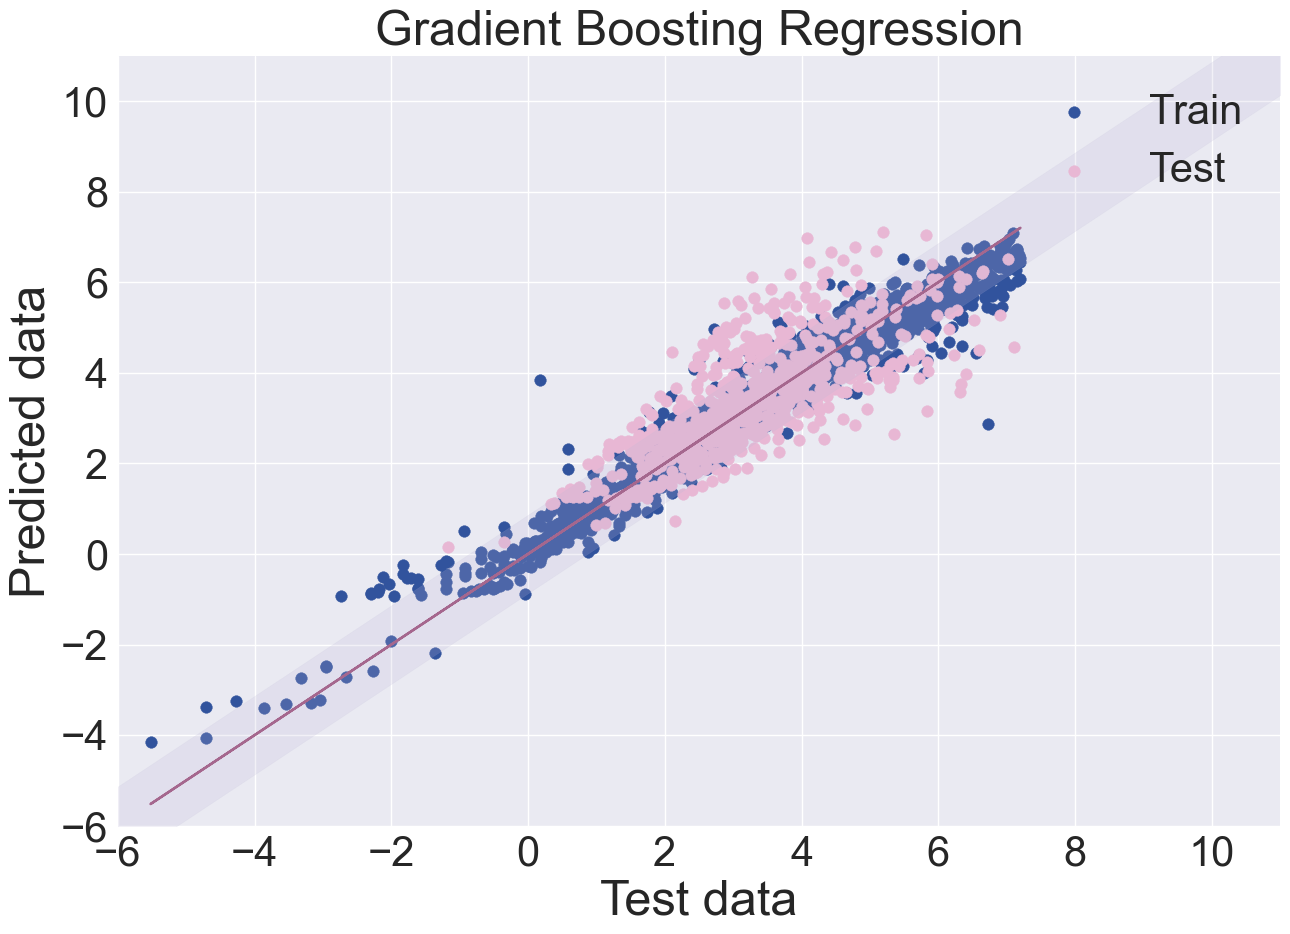

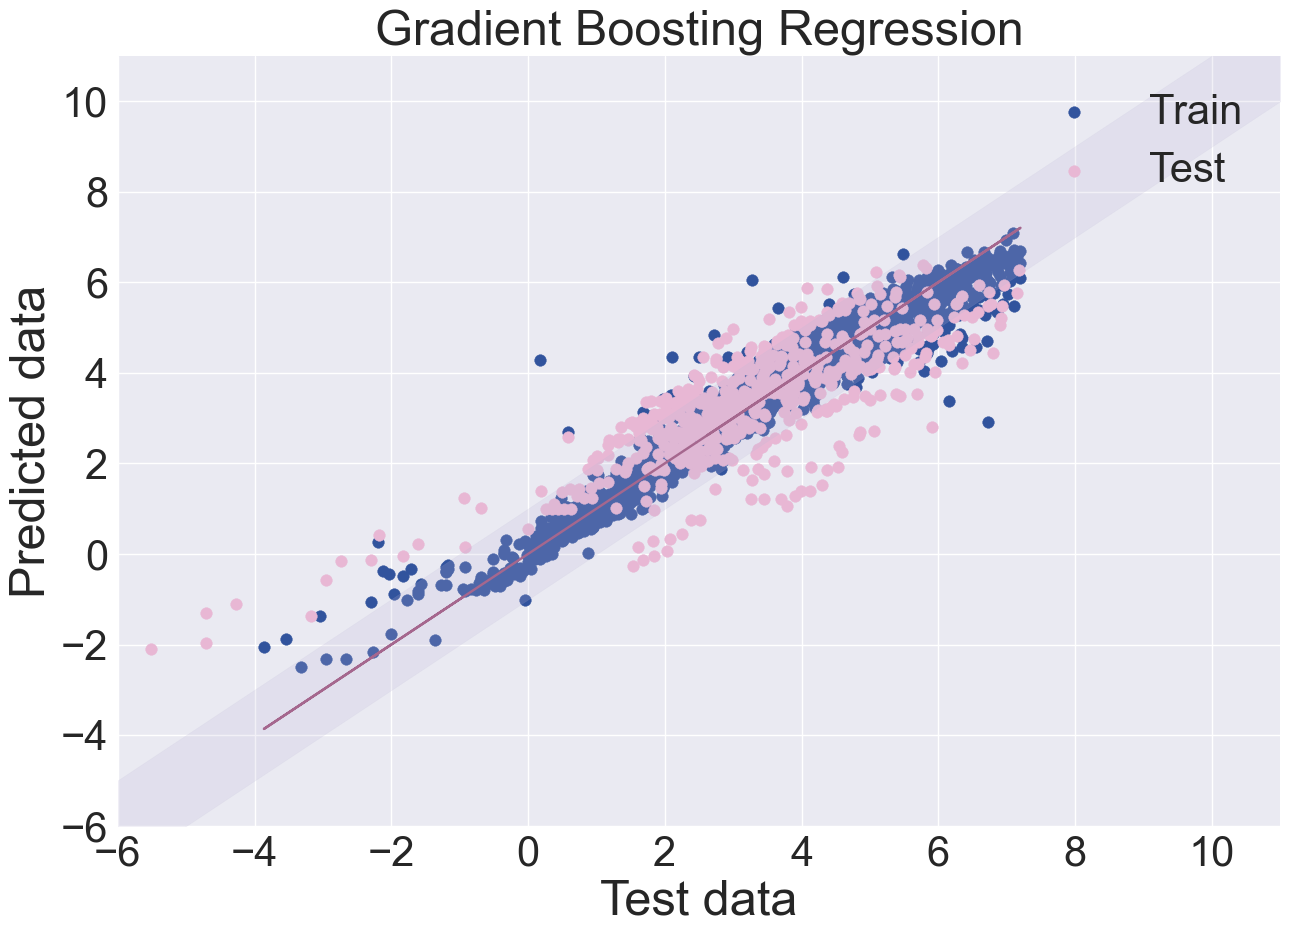

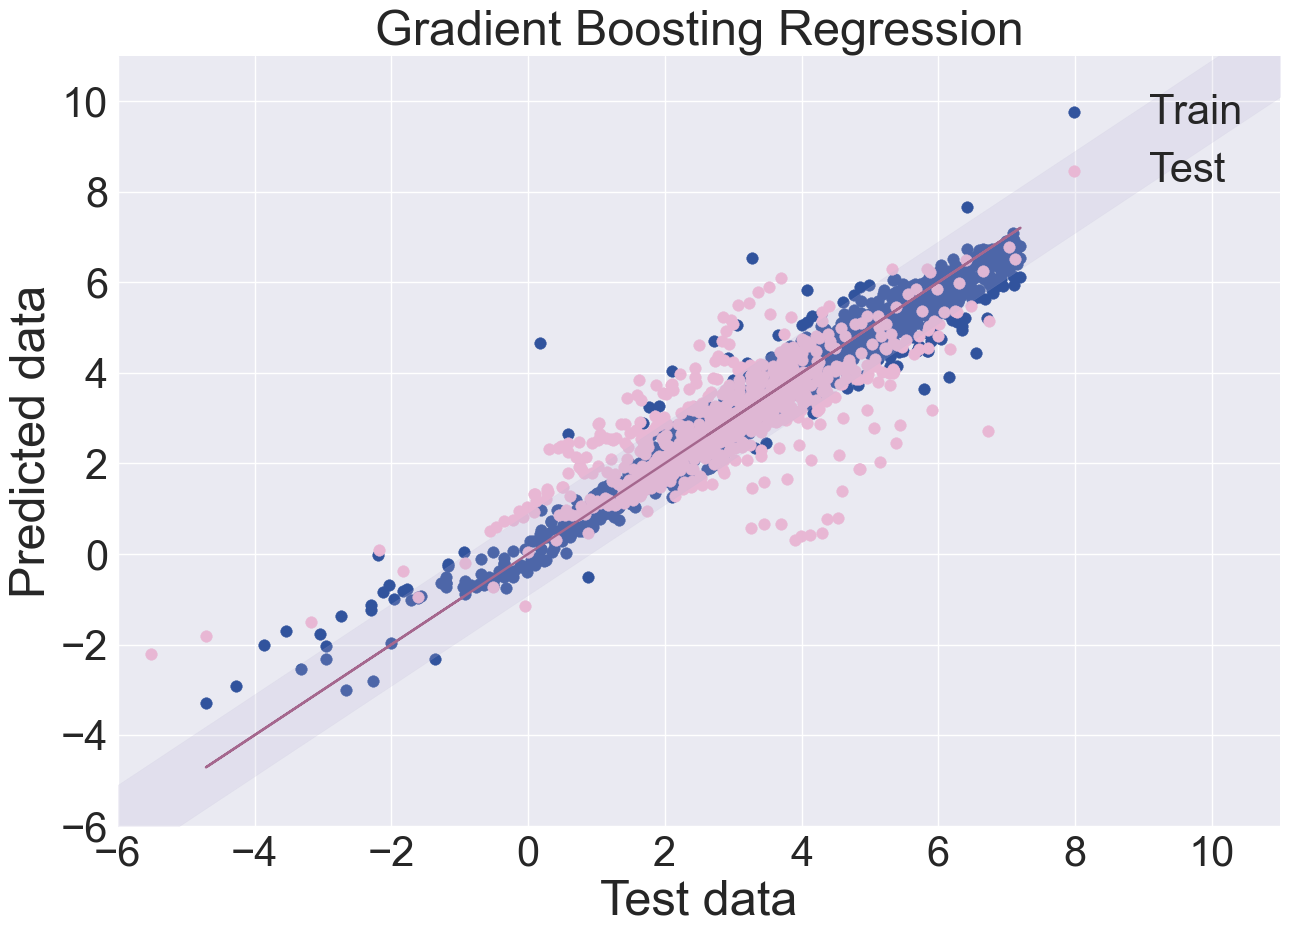

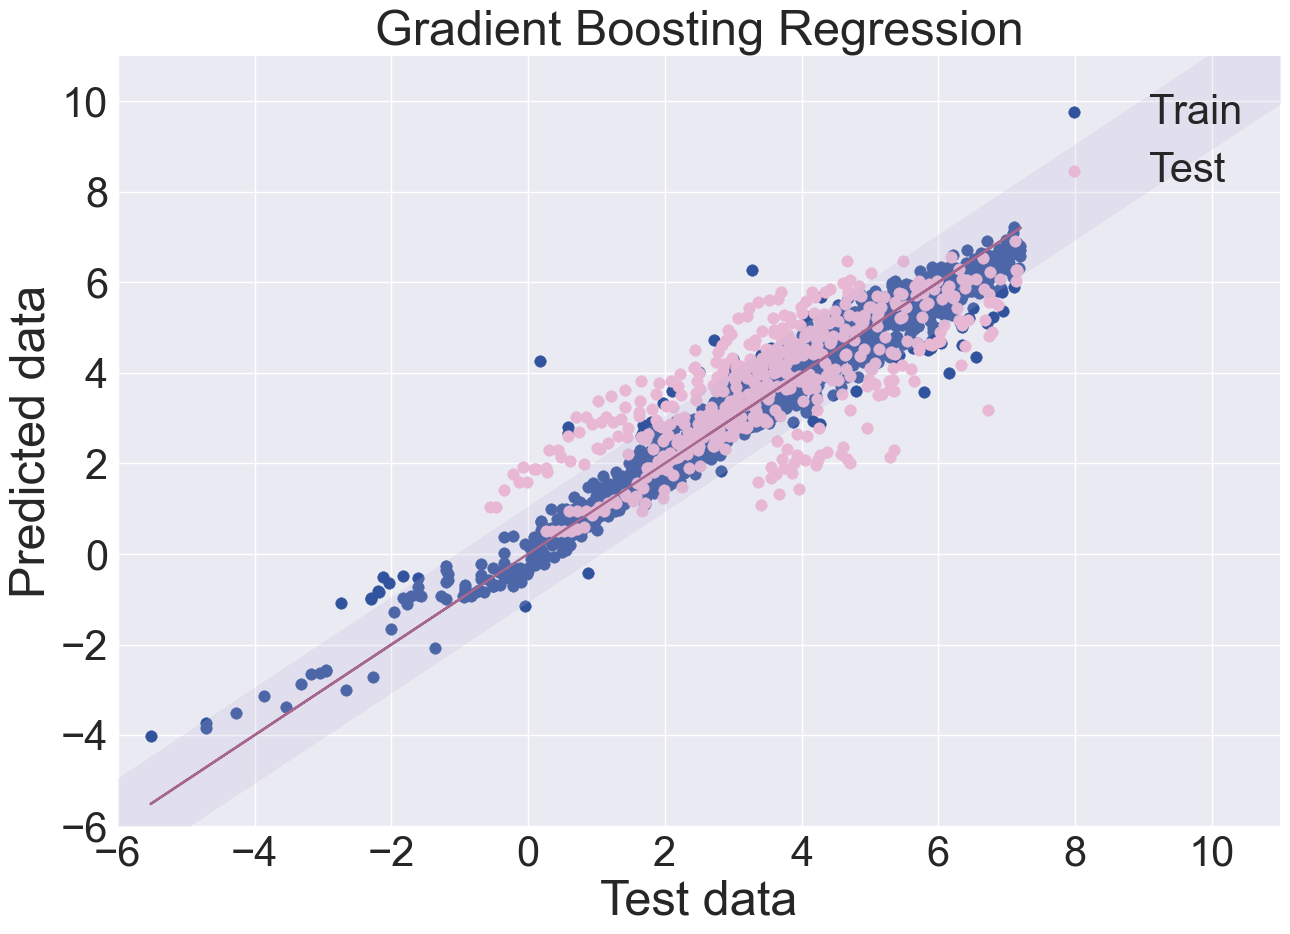

In [25]:
count = 0
#Creating a table to check accuracy on different DES classes
GBR_df = x_model[:]
GBR_df['Viscosity_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #GBR
    regr_GBR = GradientBoostingRegressor(learning_rate = learning_rate, n_estimators = n_estimators, max_depth= max_depth, min_samples_leaf= min_samples_leaf, min_samples_split= min_samples_split)
    regr_GBR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_GBR.predict(x_test_mod)
    y1_pred = regr_GBR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    GBR_df['Viscosity_train' + str(count)] = None
    GBR_df['Viscosity_test' + str(count)] = None
    GBR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    GBR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Gradient Boosting Regression' + str(count)] = regr_metrics(regr_GBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Gradient Boosting Regression', fontsize=35)
df_error_train

In [26]:
df_error_GBR = metrics_class(GBR_df, 'Gradient Boosting Regression')
df_error_GBR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train   R2_test  \
0   Gradient Boosting Regression0         2     I  0.912348       NaN   
1   Gradient Boosting Regression0         2   III  0.894813  0.417873   
2   Gradient Boosting Regression0         2    IV  0.993841   0.59994   
3   Gradient Boosting Regression0         2     V  0.940514  0.790401   
4   Gradient Boosting Regression0         3  None  0.970834  0.219923   
5   Gradient Boosting Regression1         2     I  0.966476  0.460582   
6   Gradient Boosting Regression1         2   III  0.907013   0.38028   
7   Gradient Boosting Regression1         2    IV  0.991103  0.072637   
8   Gradient Boosting Regression1         2     V  0.946796  0.585338   
9   Gradient Boosting Regression1         3  None  0.957870  0.165238   
10  Gradient Boosting Regression2         2     I  0.963896       NaN   
11  Gradient Boosting Regression2         2   III  0.884232  0.422609   
12  Gradient Boosting Regression2         2    IV  0.993451  0.721299   
13  Gradient Boosting Regression2         2     V  0.934917  0.641607   
14  Gradient Boosting Regression2         3  None  0.955503  0.209869   
15  Gradient Boosting Regression3         2     I  0.830419       NaN   
16  Gradient Boosting Regression3         2   III  0.911169  0.795693   
17  Gradient Boosting Regression3         2    IV  0.991221  0.874358   
18  Gradient Boosting Regression3         2     V  0.943283  0.565537   
19  Gradient Boosting Regression3         3  None  0.969621  0.431849   
20  Gradient Boosting Regression4         2     I  0.946922      None   
21  Gradient Boosting Regression4         2   III  0.910001   0.54118   
22  Gradient Boosting Regression4         2    IV  0.992043  0.406706   
23  Gradient Boosting Regression4         2     V  0.950702  0.417911   
24  Gradient Boosting Regression4         3  None  0.968005  0.422858   

    RMSE_train RMSE_test  
0     0.011304       NaN  
1     0.390244   0.98544  
2     0.073513  0.409676  
3     0.431788  0.779305  
4     0.311020  1.499405  
5     0.007171  0.025691  
6     0.384094  0.880088  
7     0.077810  0.620272  
8     0.435991  0.834486  
9     0.376599  1.058855  
10    0.006268  0.022301  
11    0.424432  0.936057  
12    0.078362   0.23826  
13    0.441081   1.08646  
14    0.382958  1.127952  
15    0.012472  0.038345  
16    0.361478  0.492805  
17    0.077755  0.237845  
18    0.409314  1.283545  
19    0.336010  1.102048  
20    0.008797      None  
21    0.367525  0.853302  
22    0.074025  0.516847  
23    0.400960  1.068981  
24    0.321835  1.412715

### 4.2. Car Boosting Regression
CatBoost is a gradient boosting library. She uses careless (oblivious) decision trees to grow a balanced tree. The same functions are used to create left and right splits at each level of the tree

In [27]:
#We optimize for CBR
regr_CBR = CatBoostRegressor()

search_space = {"iterations": Integer(100, 600), 
                "learning_rate": Real(0.05, 0.4),
                "depth": Integer(1, 6)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight = compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))

opt_CBR = BayesSearchCV(estimator = regr_CBR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_CBR.fit(x_train01, y_model, sample_weight=sample_weight)

iterations = opt_CBR.best_params_['iterations']
learning_rate = opt_CBR.best_params_['learning_rate']
depth = opt_CBR.best_params_['depth']


print('iterations:', iterations,'learning_rate:', learning_rate, 'depth:', depth)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 1.7084220	total: 159ms	remaining: 1m 35s
1:	learn: 1.6393425	total: 162ms	remaining: 48.3s
2:	learn: 1.5850477	total: 163ms	remaining: 32.5s
3:	learn: 1.5211481	total: 165ms	remaining: 24.6s
4:	learn: 1.4592903	total: 166ms	remaining: 19.8s
5:	learn: 1.4052157	total: 168ms	remaining: 16.6s
6:	learn: 1.3508087	total: 169ms	remaining: 14.3s
7:	learn: 1.3059419	total: 171ms	remaining: 12.6s
8:	learn: 1.2612655	total: 172ms	remaining: 11.3s
9:	learn: 1.2179776	total: 174ms	remaining: 10.2s
10:	learn: 1.1800762	total: 175ms	remaining: 9.37s
11:	learn: 1.1376871	total: 177ms	remaining: 8.65s
12:	learn: 1.1159583	total: 177ms	remaining: 8.01s
13:	learn: 1.0792806	total: 179ms	remaining: 7.48s
14:	learn: 1.0411194	total: 180ms	remaining: 7.03s
15:	learn: 1.0104210	total: 182ms	remaining: 6.63s
16:	learn: 0.9805608	total: 184ms	remaining: 6.31s
17:	learn: 0.9557330	total: 185ms	remaining: 5.99s
18:	learn: 0.9255603	total: 187m


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0:	learn: 1.6528792	total: 2.27ms	remaining: 1.36s
1:	learn: 1.5937334	total: 3.62ms	remaining: 1.08s
2:	learn: 1.5327466	total: 5.57ms	remaining: 1.11s
3:	learn: 1.4758472	total: 7.42ms	remaining: 1.1s
4:	learn: 1.4356471	total: 9.44ms	remaining: 1.12s
5:	learn: 1.3829090	total: 11.3ms	remaining: 1.12s
6:	learn: 1.3321697	total: 12.9ms	remaining: 1.09s
7:	learn: 1.2904509	total: 14.2ms	remaining: 1.05s
8:	learn: 1.2486627	total: 15.9ms	remaining: 1.04s
9:	learn: 1.2164677	total: 17.6ms	remaining: 1.04s
10:	learn: 1.1776768	total: 19.8ms	remaining: 1.06s
11:	learn: 1.1350703	total: 21.3ms	remaining: 1.04s
12:	learn: 1.0934646	total: 22.9ms	remaining: 1.03s
13:	learn: 1.0533889	total: 24.7ms	remaining: 1.03s
14:	learn: 1.0225603	total: 26.5ms	remaining: 1.03s
15:	learn: 0.9939619	total: 28.1ms	remaining: 1.02s
16:	learn: 0.9625551	total: 29.7ms	remaining: 1.02s
17:	learn: 0.9322056	total: 31.9ms	remaining: 1.03s
18:	learn: 0.9027169	total: 33.7ms	remaining: 1.03s
19:	learn: 0.8781344	to


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.7059549114118131
MAE_test: 0.5702120813291351
MSE_test: 0.6900664799811266
RMSE_test: 0.8307024015741898
r2_train: 0.9130035933050693
MAE_train: 0.3217530830878341
MSE_train: 0.2454749846583775
RMSE_train: 0.49545432146503426
0:	learn: 1.6295229	total: 2.28ms	remaining: 1.36s
1:	learn: 1.5669797	total: 3.77ms	remaining: 1.13s
2:	learn: 1.5093594	total: 5.25ms	remaining: 1.04s
3:	learn: 1.4498902	total: 6.48ms	remaining: 965ms
4:	learn: 1.3984387	total: 7.75ms	remaining: 923ms
5:	learn: 1.3481546	total: 9.42ms	remaining: 932ms
6:	learn: 1.2991272	total: 10.9ms	remaining: 927ms
7:	learn: 1.2635996	total: 12.3ms	remaining: 910ms
8:	learn: 1.2303434	total: 13.9ms	remaining: 916ms
9:	learn: 1.1893899	total: 15.6ms	remaining: 919ms
10:	learn: 1.1466950	total: 17.1ms	remaining: 917ms
11:	learn: 1.1061297	total: 18.9ms	remaining: 927ms
12:	learn: 1.0724672	total: 20.5ms	remaining: 927ms
13:	learn: 1.0442928	total: 22.1ms	remaining: 925ms
14:	learn: 1.0128837	total: 23.6ms	remaining:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6603143066205227
MAE_test: 0.5329843513017692
MSE_test: 0.5079408308778862
RMSE_test: 0.7126996778993844
r2_train: 0.919183959833914
MAE_train: 0.32425959724952536
MSE_train: 0.2464811595025582
RMSE_train: 0.49646868934763466
0:	learn: 1.5960057	total: 2.28ms	remaining: 1.37s
1:	learn: 1.5346269	total: 3.77ms	remaining: 1.13s
2:	learn: 1.4801691	total: 5.36ms	remaining: 1.07s
3:	learn: 1.4228099	total: 7.41ms	remaining: 1.1s
4:	learn: 1.3684399	total: 8.9ms	remaining: 1.06s
5:	learn: 1.3127333	total: 10.2ms	remaining: 1.01s
6:	learn: 1.2609882	total: 11.5ms	remaining: 977ms
7:	learn: 1.2199630	total: 13ms	remaining: 965ms
8:	learn: 1.1763423	total: 14.6ms	remaining: 957ms
9:	learn: 1.1343817	total: 16ms	remaining: 944ms
10:	learn: 1.0953679	total: 17.5ms	remaining: 937ms
11:	learn: 1.0734347	total: 18.2ms	remaining: 891ms
12:	learn: 1.0379656	total: 19.8ms	remaining: 892ms
13:	learn: 1.0043261	total: 21.4ms	remaining: 898ms
14:	learn: 0.9738391	total: 22.8ms	remaining: 888ms


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6790285312484976
MAE_test: 0.6661326961354207
MSE_test: 0.9067482125418878
RMSE_test: 0.9522332763256531
r2_train: 0.9088430756969028
MAE_train: 0.3223380567363562
MSE_train: 0.24265948129730558
RMSE_train: 0.49260479219888387
0:	learn: 1.5802286	total: 4.32ms	remaining: 2.59s
1:	learn: 1.5160631	total: 6.17ms	remaining: 1.84s
2:	learn: 1.4596887	total: 7.71ms	remaining: 1.53s
3:	learn: 1.4042997	total: 9.03ms	remaining: 1.34s
4:	learn: 1.3531819	total: 10.4ms	remaining: 1.24s
5:	learn: 1.3048389	total: 12.3ms	remaining: 1.22s
6:	learn: 1.2589125	total: 13.7ms	remaining: 1.16s
7:	learn: 1.2235248	total: 15.1ms	remaining: 1.12s
8:	learn: 1.1817667	total: 16.8ms	remaining: 1.1s
9:	learn: 1.1388101	total: 18.6ms	remaining: 1.1s
10:	learn: 1.1042821	total: 20ms	remaining: 1.07s
11:	learn: 1.0717812	total: 21.3ms	remaining: 1.04s
12:	learn: 1.0394118	total: 22.1ms	remaining: 996ms
13:	learn: 1.0092510	total: 23.6ms	remaining: 986ms
14:	learn: 0.9767211	total: 25.3ms	remaining: 98


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6679151649791701
MAE_test: 0.6021301630632895
MSE_test: 0.6925248424470205
RMSE_test: 0.8321807751005911
r2_train: 0.9092835153207448
MAE_train: 0.336001578755425
MSE_train: 0.25773697748289726
RMSE_train: 0.5076780254087203
0:	learn: 1.8517329	total: 2.75ms	remaining: 1.65s
1:	learn: 1.7770508	total: 5.09ms	remaining: 1.52s
2:	learn: 1.7049531	total: 6.83ms	remaining: 1.36s
3:	learn: 1.6399260	total: 8.33ms	remaining: 1.24s
4:	learn: 1.5697449	total: 9.97ms	remaining: 1.19s
5:	learn: 1.5098952	total: 11.9ms	remaining: 1.18s
6:	learn: 1.4549524	total: 13.5ms	remaining: 1.15s
7:	learn: 1.4025110	total: 15.7ms	remaining: 1.16s
8:	learn: 1.3552830	total: 17.9ms	remaining: 1.18s
9:	learn: 1.3069908	total: 20.2ms	remaining: 1.19s
10:	learn: 1.2585963	total: 22.9ms	remaining: 1.23s
11:	learn: 1.2122350	total: 25ms	remaining: 1.22s
12:	learn: 1.1740122	total: 27.4ms	remaining: 1.24s
13:	learn: 1.1380142	total: 30.1ms	remaining: 1.26s
14:	learn: 1.0995829	total: 32.4ms	remaining: 1.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.528970            0.541923                  -0.494629   
1            0.455162            0.334349                  -0.392954   
2            1.156830            1.114544                   2.053618   
3            1.065925            1.299729                   1.808035   

   Decision Tree Regression1  Decision Tree Regression2  \
0                  -0.537736                  -0.654589   
1                   0.016096                   0.066391   
2                   2.165629                   2.098693   
3                   1.212954                   1.624024   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                  -0.228106                   0.272850  ...   
1                  -1.839248                   0.156508  ...   
2                   1.867941                   1.404235  ...   
3                   2.433295                   1.463087  ...   

   Gradient Boosting Regression0  Gradient Boosting Regression1  \
0                       0.947796                       0.949388   
1                       0.590893                       0.498165   
2                       0.383798                       0.392890   
3                       0.979844                       0.866261   

   Gradient Boosting Regression2  Gradient Boosting Regression3  \
0                       0.935268                       0.951606   
1                       0.643333                       0.608314   
2                       0.415111                       0.370802   
3                       1.003788                       0.903779   

   Gradient Boosting Regression4  Cat Boosting Regression0  \
0                       0.951021                  0.913004   
1                       0.564535                  0.705955   
2                       0.364445                  0.495454   
3                       1.051251                  0.830702   

   Cat Boosting Regression1  Cat Boosting Regression2  \
0                  0.919184                  0.908843   
1                  0.660314                  0.679029   
2                  0.496469                  0.492605   
3                  0.712700                  0.952233   

   Cat Boosting Regression3  Cat Boosting Regression4  
0                  0.909284                  0.926894  
1                  0.667915                  0.630978  
2                  0.507678                  0.445251  
3                  0.832181                  0.967733  

[4 rows x 25 columns]

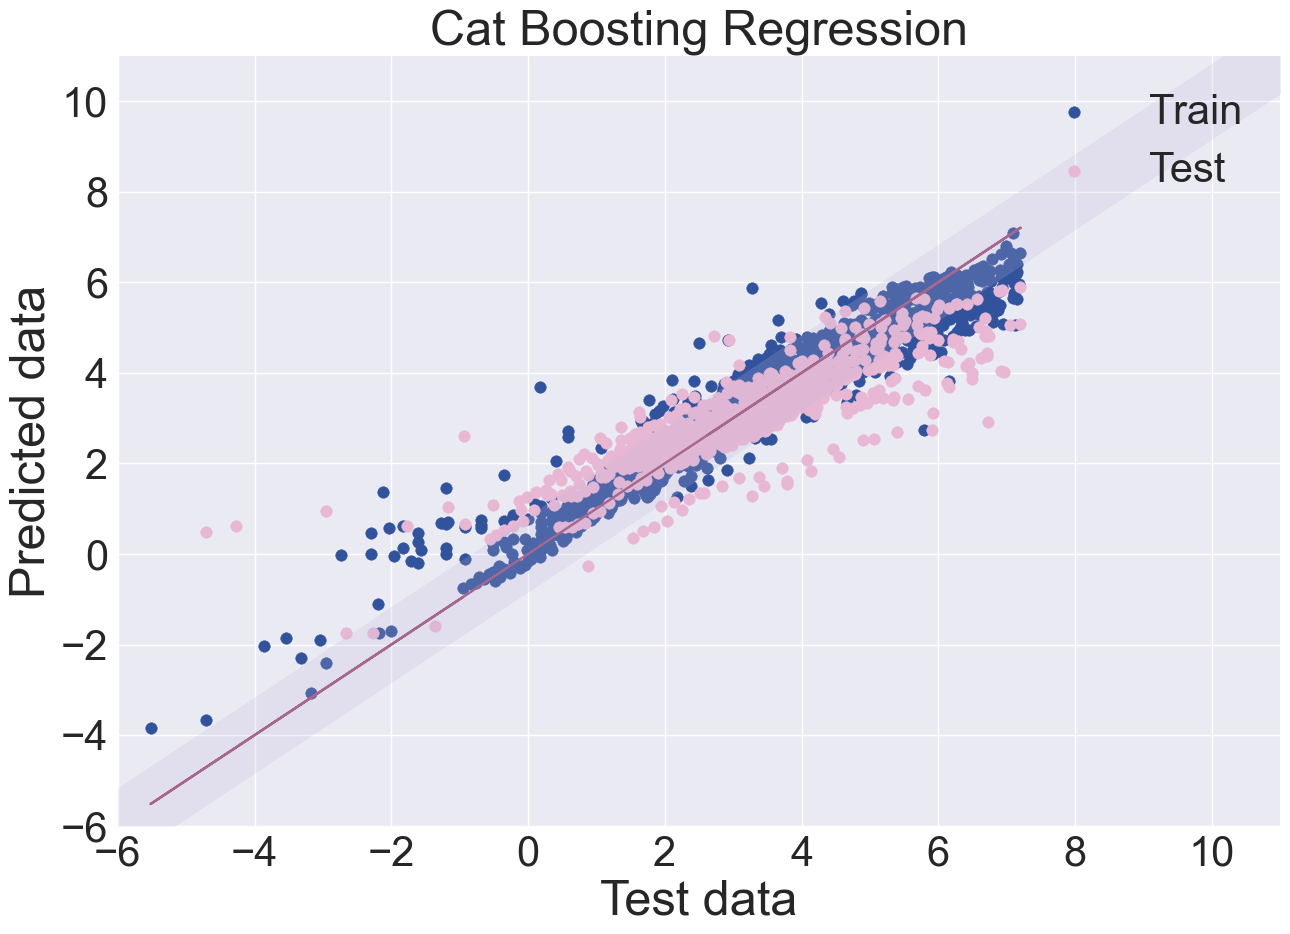

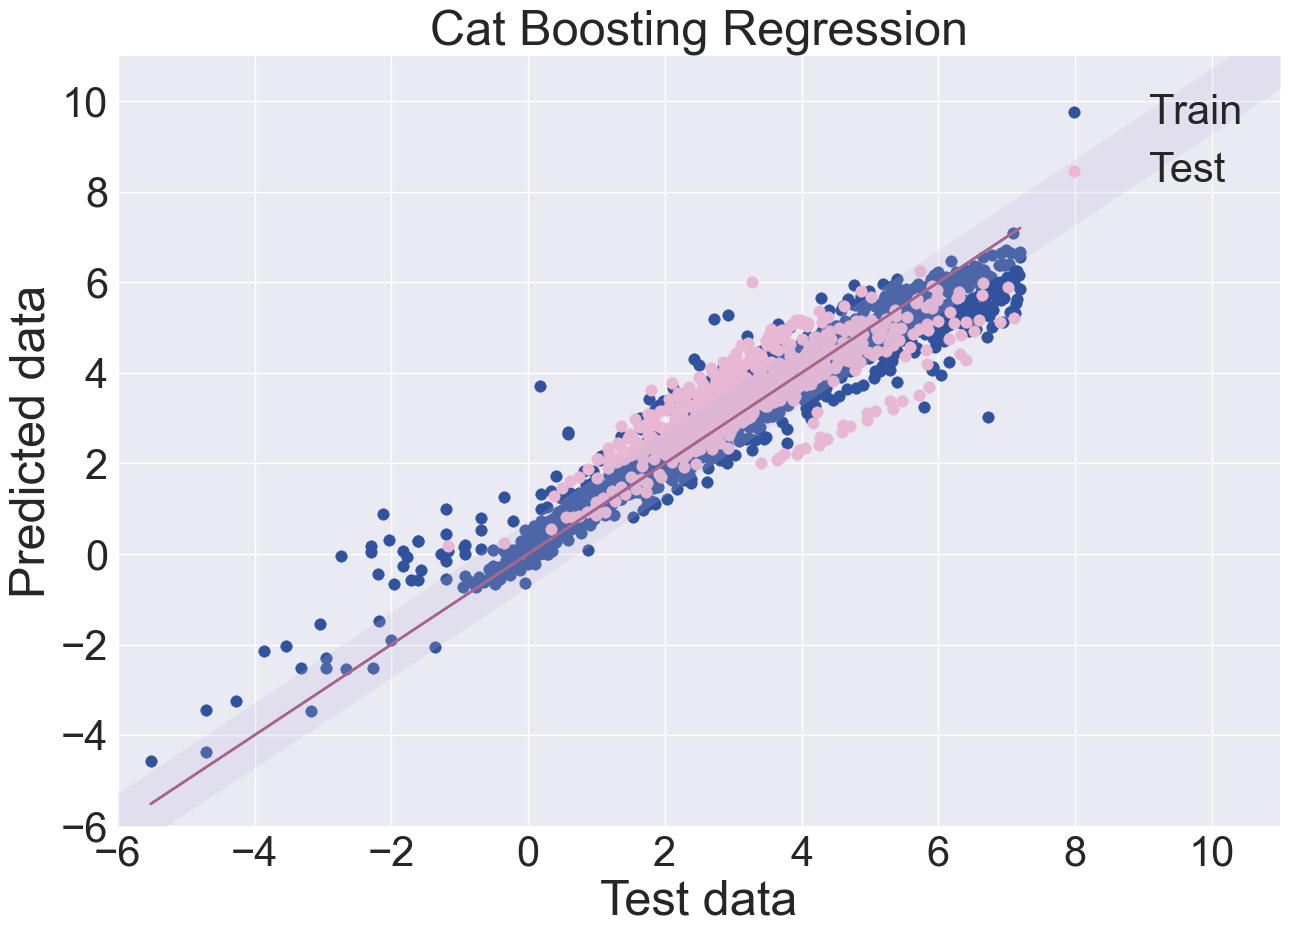

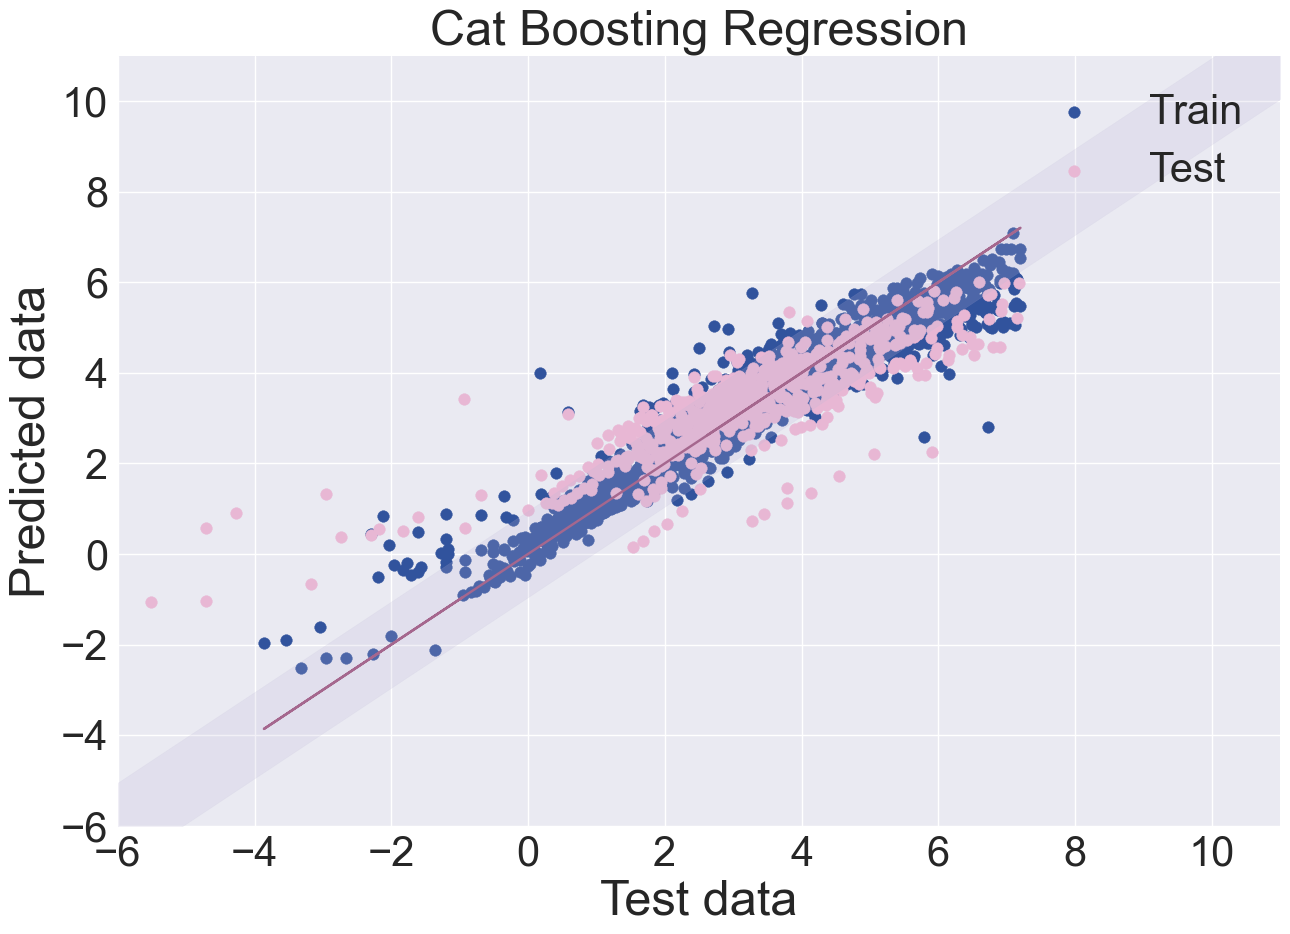

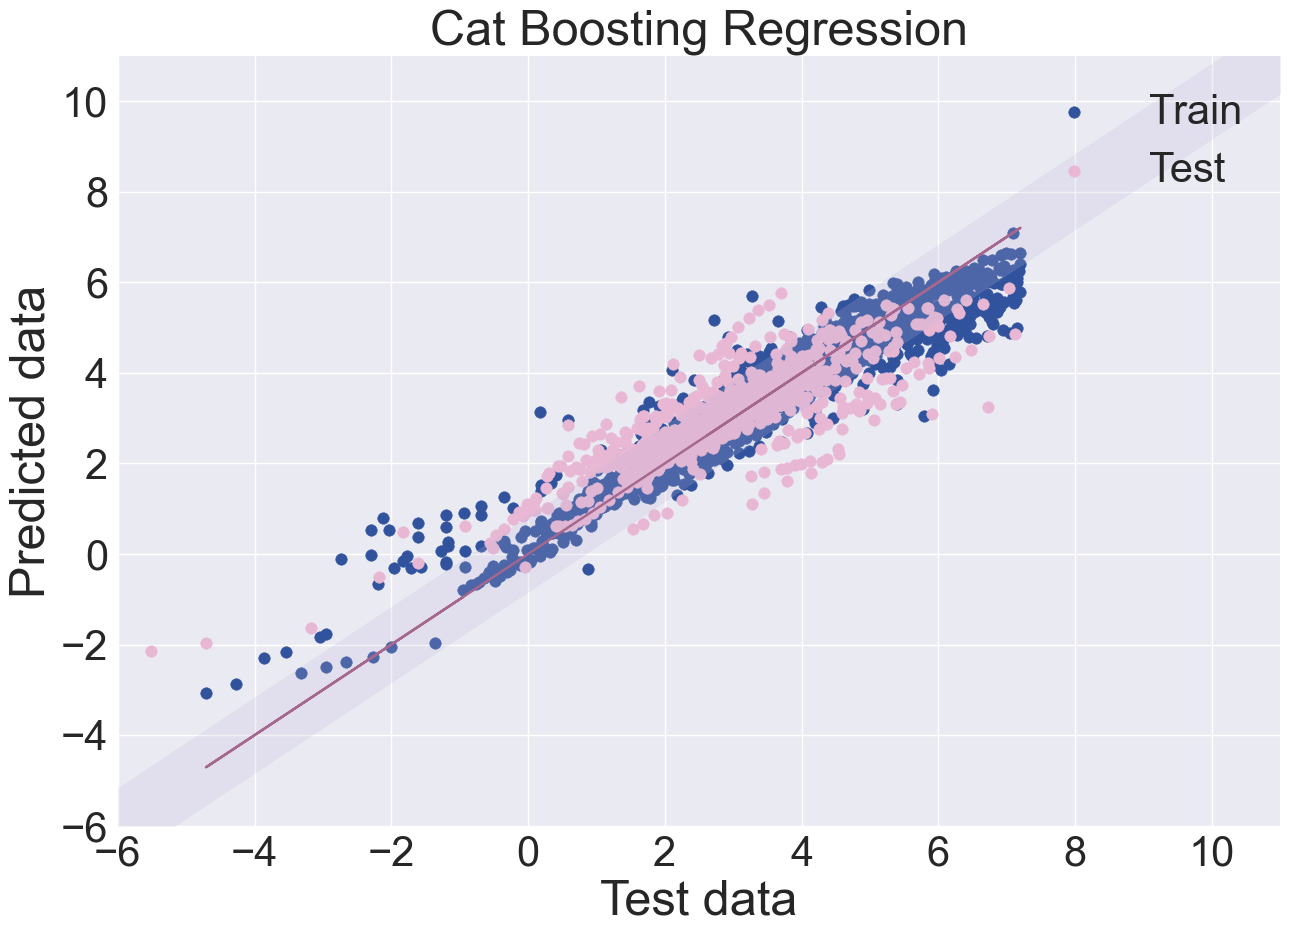

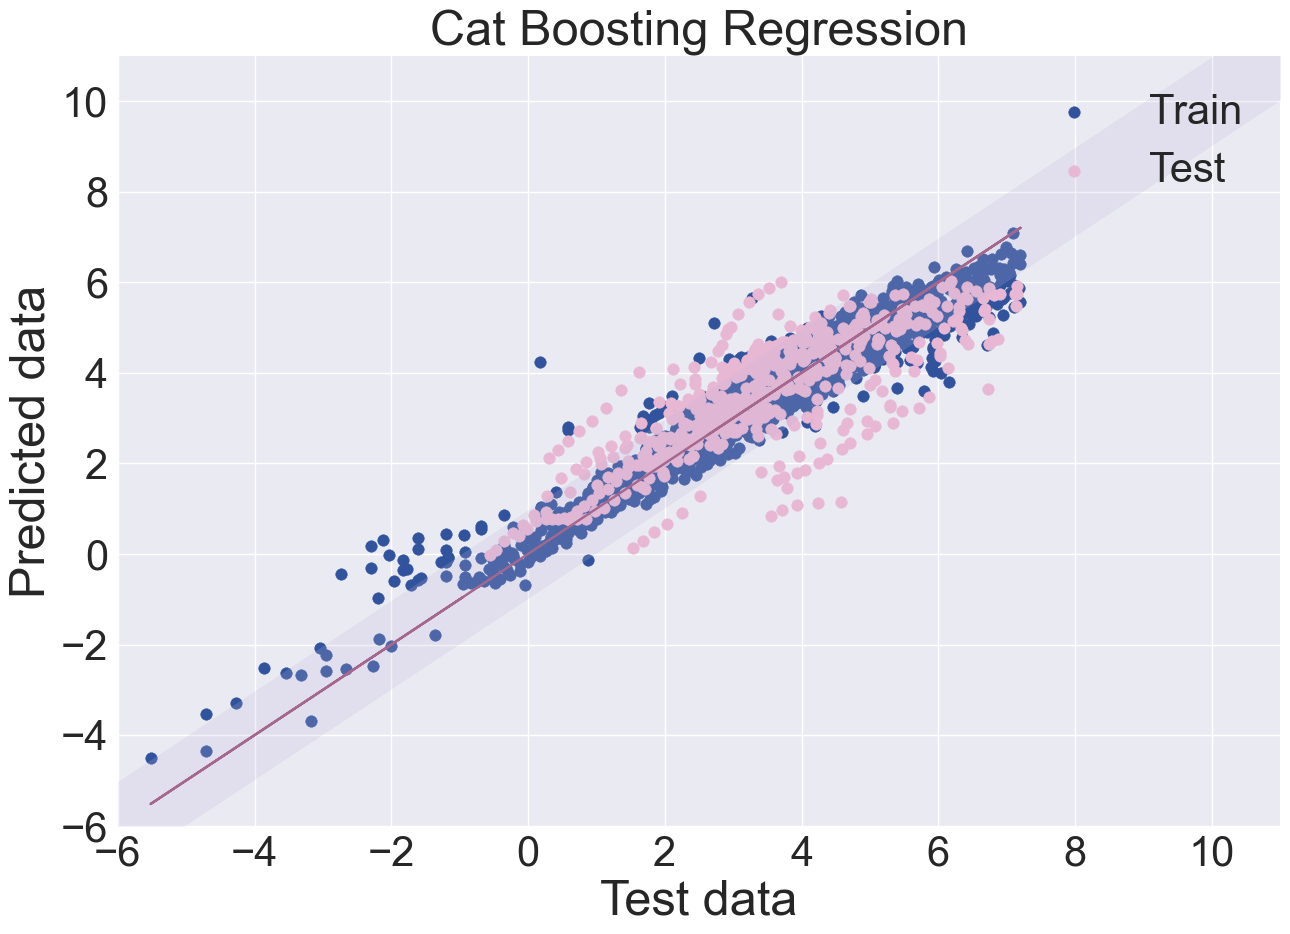

In [28]:
count = 0
#Creating a table to check accuracy on different DES classes
CBR_df = x_model[:]
CBR_df['Viscosity_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #CBR
    regr_CBR = CatBoostRegressor(iterations = iterations, learning_rate = learning_rate, depth = depth)
    regr_CBR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_CBR.predict(x_test_mod)
    y1_pred = regr_CBR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    CBR_df['Viscosity_train' + str(count)] = None
    CBR_df['Viscosity_test' + str(count)] = None
    CBR_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    CBR_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Cat Boosting Regression' + str(count)] = regr_metrics(regr_CBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Cat Boosting Regression', fontsize=35)
df_error_train

In [29]:
df_error_CBR = metrics_class(CBR_df, 'Cat Boosting Regression')
df_error_CBR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   Cat Boosting Regression0         2     I -0.013549        NaN    0.038440   
1   Cat Boosting Regression0         2   III  0.833342   0.679281    0.491211   
2   Cat Boosting Regression0         2    IV  0.990681    0.83649    0.090424   
3   Cat Boosting Regression0         2     V  0.892689     0.7017    0.579940   
4   Cat Boosting Regression0         3  None  0.957749   0.554159    0.374337   
5   Cat Boosting Regression1         2     I  0.362108 -59.710854    0.031281   
6   Cat Boosting Regression1         2   III  0.849815   0.646604    0.488134   
7   Cat Boosting Regression1         2    IV  0.983150   0.912361    0.107084   
8   Cat Boosting Regression1         2     V  0.911645   0.645011    0.561852   
9   Cat Boosting Regression1         3  None  0.938661     0.4741    0.454414   
10  Cat Boosting Regression2         2     I  0.583168        NaN    0.021299   
11  Cat Boosting Regression2         2   III  0.840945   0.591724    0.497495   
12  Cat Boosting Regression2         2    IV  0.990593   0.416316    0.093912   
13  Cat Boosting Regression2         2     V  0.900929   0.648815    0.544198   
14  Cat Boosting Regression2         3  None  0.943370    0.31524    0.432026   
15  Cat Boosting Regression3         2     I  0.481109        NaN    0.021816   
16  Cat Boosting Regression3         2   III  0.822348   0.792553    0.511194   
17  Cat Boosting Regression3         2    IV  0.971695   0.833701    0.139614   
18  Cat Boosting Regression3         2     V  0.889599    0.67172    0.571066   
19  Cat Boosting Regression3         3  None  0.959624   0.502131    0.387369   
20  Cat Boosting Regression4         2     I  0.931270       None    0.010010   
21  Cat Boosting Regression4         2   III  0.859174   0.546793    0.459737   
22  Cat Boosting Regression4         2    IV  0.985530   0.927385    0.099821   
23  Cat Boosting Regression4         2     V  0.923926   0.472309    0.498083   
24  Cat Boosting Regression4         3  None  0.962012   0.580346    0.350684   

   RMSE_test  
0        NaN  
1   0.731448  
2   0.261909  
3   0.929692  
4    1.13355  
5   0.272549  
6   0.664598  
7    0.19068  
8    0.77211  
9    0.84044  
10  0.059662  
11  0.787126  
12  0.344802  
13  1.075479  
14  1.050051  
15  0.948002  
16  0.496578  
17  0.273635  
18  1.115723  
19  1.031635  
20      None  
21  0.848067  
22  0.180817  
23  1.017806  
24  1.204644

### 4.3. Extreme Gradient Boosting (XGBoost)
The XGBoost library is a computationally efficient implementation of gradient boosting over decision trees. In addition to the optimized program code, the authors propose various improvements to the algorithm.

In [30]:
#We optimize for XGB
regr_XGB = XGBRegressor()

search_space = {"n_estimators": Integer(50, 350),
    "max_depth": Integer(2, 30),
    "subsample": Real(0.05, 1.0),
    "colsample_bytree": Real(0.05, 1.0)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_XGB = BayesSearchCV(estimator = regr_XGB, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_XGB.fit(x_train01, y_model, sample_weight=sample_weight)

n_estimators = opt_XGB.best_estimator_.n_estimators
max_depth = opt_XGB.best_estimator_.max_depth
subsample = opt_XGB.best_estimator_.subsample
colsample_bytree = opt_XGB.best_estimator_.colsample_bytree

print('n_estimators:', n_estimators,'max_depth:', max_depth, 'subsample:', subsample,'colsample_bytree:', colsample_bytree)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.7120399996338824
MAE_test: 0.537644259890332
MSE_test: 0.6757859646018715
RMSE_test: 0.8220620199242096
r2_train: 0.9981150401079467
MAE_train: 0.03949099967832229
MSE_train: 0.0053187311770934356
RMSE_train: 0.07292963168077456



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6198721761287426
MAE_test: 0.5524929008588911
MSE_test: 0.5684149979235914
RMSE_test: 0.7539330195206941
r2_train: 0.9984051116891897
MAE_train: 0.0372446043845114
MSE_train: 0.004864256146647768
RMSE_train: 0.06974421944969897



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.7354685935276835
MAE_test: 0.607398877538468
MSE_test: 0.7473043660639754
RMSE_test: 0.8644676778596037
r2_train: 0.9974018257301311
MAE_train: 0.04095266574147869
MSE_train: 0.006916332746704536
RMSE_train: 0.08316449210272696



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6672509531973656
MAE_test: 0.6188133480642549
MSE_test: 0.6939099799511669
RMSE_test: 0.8330125929127163
r2_train: 0.998473185604062
MAE_train: 0.03544741078262943
MSE_train: 0.0043378723170081354
RMSE_train: 0.06586252589301549
r2_test: 0.5973001319872766
MAE_test: 0.7336233684601573
MSE_test: 1.021975994925504
RMSE_test: 1.0109282837696767
r2_train: 0.9978598366251191
MAE_train: 0.040598523802667055
MSE_train: 0.005803664160286987
RMSE_train: 0.07618178365125738



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.528970            0.541923                  -0.494629   
1            0.455162            0.334349                  -0.392954   
2            1.156830            1.114544                   2.053618   
3            1.065925            1.299729                   1.808035   

   Decision Tree Regression1  Decision Tree Regression2  \
0                  -0.537736                  -0.654589   
1                   0.016096                   0.066391   
2                   2.165629                   2.098693   
3                   1.212954                   1.624024   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                  -0.228106                   0.272850  ...   
1                  -1.839248                   0.156508  ...   
2                   1.867941                   1.404235  ...   
3                   2.433295                   1.463087  ...   

   Cat Boosting Regression0  Cat Boosting Regression1  \
0                  0.913004                  0.919184   
1                  0.705955                  0.660314   
2                  0.495454                  0.496469   
3                  0.830702                  0.712700   

   Cat Boosting Regression2  Cat Boosting Regression3  \
0                  0.908843                  0.909284   
1                  0.679029                  0.667915   
2                  0.492605                  0.507678   
3                  0.952233                  0.832181   

   Cat Boosting Regression4  XGBoosting Regression0  XGBoosting Regression1  \
0                  0.926894                0.998115                0.998405   
1                  0.630978                0.712040                0.619872   
2                  0.445251                0.072930                0.069744   
3                  0.967733                0.822062                0.753933   

   XGBoosting Regression2  XGBoosting Regression3  XGBoosting Regression4  
0                0.997402                0.998473                0.997860  
1                0.735469                0.667251                0.597300  
2                0.083164                0.065863                0.076182  
3                0.864468                0.833013                1.010928  

[4 rows x 30 columns]

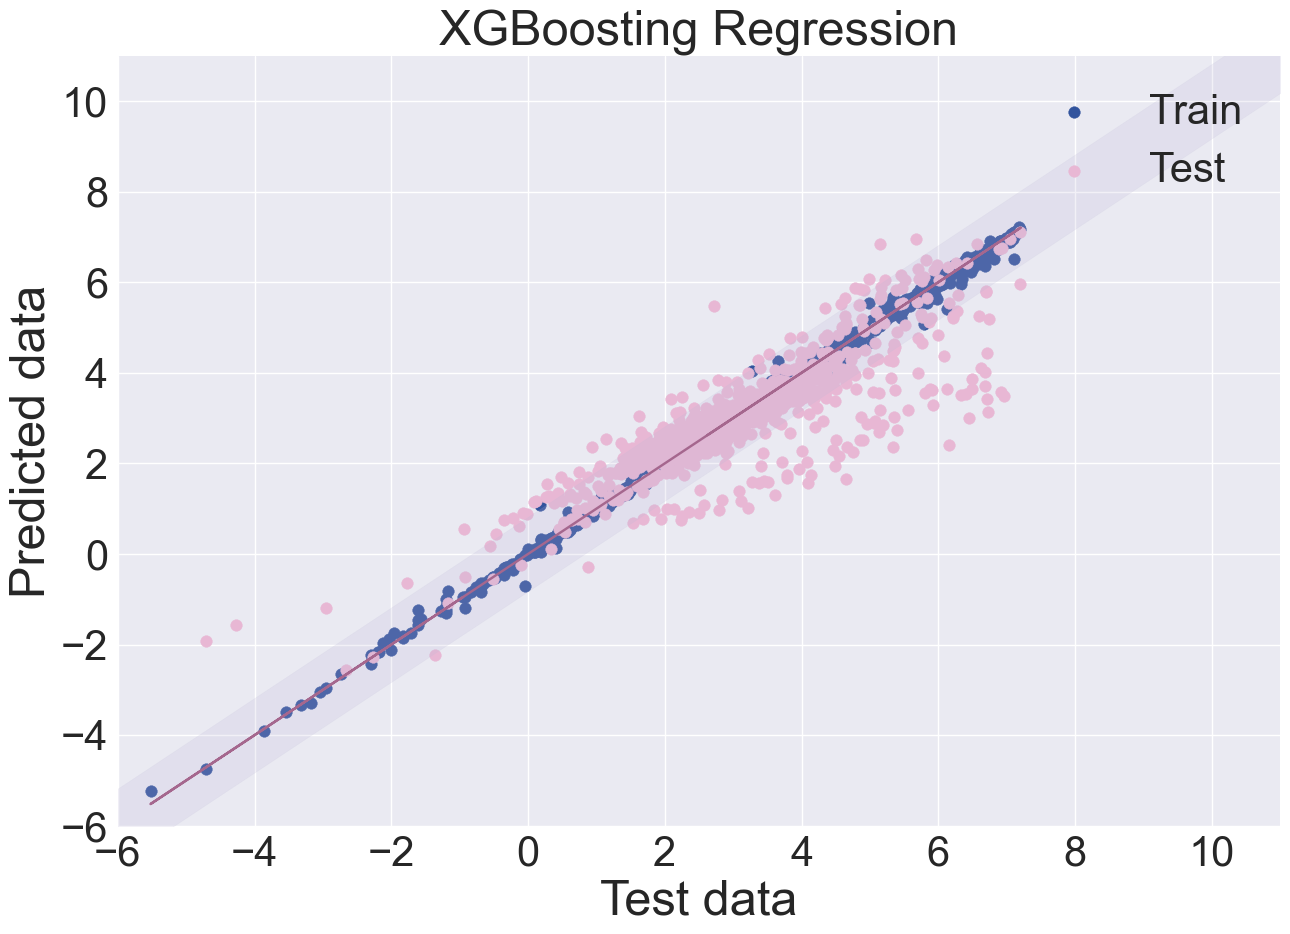

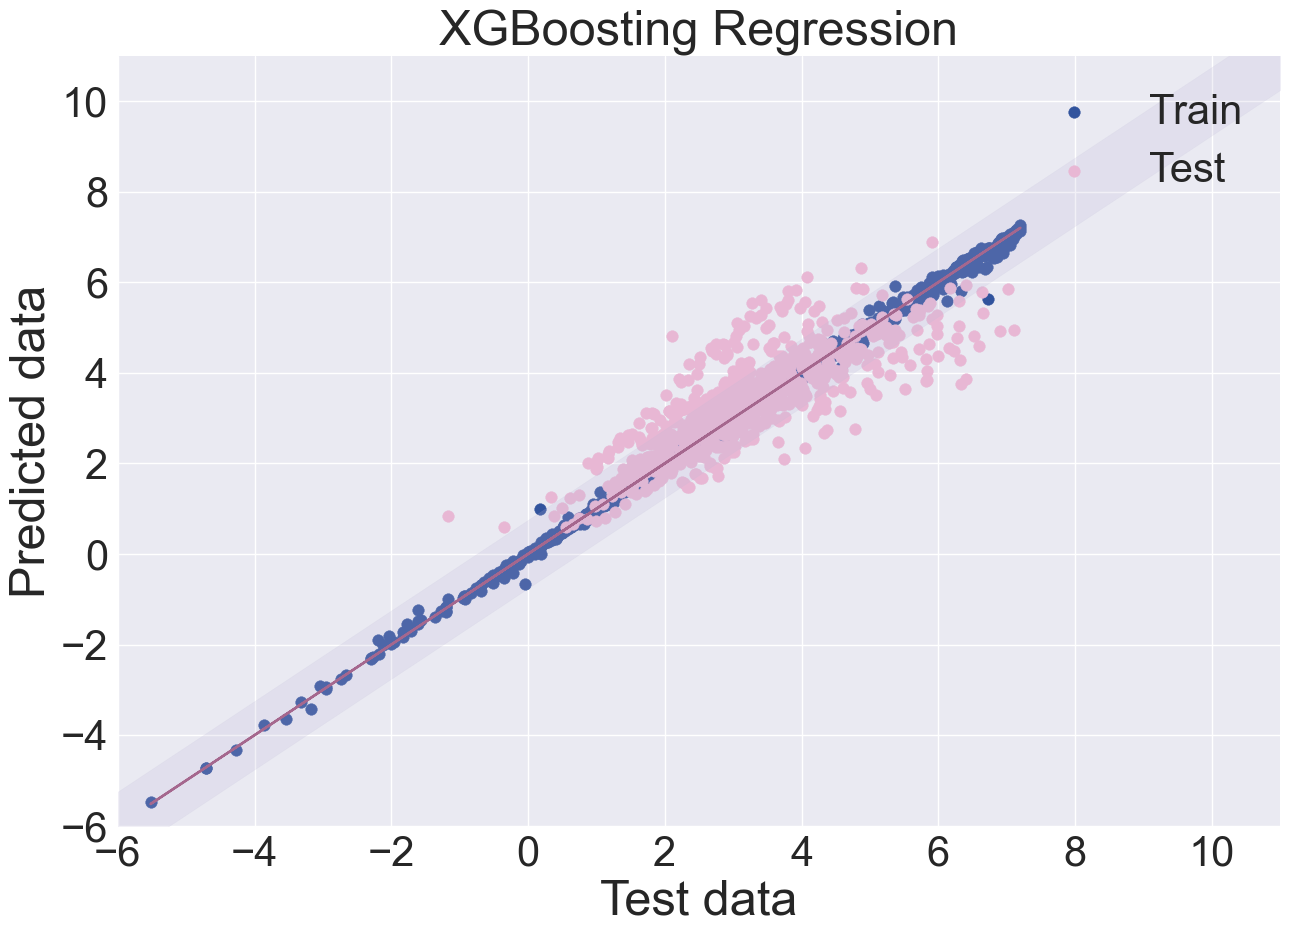

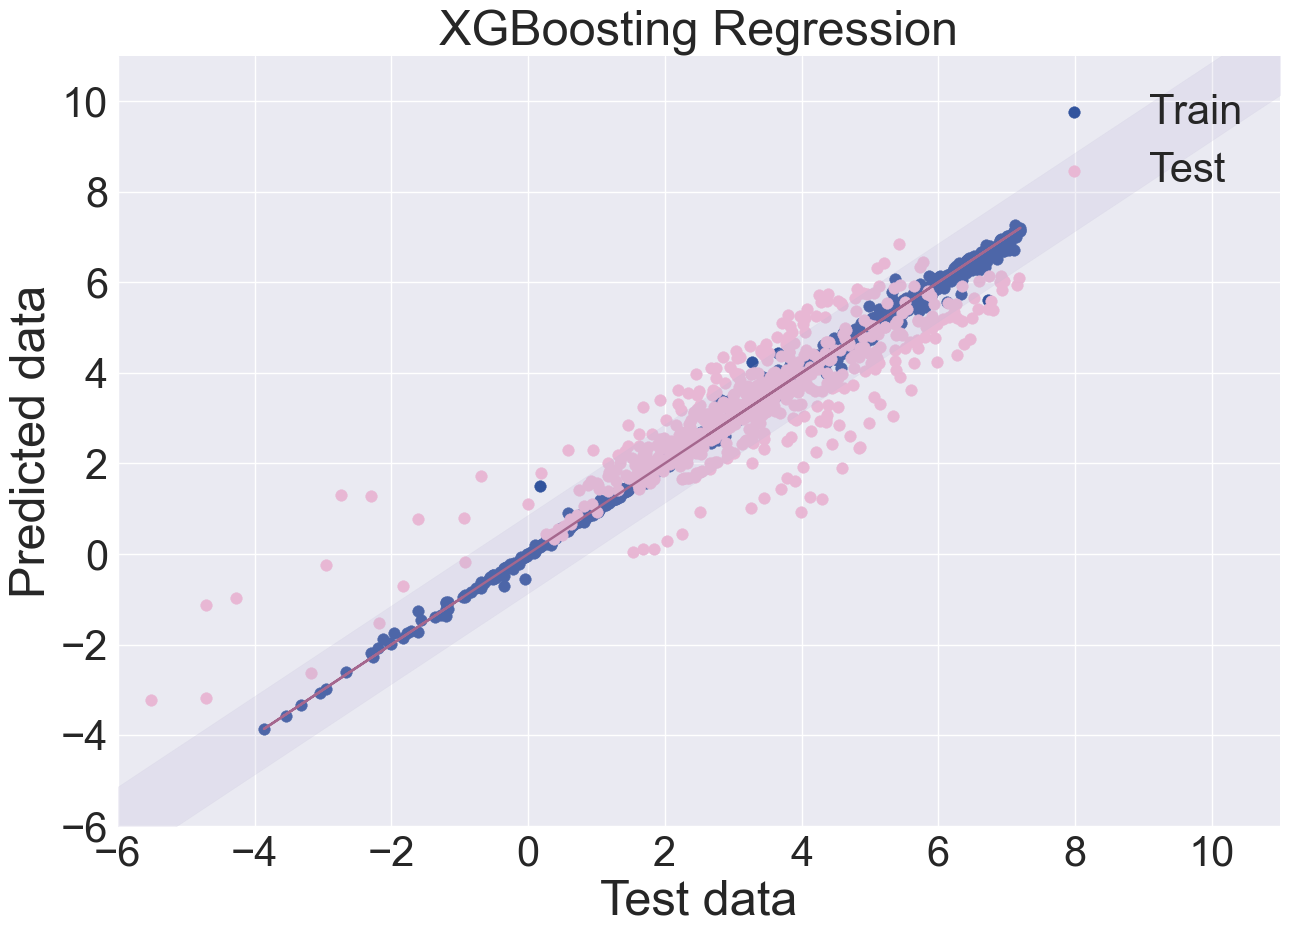

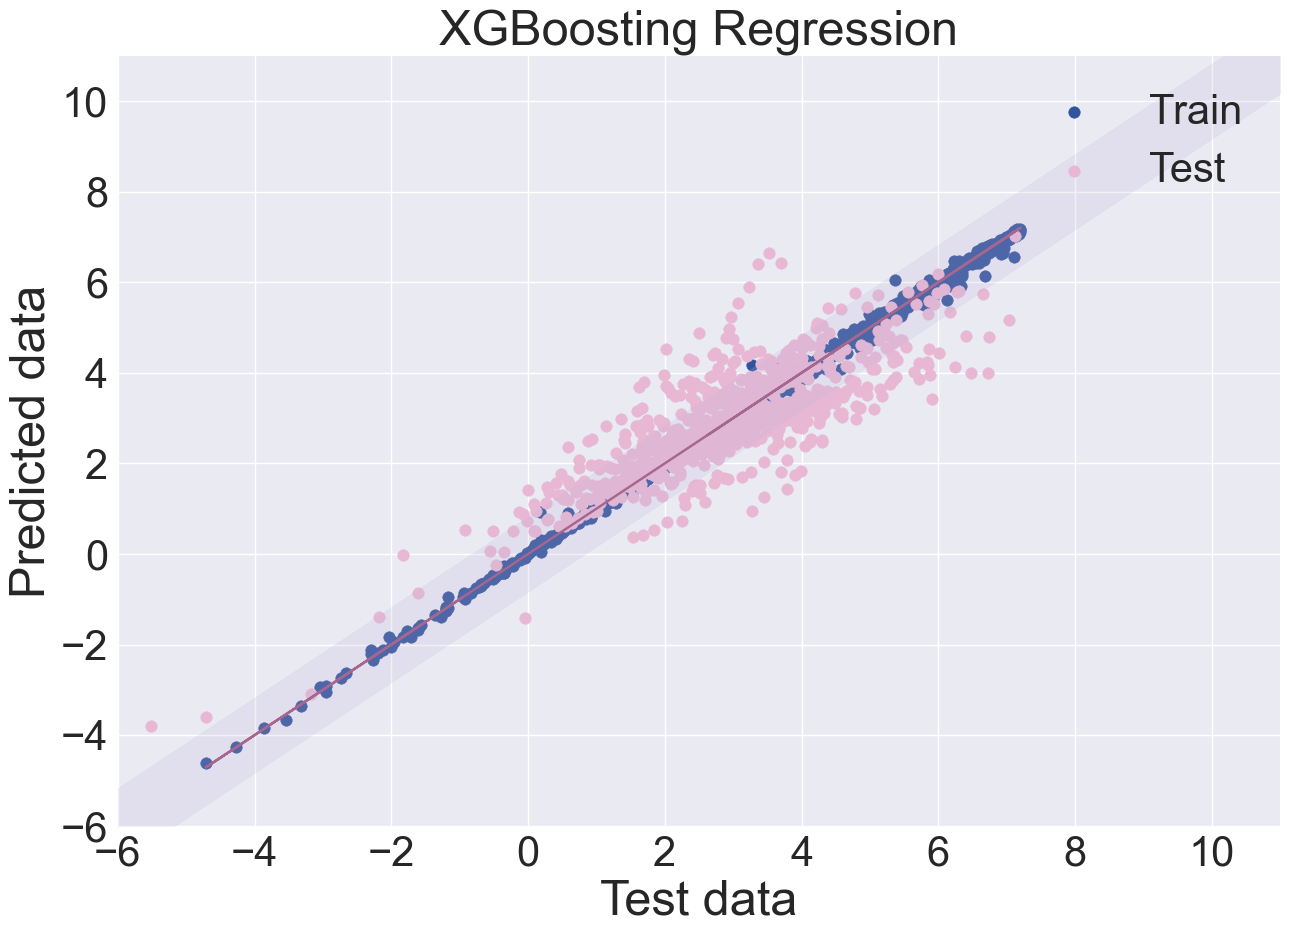

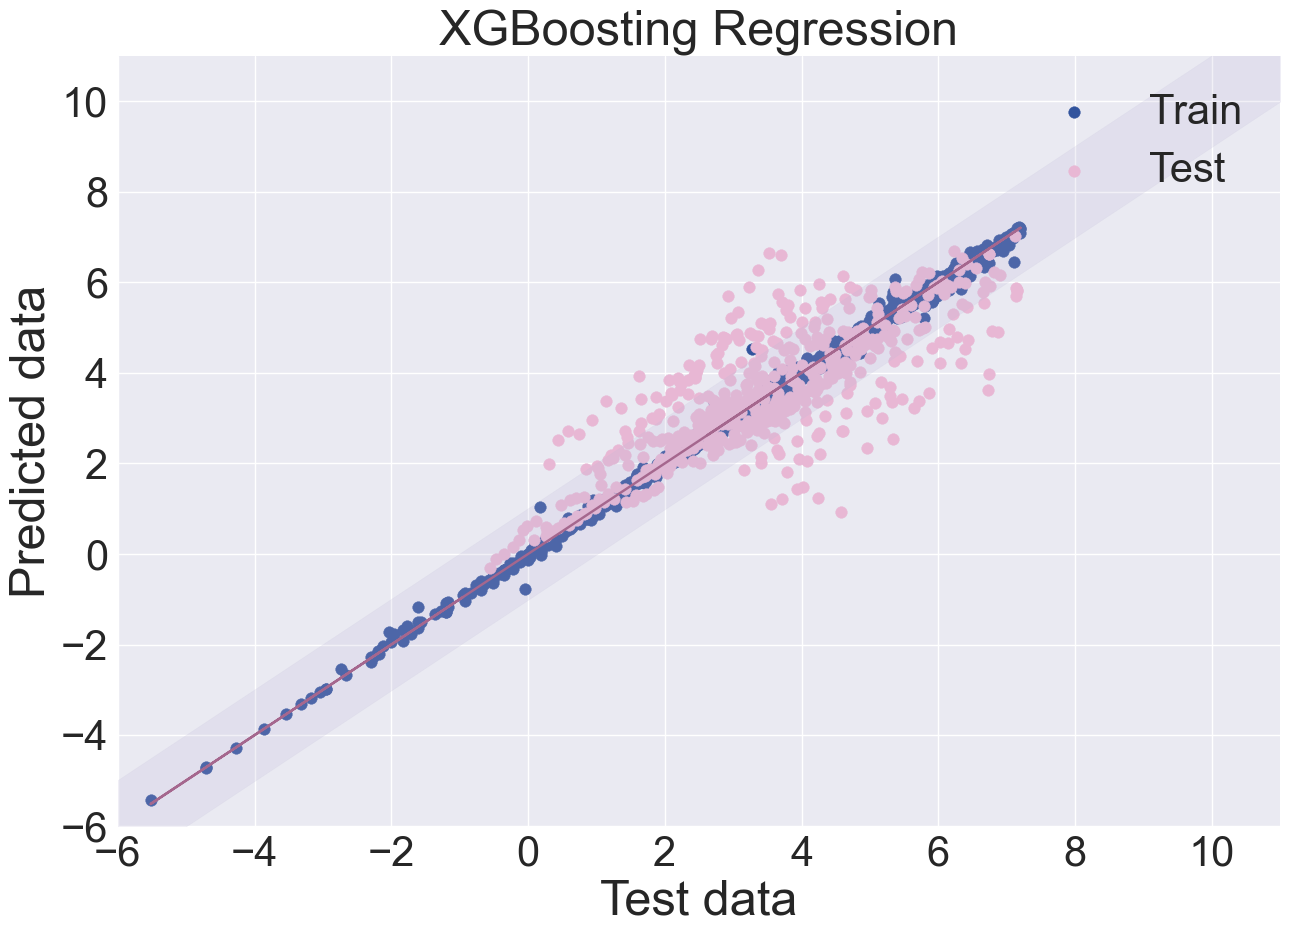

In [31]:
count = 0
#Creating a table to check accuracy on different DES classes
XGB_df = x_model[:]
XGB_df['Viscosity_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #XGB
    regr_XGB = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth, subsample = subsample, colsample_bytree = colsample_bytree)
    regr_XGB.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_XGB.predict(x_test_mod)
    y1_pred = regr_XGB.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    XGB_df['Viscosity_train' + str(count)] = None
    XGB_df['Viscosity_test' + str(count)] = None
    XGB_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    XGB_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['XGBoosting Regression' + str(count)] = regr_metrics(regr_XGB, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('XGBoosting Regression', fontsize=35)
df_error_train

In [32]:
df_error_XGB = metrics_class(XGB_df, 'XGBoosting Regression')
df_error_XGB

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train     R2_test  RMSE_train  \
0   XGBoosting Regression0         2     I  0.990188         NaN    0.003782   
1   XGBoosting Regression0         2   III  0.995083    0.565787    0.084375   
2   XGBoosting Regression0         2    IV  0.999993    0.830563    0.002516   
3   XGBoosting Regression0         2     V  0.998552    0.846609    0.067357   
4   XGBoosting Regression0         3  None  0.998629    0.514005    0.067436   
5   XGBoosting Regression1         2     I  0.999175 -455.614304    0.001125   
6   XGBoosting Regression1         2   III  0.996304    0.611121    0.076571   
7   XGBoosting Regression1         2    IV  0.999999   -0.240689    0.000991   
8   XGBoosting Regression1         2     V  0.999051    0.660206    0.058241   
9   XGBoosting Regression1         3  None  0.998160    0.069339    0.078700   
10  XGBoosting Regression2         2     I  0.999998         NaN    0.000042   
11  XGBoosting Regression2         2   III  0.993971    0.611382    0.096862   
12  XGBoosting Regression2         2    IV  0.999998   -0.012178    0.001401   
13  XGBoosting Regression2         2     V  0.999129    0.716767    0.051018   
14  XGBoosting Regression2         3  None  0.997186    0.523428    0.096300   
15  XGBoosting Regression3         2     I  0.999708         NaN    0.000518   
16  XGBoosting Regression3         2   III  0.995166    0.768562    0.084323   
17  XGBoosting Regression3         2    IV  0.999996    0.873144    0.001575   
18  XGBoosting Regression3         2     V  0.999154    0.729352    0.049997   
19  XGBoosting Regression3         3  None  0.999052    0.448113    0.059343   
20  XGBoosting Regression4         2     I  0.996308        None    0.002320   
21  XGBoosting Regression4         2   III  0.994515    0.342361    0.090730   
22  XGBoosting Regression4         2    IV  0.999995    0.948759    0.001804   
23  XGBoosting Regression4         2     V  0.998796    0.544205    0.062656   
24  XGBoosting Regression4         3  None  0.998365     0.55217    0.072747   

   RMSE_test  
0        NaN  
1   0.851085  
2   0.266614  
3   0.666672  
4   1.183495  
5   0.747456  
6   0.697165  
7   0.717445  
8   0.755405  
9   1.118024  
10  0.033364  
11  0.767944  
12  0.454056  
13  0.965842  
14  0.876003  
15  0.361455  
16  0.524507  
17  0.238991  
18  1.013065  
19   1.08616  
20      None  
21  1.021587  
22  0.151893  
23  0.945932  
24  1.244427

****Conclusion:** Boosters show the best results among all the models used by various metrics

## 5. Other models

### 5.1. Support Vector Machine
The main idea of the method is to translate the original vectors into a higher dimensional space and search for a separating hyperplane with the largest gap in this space. Two parallel hyperplanes are constructed on both sides of the hyperplane separating the classes. The separating hyperplane will be the hyperplane that creates the greatest distance to two parallel hyperplanes. The algorithm is based on the assumption that the greater the difference or distance between these parallel hyperplanes, the smaller the average classifier error will be.

In [33]:
#We optimize for SVM
regr_SVM = SVR()
#sc.inverse_transform()
search_space = {"kernel": Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    "gamma": Real(0.001, 1),
    "epsilon": Real(0.001, 0.2),
    "C": Real(2, 20)}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sc_y = MinMaxScaler(feature_range=(0, 1))
y_train01 = np.ravel(sc_y.fit_transform(np.array(y_model).reshape(-1, 1)))
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_SVM = BayesSearchCV(estimator = regr_SVM, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_SVM.fit(x_train01, y_train01, sample_weight=sample_weight)

kernel = opt_SVM.best_estimator_.kernel
gamma = opt_SVM.best_estimator_.gamma
epsilon = opt_SVM.best_estimator_.epsilon
C = opt_SVM.best_estimator_.C

print('kernel:', kernel,'gamma:', gamma, 'epsilon:', epsilon, 'C:', C)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.6713545976785756
MAE_test: 0.5954525533486978
MSE_test: 0.7712666687643409
RMSE_test: 0.8782178936712352
r2_train: 0.6400869076154311
MAE_train: 0.5568426134326936
MSE_train: 1.0155552877174117
RMSE_train: 1.007747630965914



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.41644327145363313
MAE_test: 0.6542617885788503
MSE_test: 0.8726075173000823
RMSE_test: 0.9341346355317751
r2_train: 0.7000983060162881
MAE_train: 0.5269980930366492
MSE_train: 0.9146713587794284
RMSE_train: 0.9563845245399093



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.43537164128061157
MAE_test: 0.8315359590187714
MSE_test: 1.5950818214800244
RMSE_test: 1.2629654870502298
r2_train: 0.7174492430737556
MAE_train: 0.4788362994482726
MSE_train: 0.7521493363236913
RMSE_train: 0.8672654359097285



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5015602866320326
MAE_test: 0.6389735983307782
MSE_test: 1.0394388649148592
RMSE_test: 1.0195287464877385
r2_train: 0.6893968644971009
MAE_train: 0.541862715381588
MSE_train: 0.8824626926878099
RMSE_train: 0.9393948545142292
r2_test: 0.49790781234050707
MAE_test: 0.7988612705264917
MSE_test: 1.2742148775956907
RMSE_test: 1.1288112674826074
r2_train: 0.719861346355856
MAE_train: 0.5105955528423644
MSE_train: 0.7596759589235123
RMSE_train: 0.8715939185902528



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.528970            0.541923                  -0.494629   
1            0.455162            0.334349                  -0.392954   
2            1.156830            1.114544                   2.053618   
3            1.065925            1.299729                   1.808035   

   Decision Tree Regression1  Decision Tree Regression2  \
0                  -0.537736                  -0.654589   
1                   0.016096                   0.066391   
2                   2.165629                   2.098693   
3                   1.212954                   1.624024   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                  -0.228106                   0.272850  ...   
1                  -1.839248                   0.156508  ...   
2                   1.867941                   1.404235  ...   
3                   2.433295                   1.463087  ...   

   XGBoosting Regression0  XGBoosting Regression1  XGBoosting Regression2  \
0                0.998115                0.998405                0.997402   
1                0.712040                0.619872                0.735469   
2                0.072930                0.069744                0.083164   
3                0.822062                0.753933                0.864468   

   XGBoosting Regression3  XGBoosting Regression4  Support Vector Machine0  \
0                0.998473                0.997860                 0.640087   
1                0.667251                0.597300                 0.671355   
2                0.065863                0.076182                 1.007748   
3                0.833013                1.010928                 0.878218   

   Support Vector Machine1  Support Vector Machine2  Support Vector Machine3  \
0                 0.700098                 0.717449                 0.689397   
1                 0.416443                 0.435372                 0.501560   
2                 0.956385                 0.867265                 0.939395   
3                 0.934135                 1.262965                 1.019529   

   Support Vector Machine4  
0                 0.719861  
1                 0.497908  
2                 0.871594  
3                 1.128811  

[4 rows x 35 columns]

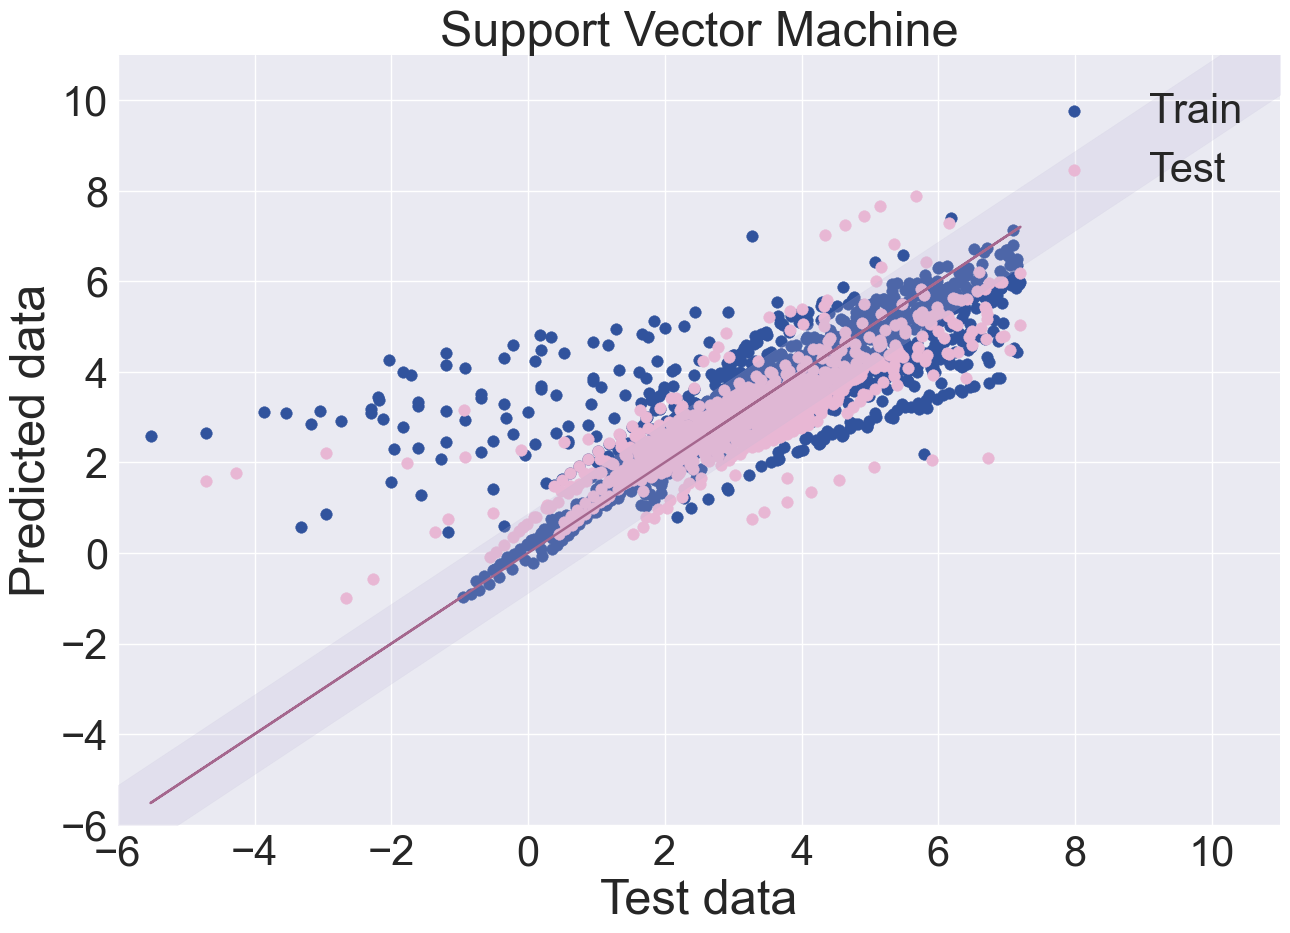

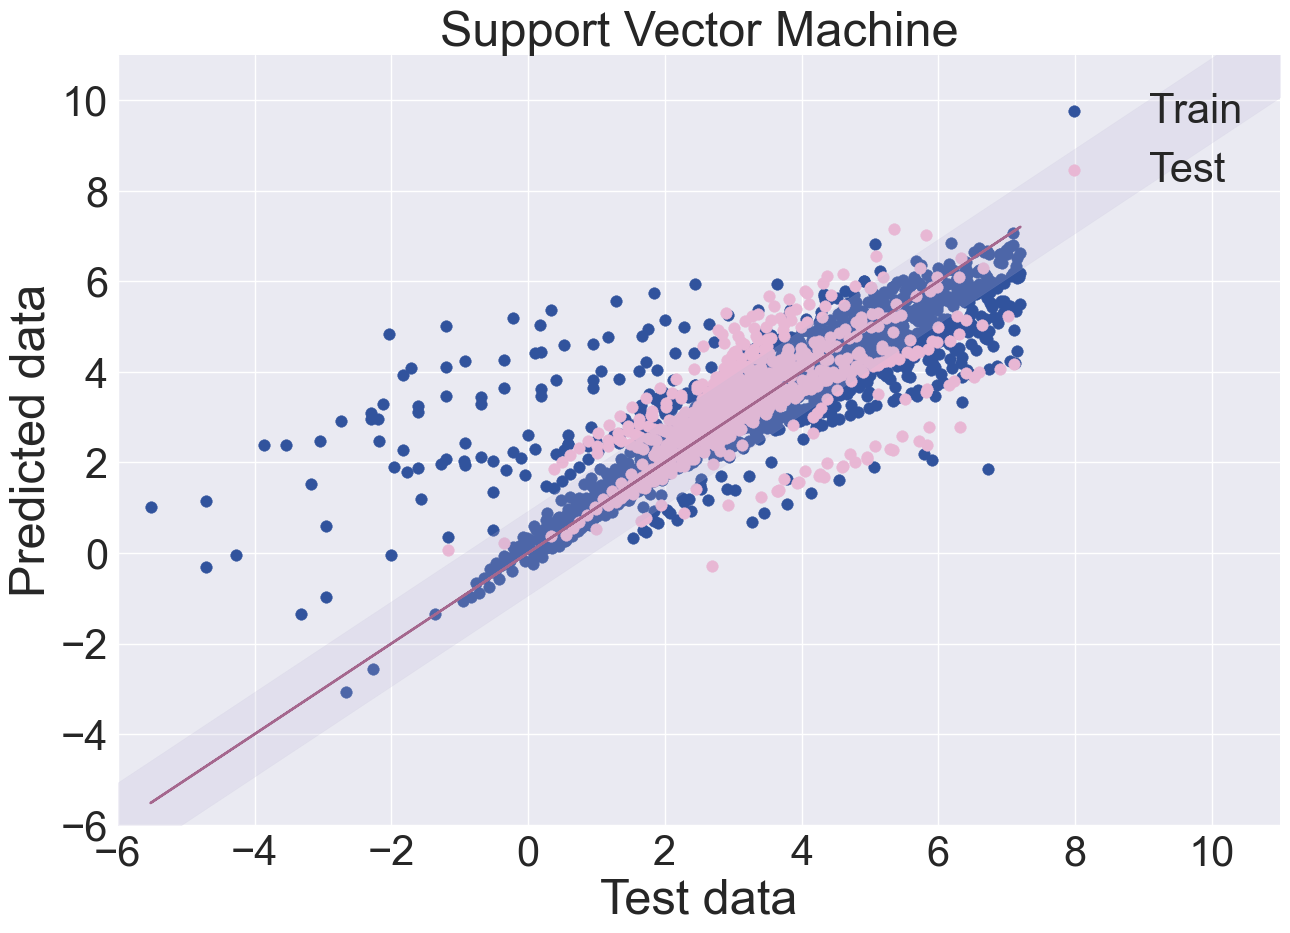

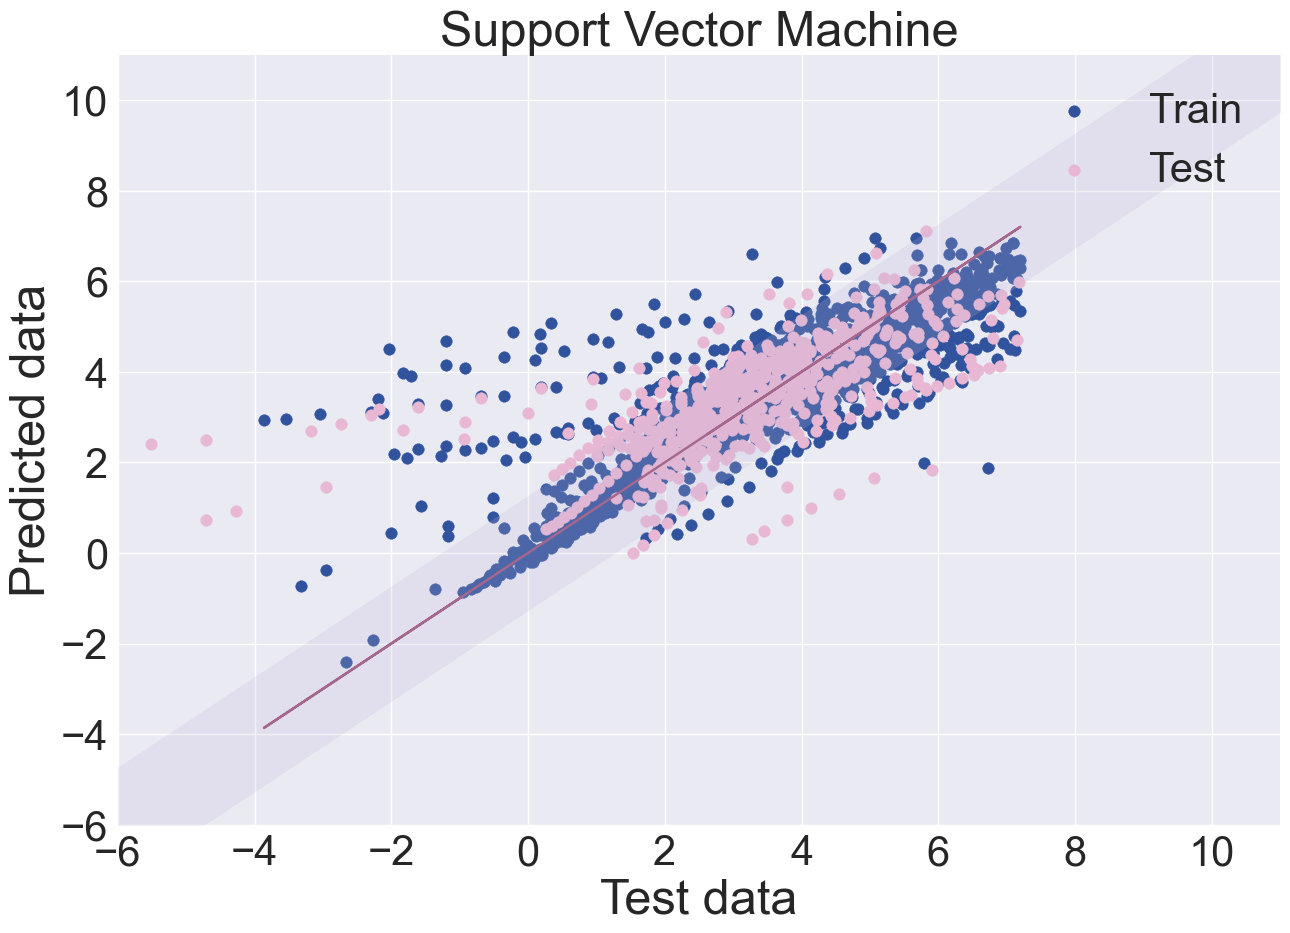

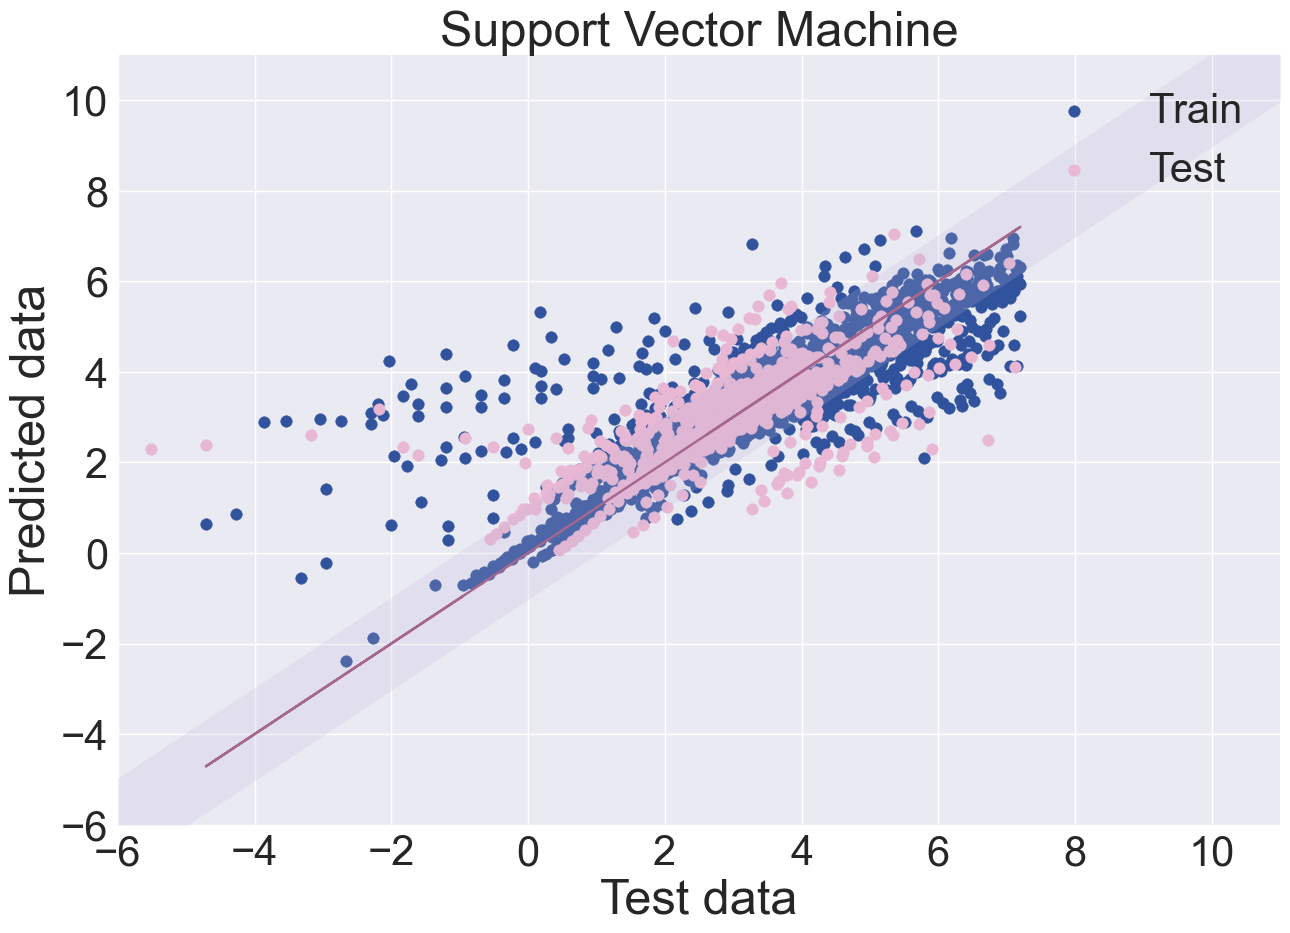

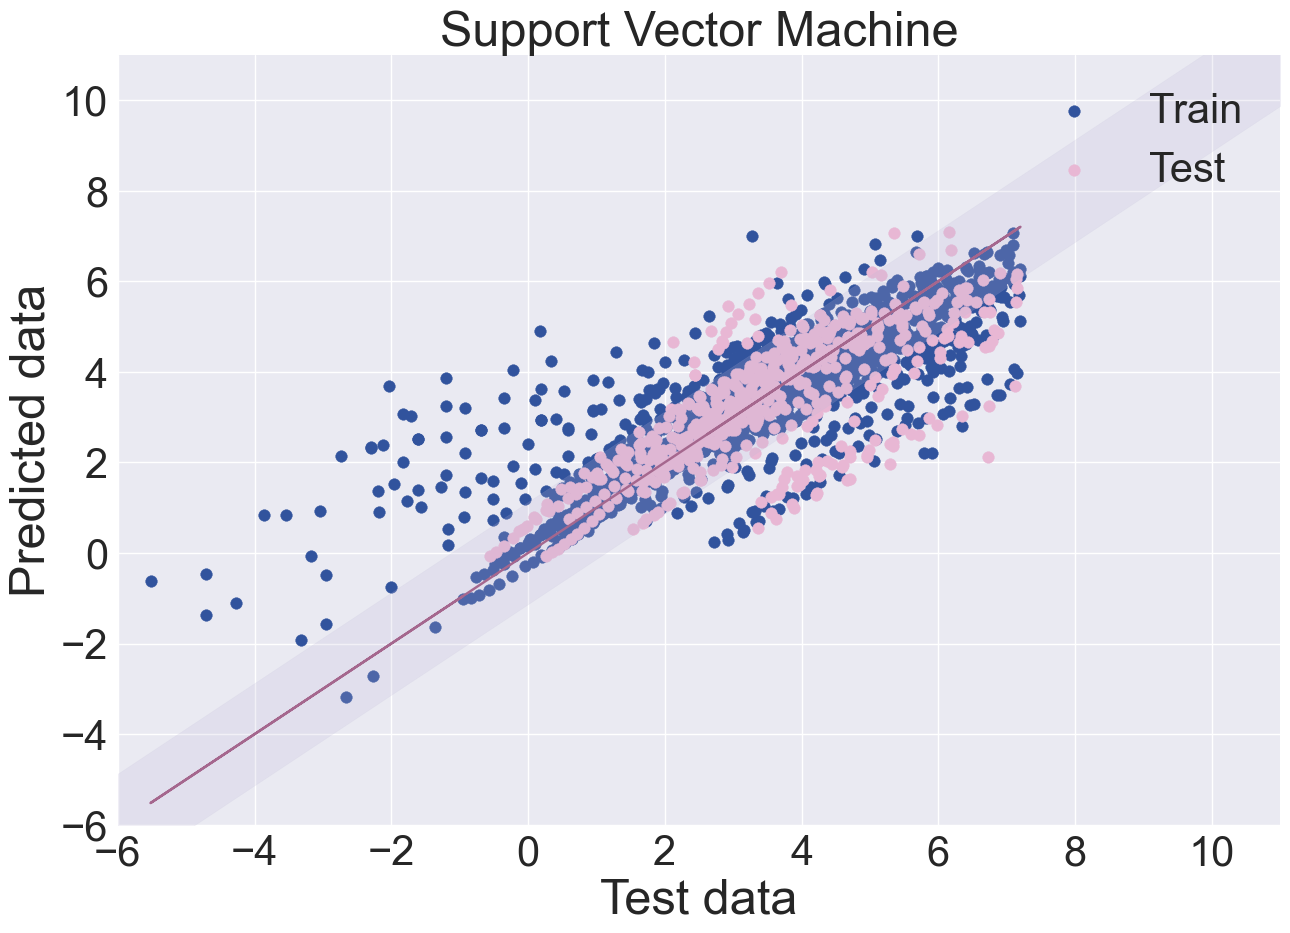

In [34]:
#SVM
count = 0
#Creating a table to check accuracy on different DES classes
SVM_df = x_model[:]
SVM_df['Viscosity_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))

    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    sc_y = MinMaxScaler(feature_range=(0, 1))
    y_train_mod = np.ravel(sc_y.fit_transform(np.array(y_train_mod).reshape(-1, 1)))
  
    #Support Vector Machine
    SVM_regr = SVR(kernel = kernel, gamma = gamma, epsilon = epsilon, C = C)
    SVM_regr.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = SVM_regr.predict(x_test_mod)
    y1_pred = SVM_regr.predict(x_train_mod)
  
    #Rescaling the data
    y_train_mod = sc_y.inverse_transform(y_train_mod.reshape(-1, 1))
    y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
    y1_pred = sc_y.inverse_transform(y1_pred.reshape(-1, 1))
    
    #Filling in the table in accordance with the metrics
    SVM_df['Viscosity_train' + str(count)] = None
    SVM_df['Viscosity_test' + str(count)] = None
    SVM_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred[:, 0]
    SVM_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred[:, 0]

    #Calculating metrics
    df_error_train['Support Vector Machine' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Support Vector Machine', fontsize=35)
df_error_train

In [35]:
df_error_SVM = metrics_class(SVM_df, 'Support Vector Machine')
df_error_SVM

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type   R2_train      R2_test  \
0   Support Vector Machine0         2     I -58.186281          NaN   
1   Support Vector Machine0         2   III   0.694173     0.693263   
2   Support Vector Machine0         2    IV   0.973322     0.736143   
3   Support Vector Machine0         2     V   0.314411     0.604011   
4   Support Vector Machine0         3  None   0.934268     0.537402   
5   Support Vector Machine1         2     I -55.292316 -3632.670297   
6   Support Vector Machine1         2   III   0.766878     0.471647   
7   Support Vector Machine1         2    IV   0.957444     0.478428   
8   Support Vector Machine1         2     V   0.433913     0.302698   
9   Support Vector Machine1         3  None   0.888044     0.426771   
10  Support Vector Machine2         2     I -58.130799          NaN   
11  Support Vector Machine2         2   III   0.770793     0.412246   
12  Support Vector Machine2         2    IV   0.969449     0.798355   
13  Support Vector Machine2         2     V   0.444748     0.275979   
14  Support Vector Machine2         3  None   0.911359     0.212956   
15  Support Vector Machine3         2     I -55.557461          NaN   
16  Support Vector Machine3         2   III   0.694516     0.792674   
17  Support Vector Machine3         2    IV   0.954567      0.78868   
18  Support Vector Machine3         2     V   0.443522     0.218989   
19  Support Vector Machine3         3  None   0.922479      0.51055   
20  Support Vector Machine4         2     I -47.168484         None   
21  Support Vector Machine4         2   III   0.775575     0.487304   
22  Support Vector Machine4         2    IV   0.951709      0.76887   
23  Support Vector Machine4         2     V   0.515245    -0.032751   
24  Support Vector Machine4         3  None   0.900593     0.671549   

    RMSE_train RMSE_test  
0     0.293748       NaN  
1     0.665414  0.715327  
2     0.152995  0.332707  
3     1.465865  1.071159  
4     0.466912  1.154655  
5     0.293855   2.10855  
6     0.608159  0.812626  
7     0.170178  0.465173  
8     1.422158  1.082138  
9     0.613911  0.877443  
10    0.253676  0.414801  
11    0.597212   0.94442  
12    0.169244  0.202663  
13    1.288337  1.544222  
14    0.540510  1.125746  
15    0.227762  1.363458  
16    0.670340  0.496433  
17    0.176880  0.308459  
18    1.282107   1.72093  
19    0.536753  1.022876  
20    0.265000      None  
21    0.580370   0.90201  
22    0.182358  0.322593  
23    1.257319  1.423879  
24    0.567283  1.065733

### 5.2. K-nearest neighbors
K-nearest neighbors is a nonparametric method that intuitively approximates the relationship between independent variables and a continuous result by averaging observations in the same area.

In [36]:
#We optimize for KNN
regr_KNN = KNeighborsRegressor()

search_space = {"n_neighbors": Integer(5, 15),
    "leaf_size": Integer(2, 10),
    "p": Real(0.1, 3),
    "algorithm": Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']),
    "metric": Categorical(['euclidean','manhattan'])}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_KNN = BayesSearchCV(estimator = regr_KNN, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_KNN.fit(x_train01, y_model)#, sample_weight=sample_weight)

n_neighbors = opt_KNN.best_estimator_.n_neighbors
weights = opt_KNN.best_estimator_.weights
leaf_size = opt_KNN.best_estimator_.leaf_size
p = opt_KNN.best_estimator_.p
algorithm = opt_KNN.best_estimator_.algorithm
metric = opt_KNN.best_estimator_.metric

print('n_neighbors:', n_neighbors,'leaf_size:', leaf_size, 'p:', p,'algorithm:', algorithm, 'metric:', metric)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_neighbors: 5 leaf_size: 2 p: 0.1 algorithm: kd_tree metric: manhattan


r2_test: 0.7517145992752204
MAE_test: 0.5558263892833291
MSE_test: 0.5826774163495934
RMSE_test: 0.7633330965899444
r2_train: 0.9292685241821619
MAE_train: 0.24207030841799276
MSE_train: 0.19958074822715585
RMSE_train: 0.4467446118613585



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.4504615918922483
MAE_test: 0.663926545718514
MSE_test: 0.8217390401006116
RMSE_test: 0.9064982295077093
r2_train: 0.9349761121716182
MAE_train: 0.2387434192175485
MSE_train: 0.19831661183059968
RMSE_train: 0.4453275332051676
r2_test: 0.6869830166946969
MAE_test: 0.6490677970672802
MSE_test: 0.88427669665268
RMSE_test: 0.940359876139279
r2_train: 0.9273974958938854
MAE_train: 0.23239997360434617
MSE_train: 0.19326766586262137
RMSE_train: 0.4396221853621827
r2_test: 0.5601528638007418
MAE_test: 0.6913471141194127
MSE_test: 0.9172507641851767
RMSE_test: 0.9577320941605626



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a D

r2_train: 0.930784509880041
MAE_train: 0.24215334875207473
MSE_train: 0.1966499394414369
RMSE_train: 0.4434522966920308
r2_test: 0.5374605601071099
MAE_test: 0.7563433370497944
MSE_test: 1.17383749493031
RMSE_test: 1.0834378131347964
r2_train: 0.9358869808789153
MAE_train: 0.2178675037624837
MSE_train: 0.1738607601868497
RMSE_train: 0.4169661379379022



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.528970            0.541923                  -0.494629   
1            0.455162            0.334349                  -0.392954   
2            1.156830            1.114544                   2.053618   
3            1.065925            1.299729                   1.808035   

   Decision Tree Regression1  Decision Tree Regression2  \
0                  -0.537736                  -0.654589   
1                   0.016096                   0.066391   
2                   2.165629                   2.098693   
3                   1.212954                   1.624024   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                  -0.228106                   0.272850  ...   
1                  -1.839248                   0.156508  ...   
2                   1.867941                   1.404235  ...   
3                   2.433295                   1.463087  ...   

   Support Vector Machine0  Support Vector Machine1  Support Vector Machine2  \
0                 0.640087                 0.700098                 0.717449   
1                 0.671355                 0.416443                 0.435372   
2                 1.007748                 0.956385                 0.867265   
3                 0.878218                 0.934135                 1.262965   

   Support Vector Machine3  Support Vector Machine4  K-nearest neighbors0  \
0                 0.689397                 0.719861              0.929269   
1                 0.501560                 0.497908              0.751715   
2                 0.939395                 0.871594              0.446745   
3                 1.019529                 1.128811              0.763333   

   K-nearest neighbors1  K-nearest neighbors2  K-nearest neighbors3  \
0              0.934976              0.927397              0.930785   
1              0.450462              0.686983              0.560153   
2              0.445328              0.439622              0.443452   
3              0.906498              0.940360              0.957732   

   K-nearest neighbors4  
0              0.935887  
1              0.537461  
2              0.416966  
3              1.083438  

[4 rows x 40 columns]

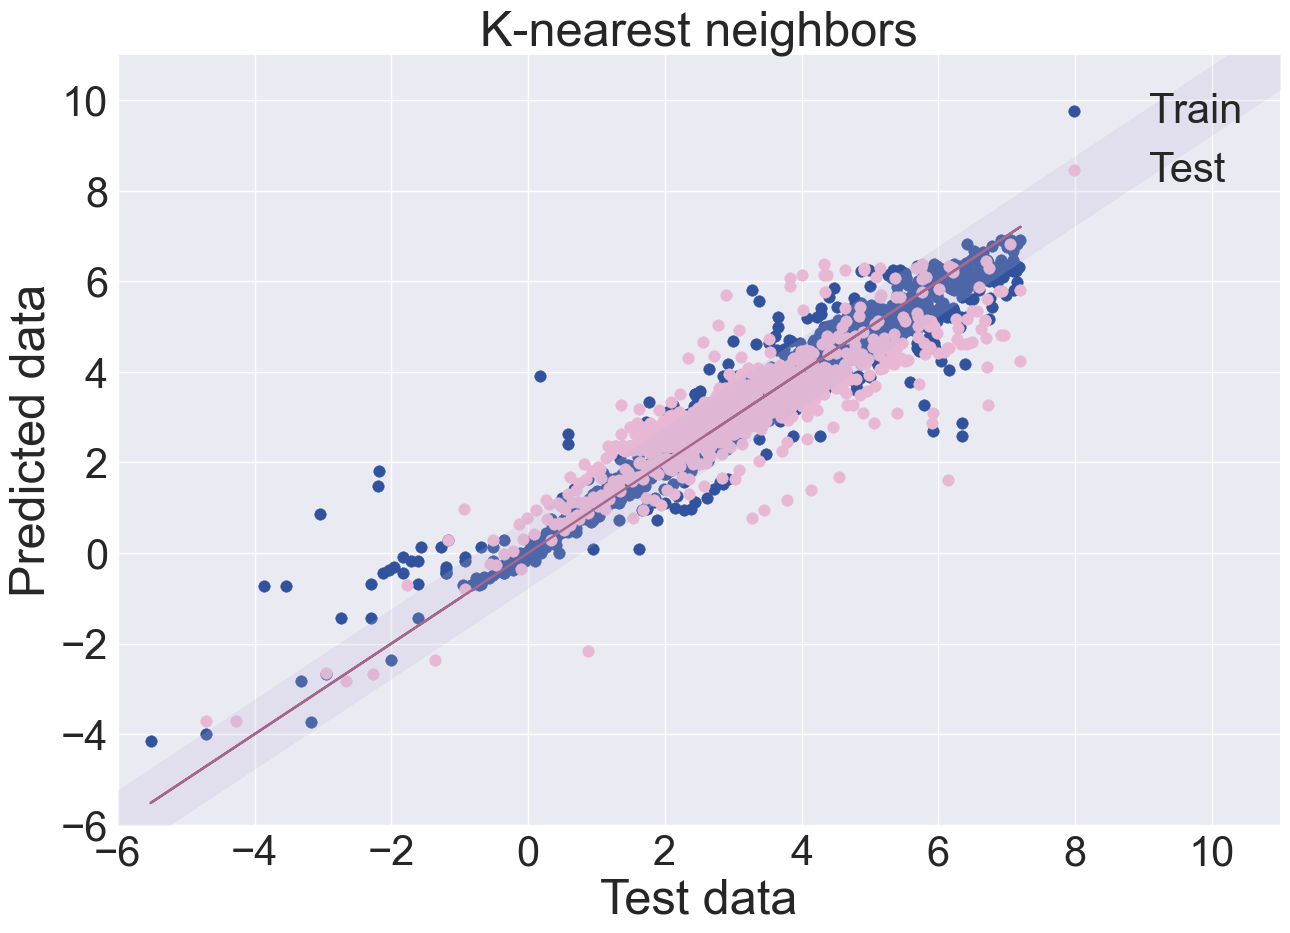

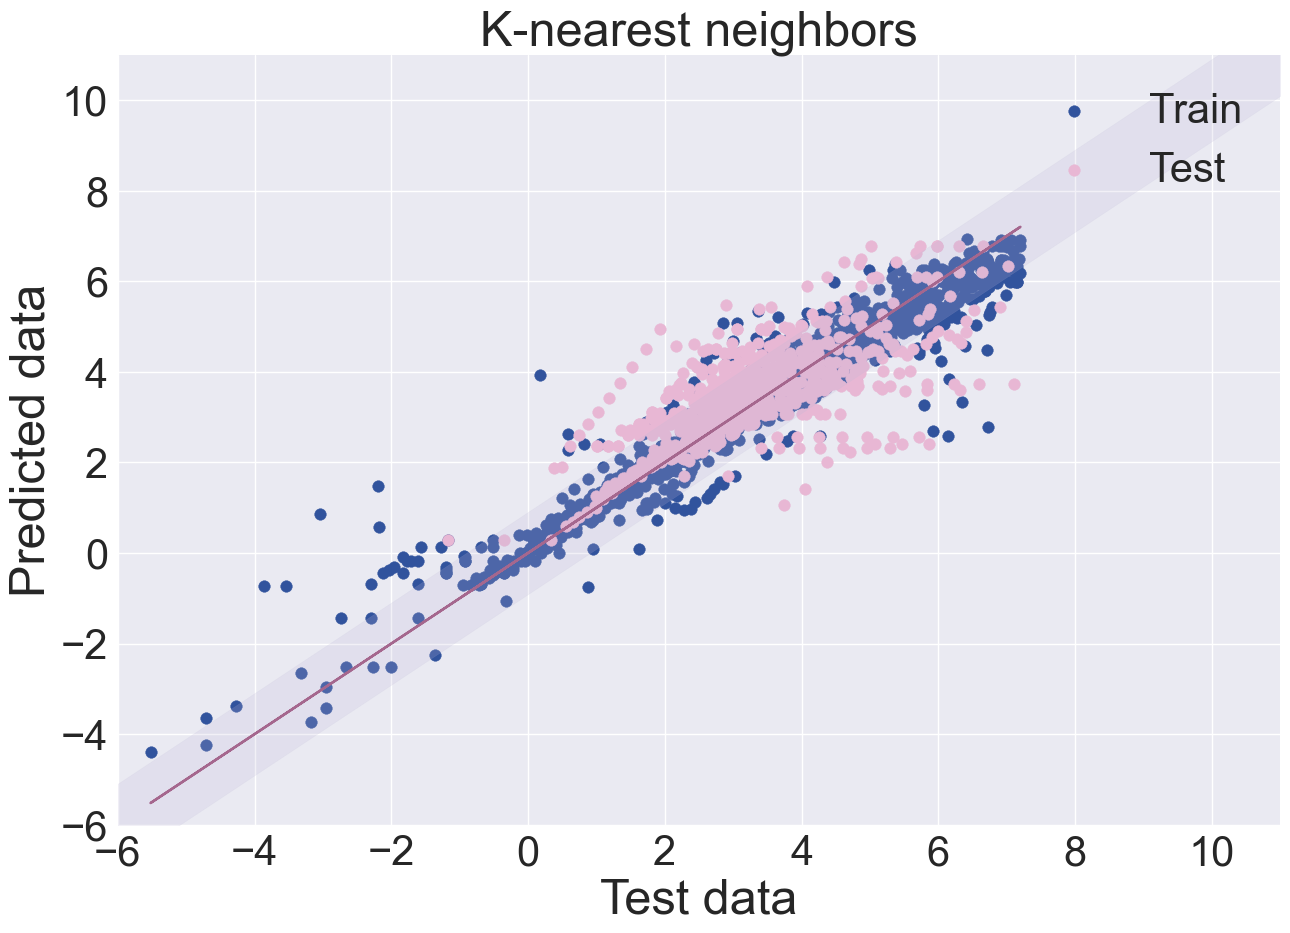

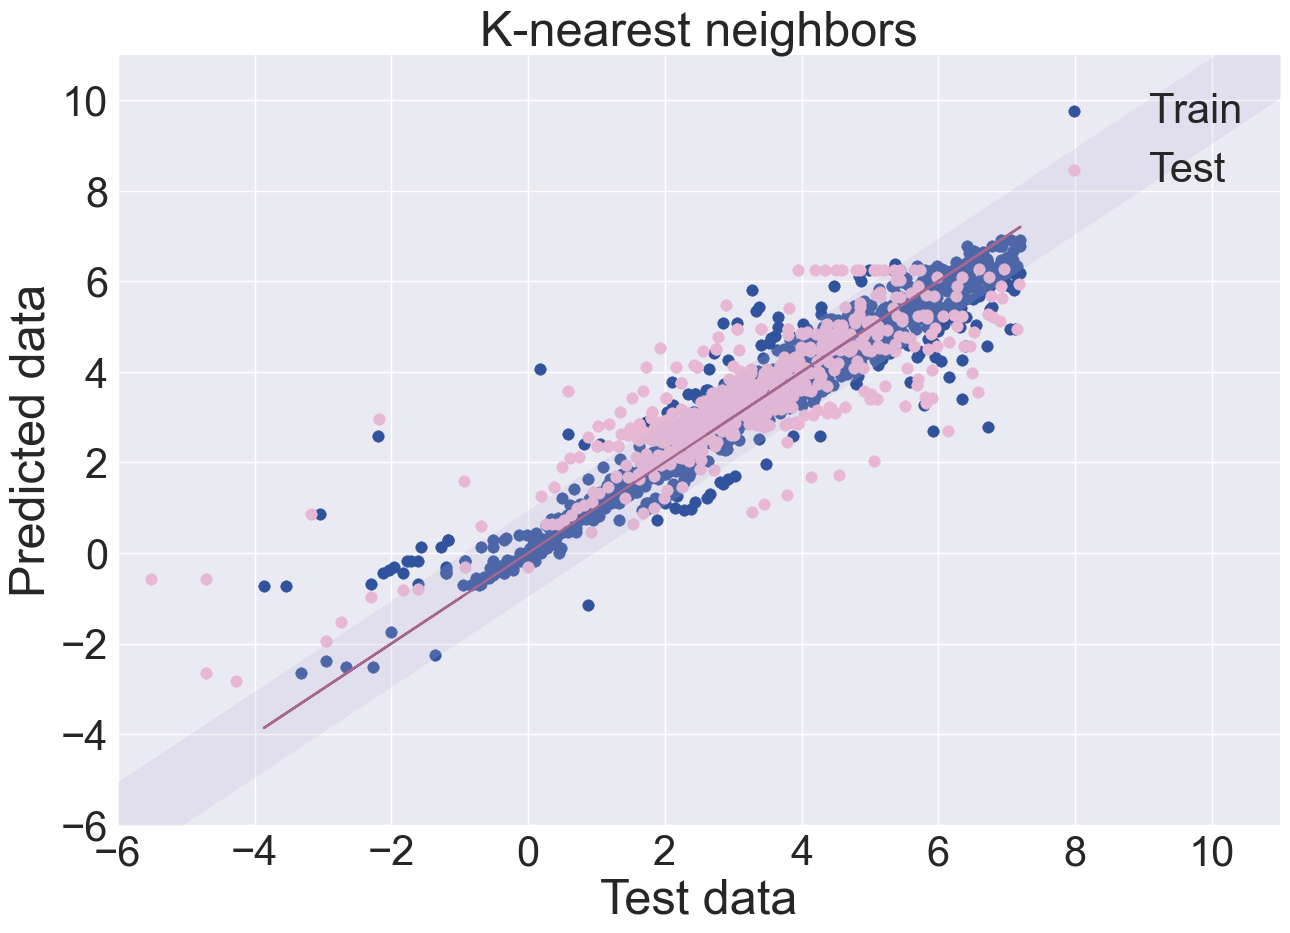

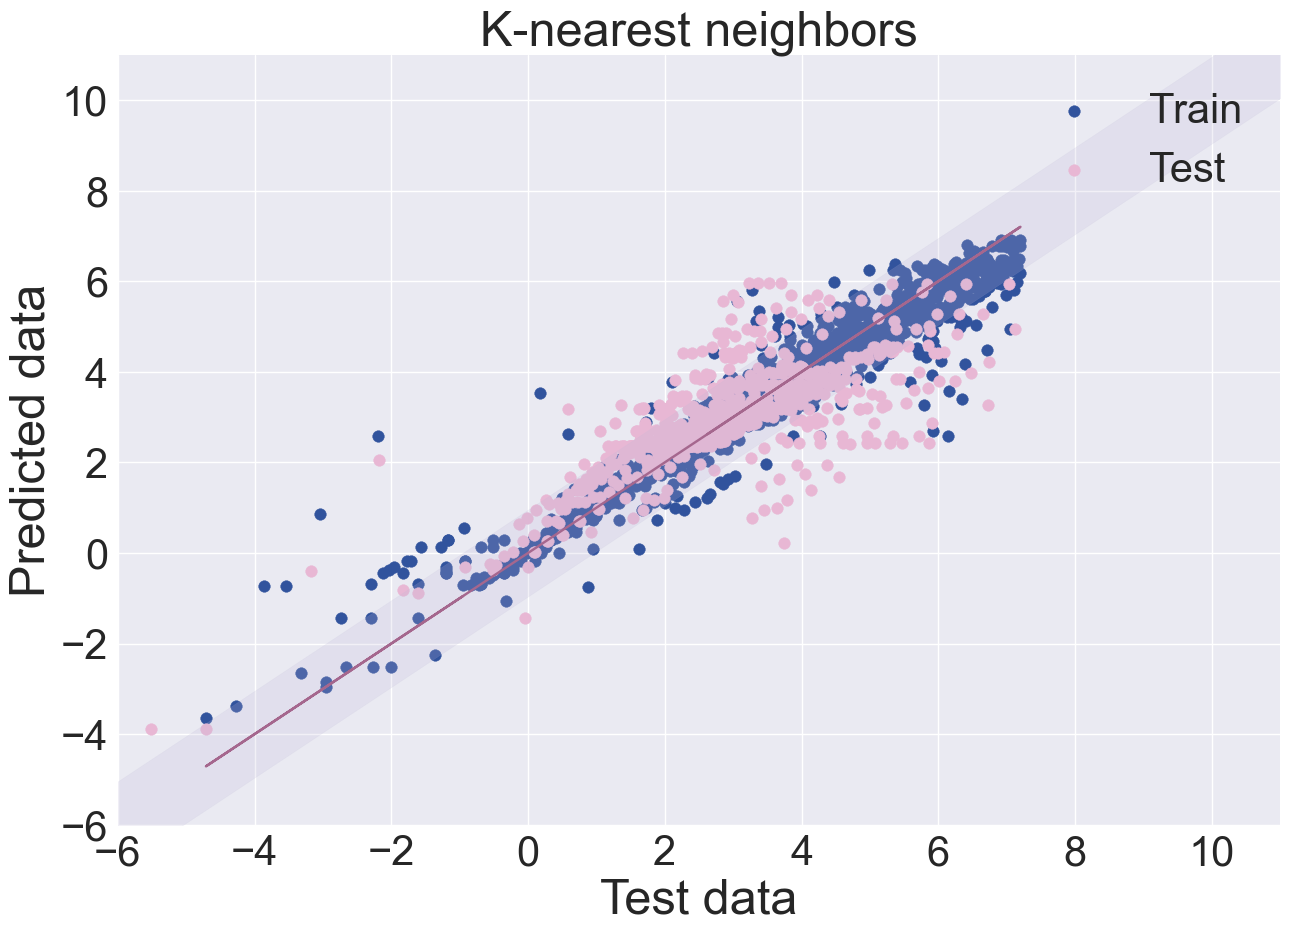

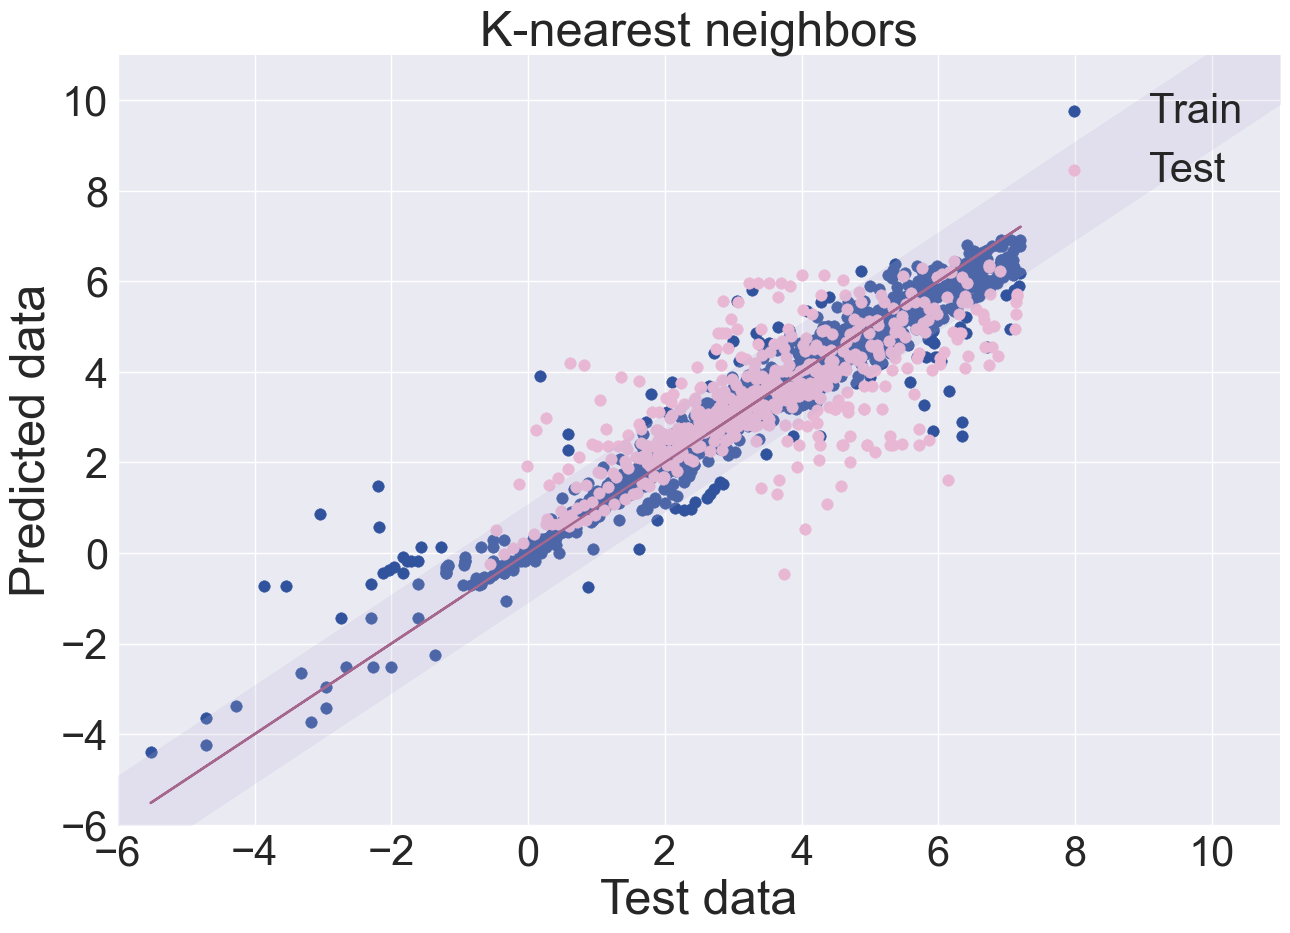

In [37]:
#KNN
count = 0
#Creating a table to check accuracy on different DES classes
KNN_df = x_model[:]
KNN_df['Viscosity_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #K-nearest neighbors
    KNN_regr = KNeighborsRegressor(n_neighbors = n_neighbors,leaf_size = leaf_size, p = p, algorithm = algorithm,metric=metric)
    KNN_regr.fit(x_train_mod, y_train_mod)#,sample_weight=sample_w)
    y_pred = KNN_regr.predict(x_test_mod)
    y1_pred = KNN_regr.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    KNN_df['Viscosity_train' + str(count)] = None
    KNN_df['Viscosity_test' + str(count)] = None
    KNN_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    KNN_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['K-nearest neighbors' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('K-nearest neighbors', fontsize=35)
df_error_train

In [38]:
df_error_KNN = metrics_class(KNN_df, 'K-nearest neighbors')
df_error_KNN

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type    R2_train      R2_test  RMSE_train  \
0   K-nearest neighbors0         2     I -165.345927          NaN    0.492459   
1   K-nearest neighbors0         2   III    0.889588     0.729991    0.399818   
2   K-nearest neighbors0         2    IV    0.722166     0.660486    0.493735   
3   K-nearest neighbors0         2     V    0.912501     0.761426    0.523676   
4   K-nearest neighbors0         3  None    0.958463       0.6069    0.371161   
5   K-nearest neighbors1         2     I -953.892906 -1472.534212    1.210280   
6   K-nearest neighbors1         2   III    0.906277     0.584004    0.385610   
7   K-nearest neighbors1         2    IV    0.786839     0.771968    0.380870   
8   K-nearest neighbors1         2     V    0.920342     0.292297    0.533485   
9   K-nearest neighbors1         3  None    0.952569     0.146816    0.399589   
10  K-nearest neighbors2         2     I -630.634854          NaN    0.829097   
11  K-nearest neighbors2         2   III    0.910942     0.495496    0.372263   
12  K-nearest neighbors2         2    IV    0.784372     0.803118    0.449633   
13  K-nearest neighbors2         2     V    0.907113     0.680694    0.526941   
14  K-nearest neighbors2         3  None    0.947830     0.335374    0.414664   
15  K-nearest neighbors3         2     I -622.923950          NaN    0.756489   
16  K-nearest neighbors3         2   III    0.893720      0.67588    0.395390   
17  K-nearest neighbors3         2    IV    0.752175     0.936847    0.413110   
18  K-nearest neighbors3         2     V    0.914058     0.566098    0.503852   
19  K-nearest neighbors3         3  None    0.957627     0.375302    0.396835   
20  K-nearest neighbors4         2     I -164.449055         None    0.491130   
21  K-nearest neighbors4         2   III    0.917956     0.496667    0.350907   
22  K-nearest neighbors4         2    IV    0.750705     0.935719    0.414333   
23  K-nearest neighbors4         2     V    0.921634     0.239313    0.505530   
24  K-nearest neighbors4         3  None    0.958418     0.521176    0.366897   

   RMSE_test  
0        NaN  
1   0.671136  
2   0.377405  
3   0.831427  
4   1.064392  
5   1.342738  
6   0.721062  
7   0.307577  
8   1.090178  
9   1.070475  
10  0.835156  
11  0.874983  
12  0.200255  
13  1.025505  
14  1.034499  
15  1.357925  
16  0.620707  
17  0.168626  
18  1.282715  
19   1.15559  
20      None  
21  0.893736  
22  0.170125  
23   1.22202  
24  1.286771

### 5.3. Multilayer perceptron (MLP)

In [40]:
#We optimize for MLP
regr_MLP = MLPRegressor()

params_dict = [{'hidden_layer_sizes':  [(4,4,4,4),(4,4),(4,4,3,3),(4,3,4),(10,10,10,10,10), (3,), (6,6,6,6), (4,4), (10,5,5,10), (6,), (12,12,12), (3,3,3), (6,6,6), (3,3,3,3,3), (12, 12, 6, 6, 3, 3)],
                'activation': ['relu','identity','logistic','tanh'],
                'solver': ['adam', 'lbfgs'],
                'learning_rate':['constant','adaptive','invscaling'],
                'learning_rate_init': [0.1,0.01,0.5, 0.00001],
                'alpha': [0.01,0.1,0.001, 0.0001],
                'max_iter': [1000]}]

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_MLP = GridSearchCV(MLPRegressor(), params_dict, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_jobs=-1, scoring='r2', verbose=10)
opt_MLP.fit(x_train01, y_model)#, sample_weight=sample_weight)

hidden_layer_sizes = opt_MLP.best_estimator_.hidden_layer_sizes
activation = opt_MLP.best_estimator_.activation
solver = opt_MLP.best_estimator_.solver
learning_rate = opt_MLP.best_estimator_.learning_rate
learning_rate_init = opt_MLP.best_estimator_.learning_rate_init
alpha = opt_MLP.best_estimator_.alpha

print('hidden_layer_sizes:', hidden_layer_sizes,'activation:', activation, 'solver:', solver,'learning_rate:', learning_rate, 'learning_rate_init:', learning_rate_init, 'alpha:', alpha)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
hidden_layer_sizes: (4, 3, 4) activation: logistic solver: adam learning_rate: invscaling learning_rate_init: 0.01 alpha: 0.0001



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.5003748270967618
MAE_test: 0.7544938286792175
MSE_test: 1.1725228468555022
RMSE_test: 1.0828309410316563
r2_train: 0.7157445890870371
MAE_train: 0.5830135715372288
MSE_train: 0.8020744221954899
RMSE_train: 0.895586077490874



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.1838605705714973
MAE_test: 0.832367510986423
MSE_test: 1.2203944645764215
RMSE_test: 1.1047146530106413
r2_train: 0.7181882117670799
MAE_train: 0.6497128676305159
MSE_train: 0.8594988839144907
RMSE_train: 0.9270916264935687



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5473536564289117
MAE_test: 0.8246597099629301
MSE_test: 1.2787312982776895
RMSE_test: 1.1308100186493262
r2_train: 0.7845313093426333
MAE_train: 0.49695992843121717
MSE_train: 0.573577060771342
RMSE_train: 0.7573487048720305



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.38151212745715224
MAE_test: 0.7773373759121525
MSE_test: 1.2897855346549099
RMSE_test: 1.1356872521319017
r2_train: 0.7401337709762135
MAE_train: 0.5733211696207746
MSE_train: 0.7383127405705707
RMSE_train: 0.8592512674244773
r2_test: 0.30042986054157184
MAE_test: 0.8925135537575177
MSE_test: 1.7753765175572689
RMSE_test: 1.3324325564760375
r2_train: 0.7802437106935789
MAE_train: 0.507124306856814
MSE_train: 0.5959319345497894
RMSE_train: 0.7719662781169845



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.490785            0.561918            0.513998   
1            0.600815            0.139422            0.486092   
2            1.198681            1.155901            1.137425   
3            0.967889            1.134392            1.204905   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.528970            0.541923                  -0.494629   
1            0.455162            0.334349                  -0.392954   
2            1.156830            1.114544                   2.053618   
3            1.065925            1.299729                   1.808035   

   Decision Tree Regression1  Decision Tree Regression2  \
0                  -0.537736                  -0.654589   
1                   0.016096                   0.066391   
2                   2.165629                   2.098693   
3                   1.212954                   1.624024   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                  -0.228106                   0.272850  ...   
1                  -1.839248                   0.156508  ...   
2                   1.867941                   1.404235  ...   
3                   2.433295                   1.463087  ...   

   K-nearest neighbors0  K-nearest neighbors1  K-nearest neighbors2  \
0              0.929269              0.934976              0.927397   
1              0.751715              0.450462              0.686983   
2              0.446745              0.445328              0.439622   
3              0.763333              0.906498              0.940360   

   K-nearest neighbors3  K-nearest neighbors4  Multilayer perceptron (MLP)0  \
0              0.930785              0.935887                      0.715745   
1              0.560153              0.537461                      0.500375   
2              0.443452              0.416966                      0.895586   
3              0.957732              1.083438                      1.082831   

   Multilayer perceptron (MLP)1  Multilayer perceptron (MLP)2  \
0                      0.718188                      0.784531   
1                      0.183861                      0.547354   
2                      0.927092                      0.757349   
3                      1.104715                      1.130810   

   Multilayer perceptron (MLP)3  Multilayer perceptron (MLP)4  
0                      0.740134                      0.780244  
1                      0.381512                      0.300430  
2                      0.859251                      0.771966  
3                      1.135687                      1.332433  

[4 rows x 45 columns]

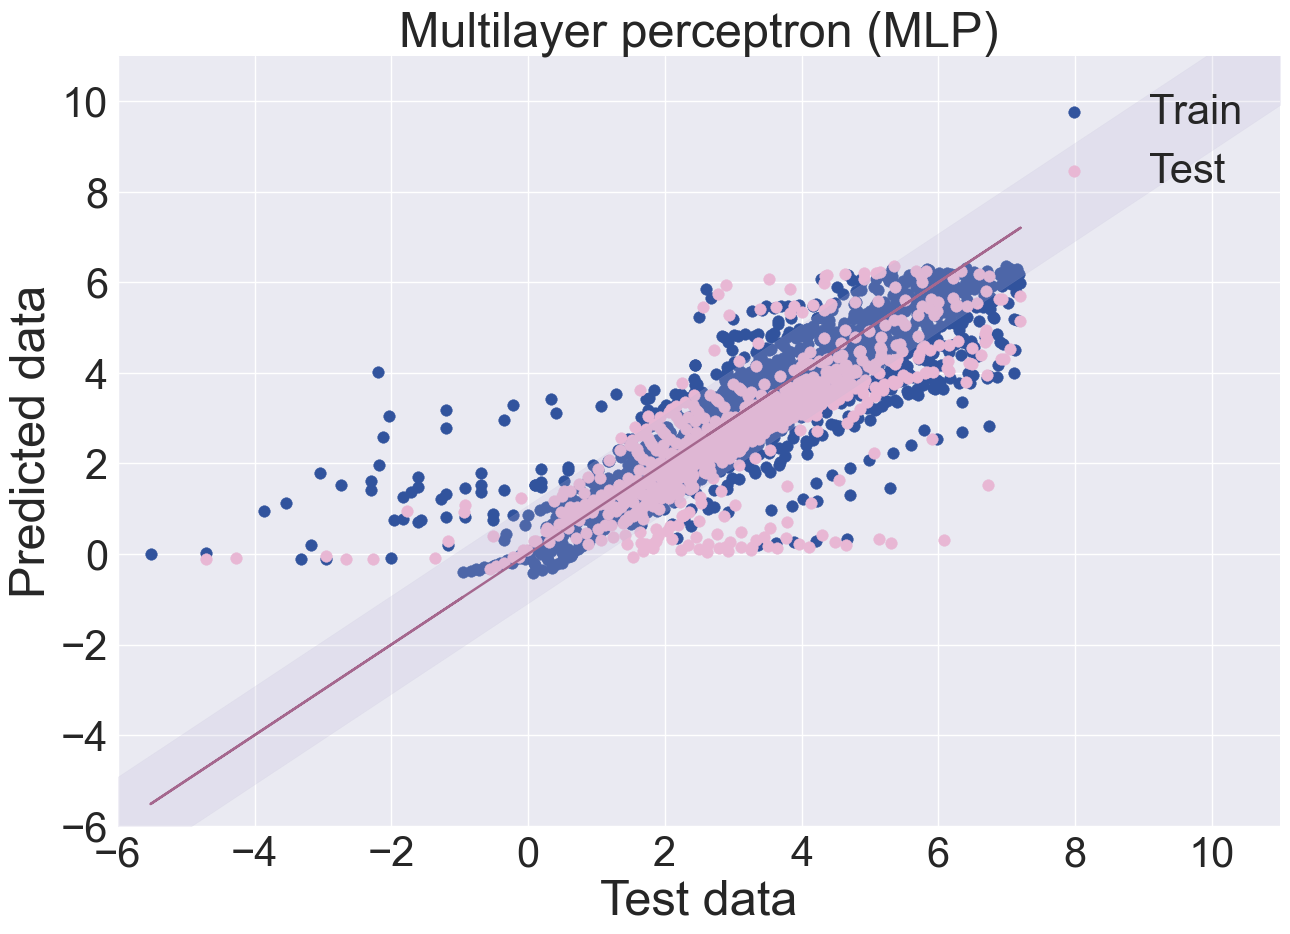

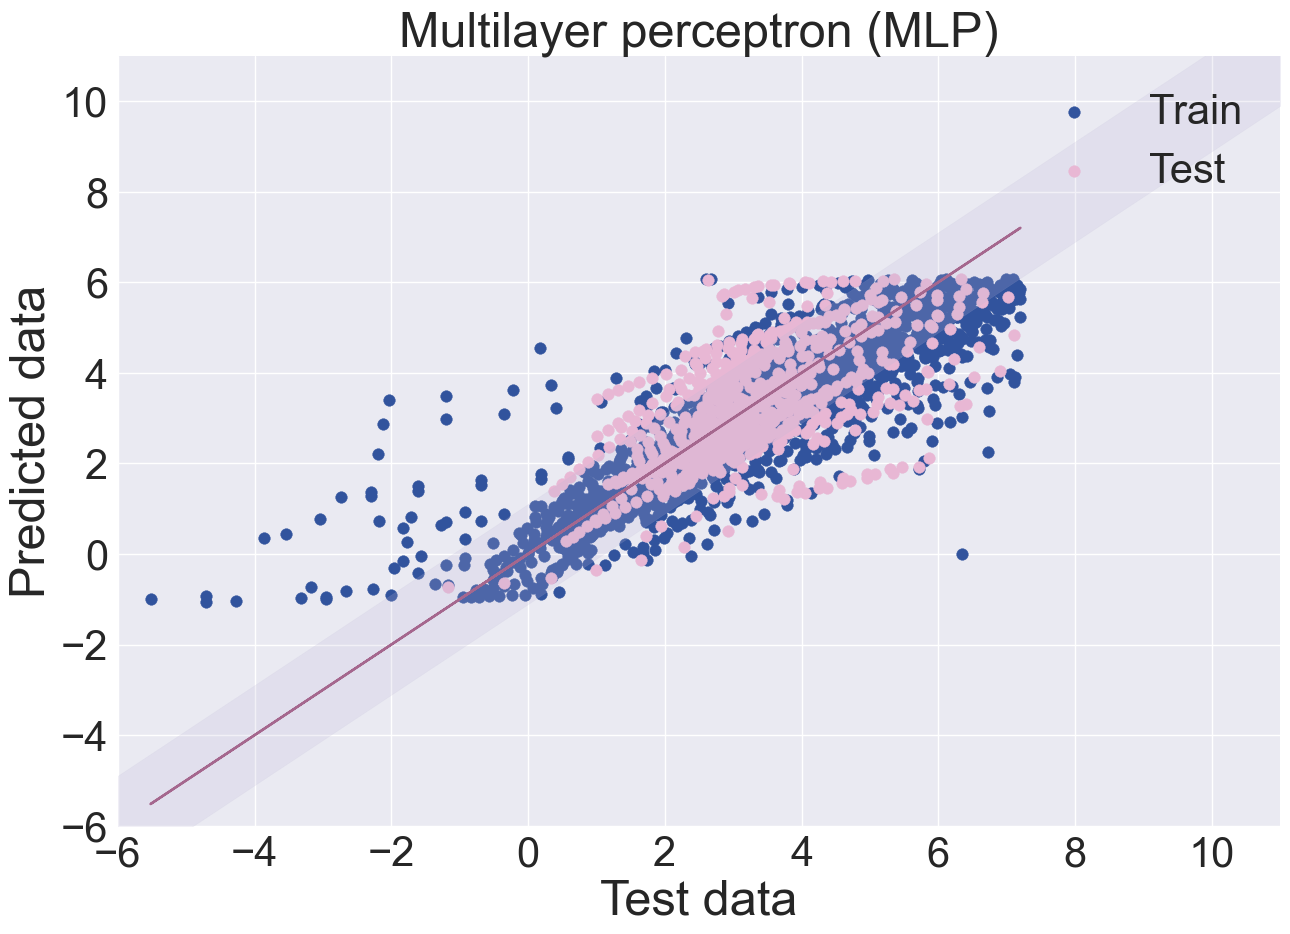

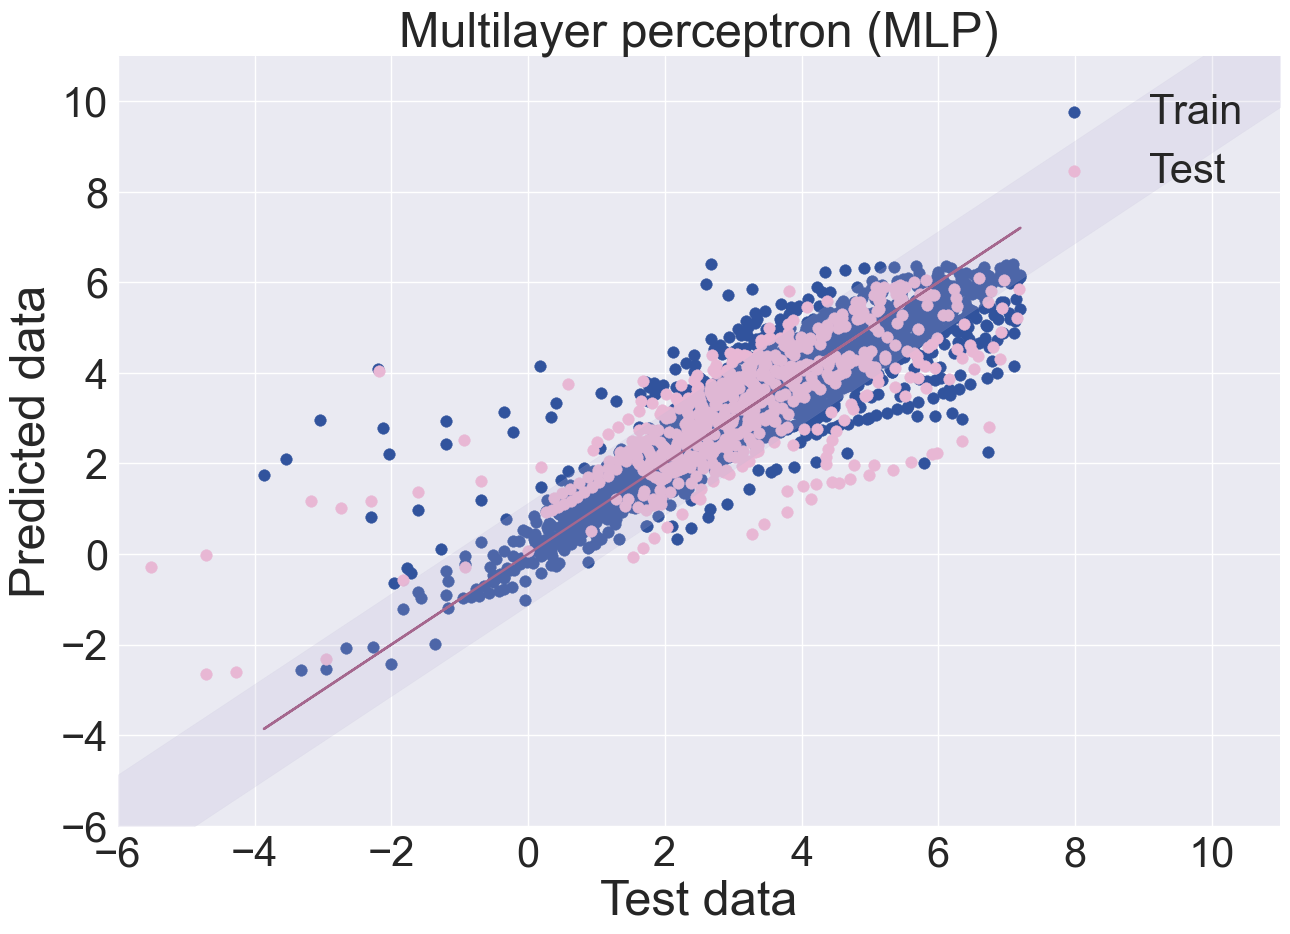

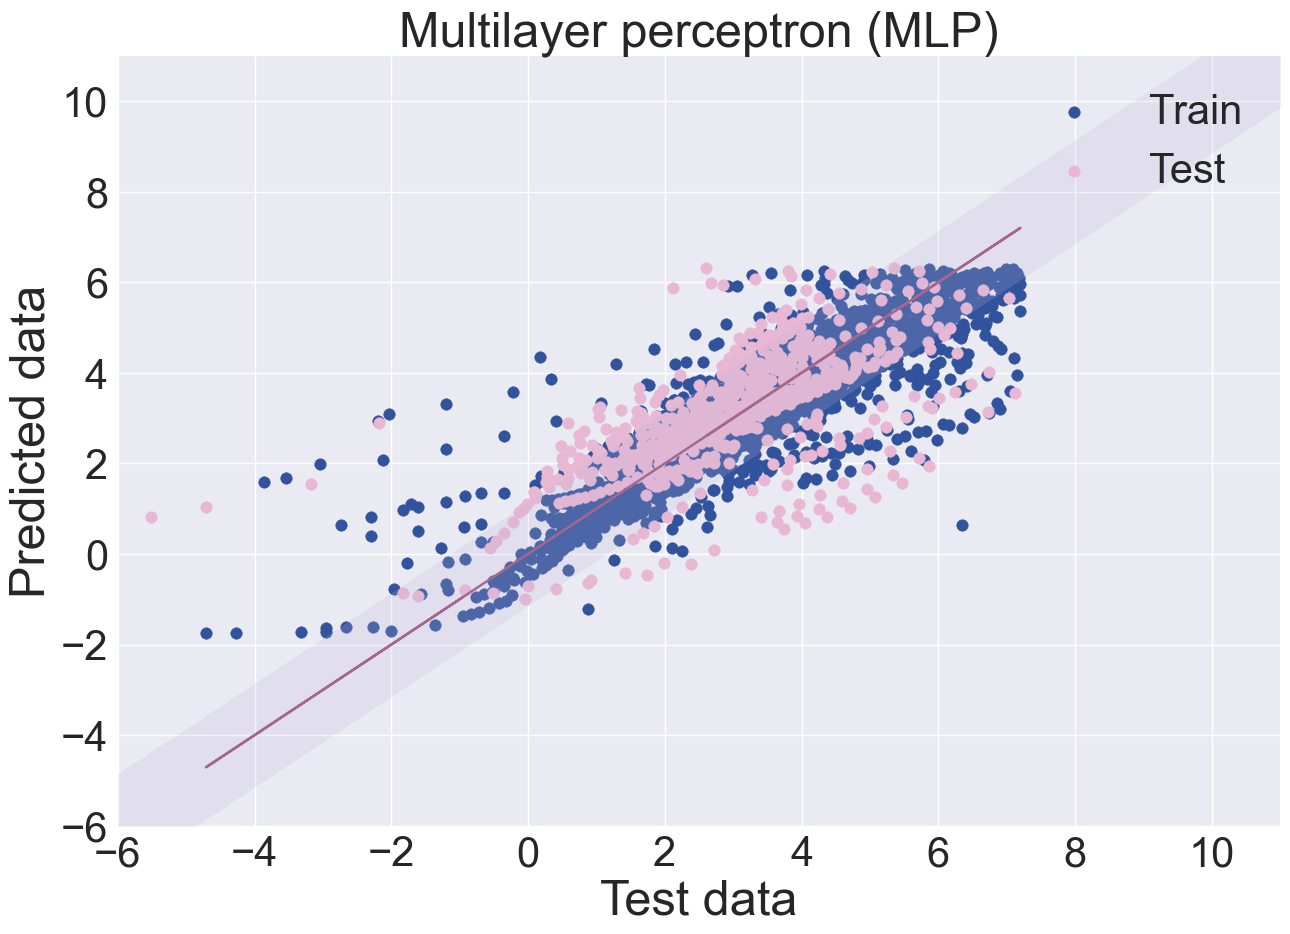

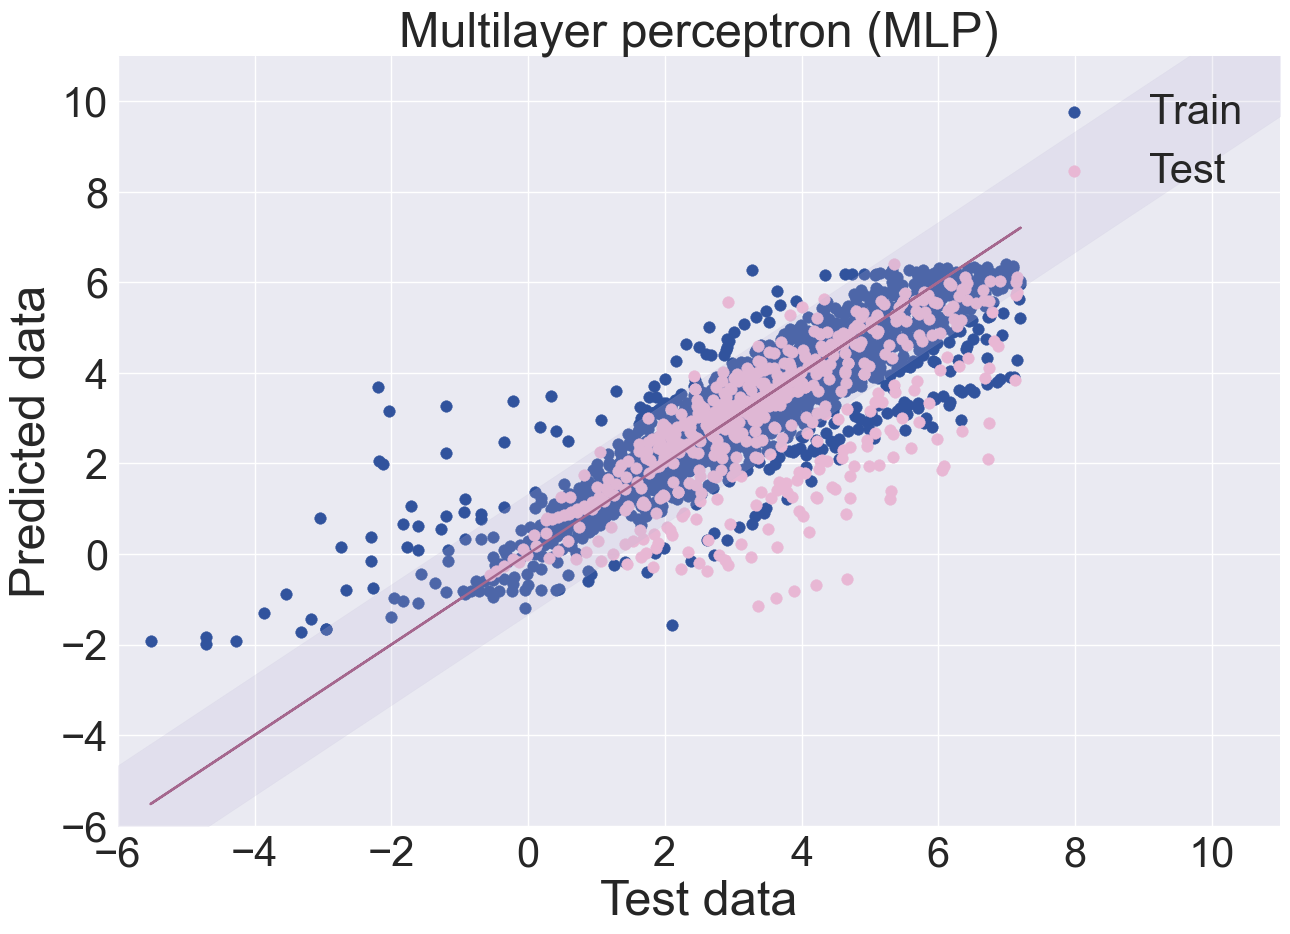

In [41]:
#MLP
count = 0
#Creating a table to check accuracy on different DES classes
MLP_df = x_model[:]
MLP_df['Viscosity_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #K-nearest neighbors
    MLP_regr = MLPRegressor(max_iter = 500, hidden_layer_sizes= hidden_layer_sizes, activation=activation, solver=solver, learning_rate= learning_rate, learning_rate_init=learning_rate_init, alpha=alpha)
    MLP_regr.fit(x_train_mod, y_train_mod)#,sample_weight=sample_w)
    y_pred = MLP_regr.predict(x_test_mod)
    y1_pred = MLP_regr.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    MLP_df['Viscosity_train' + str(count)] = None
    MLP_df['Viscosity_test' + str(count)] = None
    MLP_df['Viscosity_train' + str(count)].iloc[train_idx] = y1_pred
    MLP_df['Viscosity_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Multilayer perceptron (MLP)' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Multilayer perceptron (MLP)', fontsize=35)
df_error_train

In [42]:
df_error_MLP = metrics_class(MLP_df, 'Multilayer perceptron (MLP)')
df_error_MLP

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type     R2_train      R2_test  \
0   Multilayer perceptron (MLP)0         2     I -3335.246910          NaN   
1   Multilayer perceptron (MLP)0         2   III     0.656609     0.653031   
2   Multilayer perceptron (MLP)0         2    IV     0.940600     0.449684   
3   Multilayer perceptron (MLP)0         2     V     0.539586     0.647135   
4   Multilayer perceptron (MLP)0         3  None     0.906275    -0.583548   
5   Multilayer perceptron (MLP)1         2     I -7711.113612 -5158.877712   
6   Multilayer perceptron (MLP)1         2   III     0.669735     0.288048   
7   Multilayer perceptron (MLP)1         2    IV     0.734418     0.063432   
8   Multilayer perceptron (MLP)1         2     V     0.580366    -0.018843   
9   Multilayer perceptron (MLP)1         3  None     0.831104     0.389759   
10  Multilayer perceptron (MLP)2         2     I -7713.580262          NaN   
11  Multilayer perceptron (MLP)2         2   III     0.705106     0.500253   
12  Multilayer perceptron (MLP)2         2    IV     0.925876    -0.303101   
13  Multilayer perceptron (MLP)2         2     V     0.695219     0.508042   
14  Multilayer perceptron (MLP)2         3  None     0.900563    -0.059157   
15  Multilayer perceptron (MLP)3         2     I  -207.675559          NaN   
16  Multilayer perceptron (MLP)3         2   III     0.693712     0.528937   
17  Multilayer perceptron (MLP)3         2    IV     0.901075     0.498433   
18  Multilayer perceptron (MLP)3         2     V     0.579876     0.125236   
19  Multilayer perceptron (MLP)3         3  None     0.900218     0.484004   
20  Multilayer perceptron (MLP)4         2     I -1055.438070         None   
21  Multilayer perceptron (MLP)4         2   III     0.809611     0.597313   
22  Multilayer perceptron (MLP)4         2    IV     0.867590     0.584409   
23  Multilayer perceptron (MLP)4         2     V     0.655341    -0.245274   
24  Multilayer perceptron (MLP)4         3  None     0.882214     0.091503   

    RMSE_train RMSE_test  
0     2.205430       NaN  
1     0.705096  0.760794  
2     0.228294   0.48049  
3     1.201258  1.011152  
4     0.557539  2.136318  
5     3.439498  2.512643  
6     0.723864  0.943309  
7     0.425130  0.623342  
8     1.224453  1.308054  
9     0.754035  0.905328  
10    2.897533  1.707467  
11    0.677405  0.870849  
12    0.263623  0.515193  
13    0.954505  1.272911  
14    0.572480  1.305934  
15    0.437494  3.709123  
16    0.671221  0.748295  
17    0.261003  0.475216  
18    1.114010  1.821294  
19    0.608962  1.050248  
20    1.241041      None  
21    0.534551  0.799402  
22    0.301962  0.432573  
23    1.060179  1.563535  
24    0.617502  1.772453

**Output:** The algorithms given in this chapter have shown good results, on par with boosting

## 6. General graphs
For a visual comparison of all algorithms, graphs were constructed showing the dependence of R2 and RMSE from algorithm to algorithm

### 6.1. Graphs for various ML algorithms

In [43]:
#General table obtained after cross-validation
df_error_train.index = ['R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']
df_error_train

Linear Regression0  Linear Regression1  Linear Regression2  \
R2_train              0.490785            0.561918            0.513998   
R2_test               0.600815            0.139422            0.486092   
RMSE_train            1.198681            1.155901            1.137425   
RMSE_test             0.967889            1.134392            1.204905   

            Linear Regression3  Linear Regression4  Decision Tree Regression0  \
R2_train              0.528970            0.541923                  -0.494629   
R2_test               0.455162            0.334349                  -0.392954   
RMSE_train            1.156830            1.114544                   2.053618   
RMSE_test             1.065925            1.299729                   1.808035   

            Decision Tree Regression1  Decision Tree Regression2  \
R2_train                    -0.537736                  -0.654589   
R2_test                      0.016096                   0.066391   
RMSE_train                   2.165629                   2.098693   
RMSE_test                    1.212954                   1.624024   

            Decision Tree Regression3  Decision Tree Regression4  ...  \
R2_train                    -0.228106                   0.272850  ...   
R2_test                     -1.839248                   0.156508  ...   
RMSE_train                   1.867941                   1.404235  ...   
RMSE_test                    2.433295                   1.463087  ...   

            K-nearest neighbors0  K-nearest neighbors1  K-nearest neighbors2  \
R2_train                0.929269              0.934976              0.927397   
R2_test                 0.751715              0.450462              0.686983   
RMSE_train              0.446745              0.445328              0.439622   
RMSE_test               0.763333              0.906498              0.940360   

            K-nearest neighbors3  K-nearest neighbors4  \
R2_train                0.930785              0.935887   
R2_test                 0.560153              0.537461   
RMSE_train              0.443452              0.416966   
RMSE_test               0.957732              1.083438   

            Multilayer perceptron (MLP)0  Multilayer perceptron (MLP)1  \
R2_train                        0.715745                      0.718188   
R2_test                         0.500375                      0.183861   
RMSE_train                      0.895586                      0.927092   
RMSE_test                       1.082831                      1.104715   

            Multilayer perceptron (MLP)2  Multilayer perceptron (MLP)3  \
R2_train                        0.784531                      0.740134   
R2_test                         0.547354                      0.381512   
RMSE_train                      0.757349                      0.859251   
RMSE_test                       1.130810                      1.135687   

            Multilayer perceptron (MLP)4  
R2_train                        0.780244  
R2_test                         0.300430  
RMSE_train                      0.771966  
RMSE_test                       1.332433  

[4 rows x 45 columns]

In [44]:
#Table with averages and deviations for metrics
df_error_train_1 = df_error_train.transpose()
f_get_name = lambda x: x[:-1]
df_error_train_1['Regr'] = df_error_train_1.index
df_error_train_1['Regr'] = df_error_train_1['Regr'].apply(f_get_name)
df_error_train_1 = df_error_train_1.groupby('Regr').agg(['mean', 'std'])
df_error_train_1.columns = ['_'.join(col).rstrip('_') for col in df_error_train_1.columns.values] #Названия для новых столбцов
df_error_train_1

R2_train_mean  R2_train_std  R2_test_mean  \
Regr                                                                      
Cat Boosting Regression            0.915442      0.007625      0.668838   
Decision Tree Regression          -0.328442      0.370612     -0.398641   
Gradient Boosting Regression       0.947016      0.006734      0.581048   
K-nearest neighbors                0.931663      0.003658      0.597355   
Linear Regression                  0.527519      0.027042      0.403168   
Multilayer perceptron (MLP)        0.747768      0.033034      0.382706   
Random Forest Regression           0.774153      0.014922      0.544768   
Support Vector Machine             0.693379      0.032333      0.504528   
XGBoosting Regression              0.998051      0.000438      0.666386   

                              R2_test_std  RMSE_train_mean  RMSE_train_std  \
Regr                                                                         
Cat Boosting Regression          0.027333         0.487491        0.024300   
Decision Tree Regression         0.832441         1.918023        0.307743   
Gradient Boosting Regression     0.054457         0.385409        0.019960   
K-nearest neighbors              0.120840         0.438423        0.012289   
Linear Regression                0.175316         1.152676        0.030947   
Multilayer perceptron (MLP)      0.147703         0.842249        0.074967   
Random Forest Regression         0.035414         0.796996        0.029265   
Support Vector Machine           0.100530         0.928477        0.059507   
XGBoosting Regression            0.058724         0.073577        0.006583   

                              RMSE_test_mean  RMSE_test_std  
Regr                                                         
Cat Boosting Regression             0.859110       0.104210  
Decision Tree Regression            1.708279       0.460479  
Gradient Boosting Regression        0.960984       0.075135  
K-nearest neighbors                 0.930272       0.114836  
Linear Regression                   1.134568       0.127200  
Multilayer perceptron (MLP)         1.157295       0.100189  
Random Forest Regression            1.008693       0.135642  
Support Vector Machine              1.044732       0.154345  
XGBoosting Regression               0.856881       0.095090

In [45]:
df_error_train_1 = df_error_train_1.drop(index= 'Linear Regression')

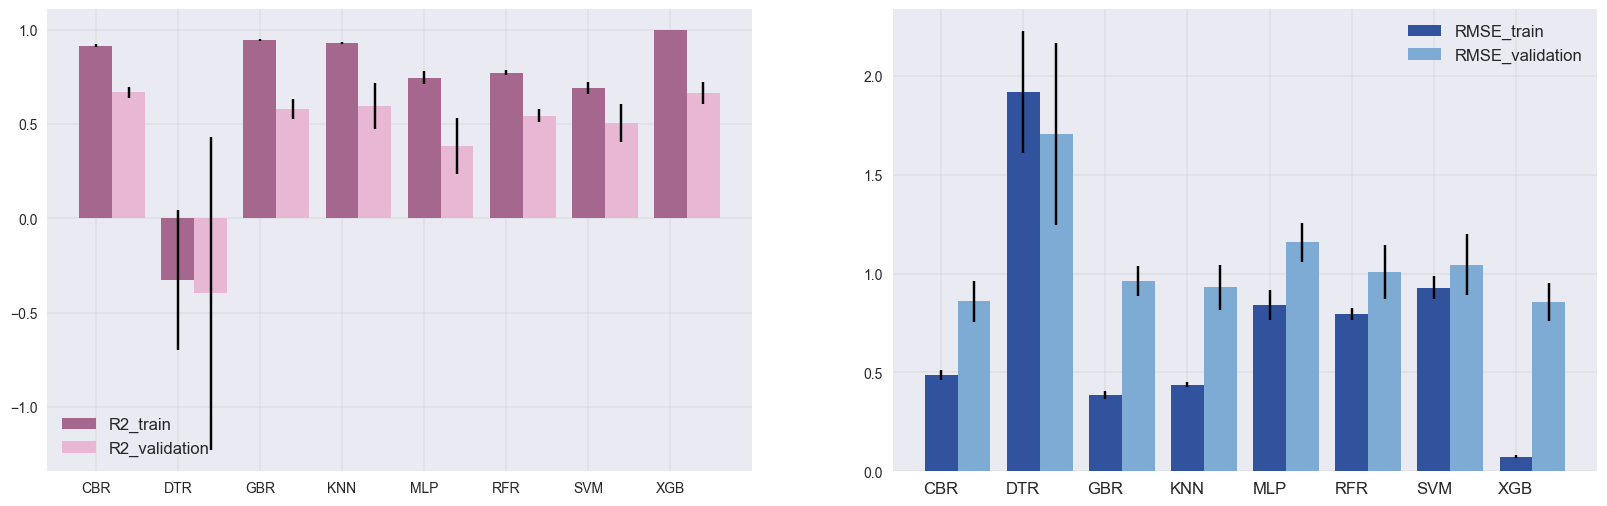

In [46]:
import matplotlib.patches as mpatches
#Let's build a graph that will help compare the methods by the main metrics

barWidth = 0.4

br1 = np.arange(8)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(8)
br4 = [x + barWidth for x in br3]

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 6))

ax1.bar(br1, df_error_train_1['R2_train_mean'], color =colors[0], width = barWidth, label ='R2_train', yerr = df_error_train_1['R2_train_std'])
ax1.bar(br2, df_error_train_1['R2_test_mean'], color =colors[1], width = barWidth, label ='R2_validation', yerr = df_error_train_1['R2_test_std'])

ax2.bar(br3, df_error_train_1['RMSE_train_mean'], color =colors[4], width = barWidth, label ='RMSE_train', yerr = df_error_train_1['RMSE_train_std'])
ax2.bar(br4, df_error_train_1['RMSE_test_mean'], color =colors[3], width = barWidth, label ='RMSE_validation', yerr = df_error_train_1['RMSE_test_std'])

plt.xticks(br1, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)
        
ax1.grid(color='#C3C6BA', linewidth=0.3)
ax2.grid(color='#C3C6BA', linewidth=0.3)


ax1.legend(fontsize = 12)
ax2.legend(fontsize = 12)


### 6.2. Graphs for different types of DES
Also, to understand how well the models predict values for different types of DES, we will build graphs that will help you see this

In [47]:
# Let's put all the tables into one
df_error_types = df_error_CBR.append((df_error_DTR, df_error_GBR, df_error_KNN, df_error_MLP, df_error_RFR, df_error_SVM, df_error_XGB))
df_error_types['Type'] = df_error_types['Type'].fillna(0)
df_error_types

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Algorithm MO  Num_comp Type  R2_train   R2_test  RMSE_train  \
0   Cat Boosting Regression0         2    I -0.013549       NaN    0.038440   
1   Cat Boosting Regression0         2  III  0.833342  0.679281    0.491211   
2   Cat Boosting Regression0         2   IV  0.990681   0.83649    0.090424   
3   Cat Boosting Regression0         2    V  0.892689    0.7017    0.579940   
4   Cat Boosting Regression0         3    0  0.957749  0.554159    0.374337   
..                       ...       ...  ...       ...       ...         ...   
20    XGBoosting Regression4         2    I  0.996308      None    0.002320   
21    XGBoosting Regression4         2  III  0.994515  0.342361    0.090730   
22    XGBoosting Regression4         2   IV  0.999995  0.948759    0.001804   
23    XGBoosting Regression4         2    V  0.998796  0.544205    0.062656   
24    XGBoosting Regression4         3    0  0.998365   0.55217    0.072747   

   RMSE_test  
0        NaN  
1   0.731448  
2   0.261909  
3   0.929692  
4    1.13355  
..       ...  
20      None  
21  1.021587  
22  0.151893  
23  0.945932  
24  1.244427  

[200 rows x 7 columns]

In [48]:
#Table with averages and deviations for metrics
f_get_name = lambda x: x[:-1]

df_error_types['Algorithm MO'] = df_error_types['Algorithm MO'].apply(f_get_name)
df_error_types = df_error_types.groupby(['Algorithm MO','Num_comp', 'Type']).agg(['mean', 'std'])
df_error_types.columns = ['_'.join(col).rstrip('_') for col in df_error_types.columns.values] #Названия для новых столбцов
df_error_types = df_error_types.reset_index()
df_error_types

Algorithm MO  Num_comp Type  R2_train_mean  R2_train_std  \
0        Cat Boosting Regression         2    I       0.468821      0.343204   
1        Cat Boosting Regression         2  III       0.841125      0.014270   
2        Cat Boosting Regression         2   IV       0.984330      0.007779   
3        Cat Boosting Regression         2    V       0.903758      0.014142   
4        Cat Boosting Regression         3    0       0.952283      0.010529   
5        Decision Tree Regressor         2    I      -0.563818      0.608227   
6        Decision Tree Regressor         2  III       0.202046      0.074879   
7        Decision Tree Regressor         2   IV       0.358701      0.064952   
8        Decision Tree Regressor         2    V       0.028854      0.034840   
9        Decision Tree Regressor         3    0      -1.783080      1.360272   
10  Gradient Boosting Regression         2    I       0.924012      0.056601   
11  Gradient Boosting Regression         2  III       0.901446      0.011609   
12  Gradient Boosting Regression         2   IV       0.992332      0.001261   
13  Gradient Boosting Regression         2    V       0.943242      0.006021   
14  Gradient Boosting Regression         3    0       0.964366      0.007132   
15           K-nearest neighbors         2    I    -507.449338    340.038547   
16           K-nearest neighbors         2  III       0.903697      0.011843   
17           K-nearest neighbors         2   IV       0.759251      0.026882   
18           K-nearest neighbors         2    V       0.915130      0.005954   
19           K-nearest neighbors         3    0       0.954981      0.004688   
20   Multilayer perceptron (MLP)         2    I   -4004.610883   3572.709147   
21   Multilayer perceptron (MLP)         2  III       0.706955      0.060492   
22   Multilayer perceptron (MLP)         2   IV       0.873912      0.082741   
23   Multilayer perceptron (MLP)         2    V       0.610077      0.063368   
24   Multilayer perceptron (MLP)         3    0       0.884075      0.030962   
25      Random Forest Regression         2    I     -47.816786     41.498362   
26      Random Forest Regression         2  III       0.723567      0.024282   
27      Random Forest Regression         2   IV       0.774198      0.023042   
28      Random Forest Regression         2    V       0.673557      0.014667   
29      Random Forest Regression         3    0       0.868881      0.016926   
30        Support Vector Machine         2    I     -54.867068      4.516492   
31        Support Vector Machine         2  III       0.740387      0.042144   
32        Support Vector Machine         2   IV       0.961298      0.009528   
33        Support Vector Machine         2    V       0.430368      0.072530   
34        Support Vector Machine         3    0       0.911349      0.018083   
35         XGBoosting Regression         2    I       0.997075      0.004120   
36         XGBoosting Regression         2  III       0.995008      0.000870   
37         XGBoosting Regression         2   IV       0.999996      0.000002   
38         XGBoosting Regression         2    V       0.998936      0.000257   
39         XGBoosting Regression         3    0       0.998279      0.000696   

    R2_test_mean  R2_test_std  RMSE_train_mean  RMSE_train_std  \
0     -59.710854          NaN         0.024569        0.010813   
1       0.651391     0.093846         0.489554        0.018876   
2       0.785250     0.210621         0.106171        0.019735   
3       0.627911     0.089868         0.551028        0.032421   
4       0.485195     0.103808         0.399766        0.042534   
5      -0.508284          NaN         0.043675        0.007049   
6       0.055859     0.463518         1.097454        0.055233   
7       0.174344     0.225355         0.702272        0.065514   
8       0.039031     0.101247         1.756554        0.071330   
9      -3.315535     2.759058         2.953660        0.958689   
10      0.460

invalid value encountered in reduce
invalid value encountered in reduce


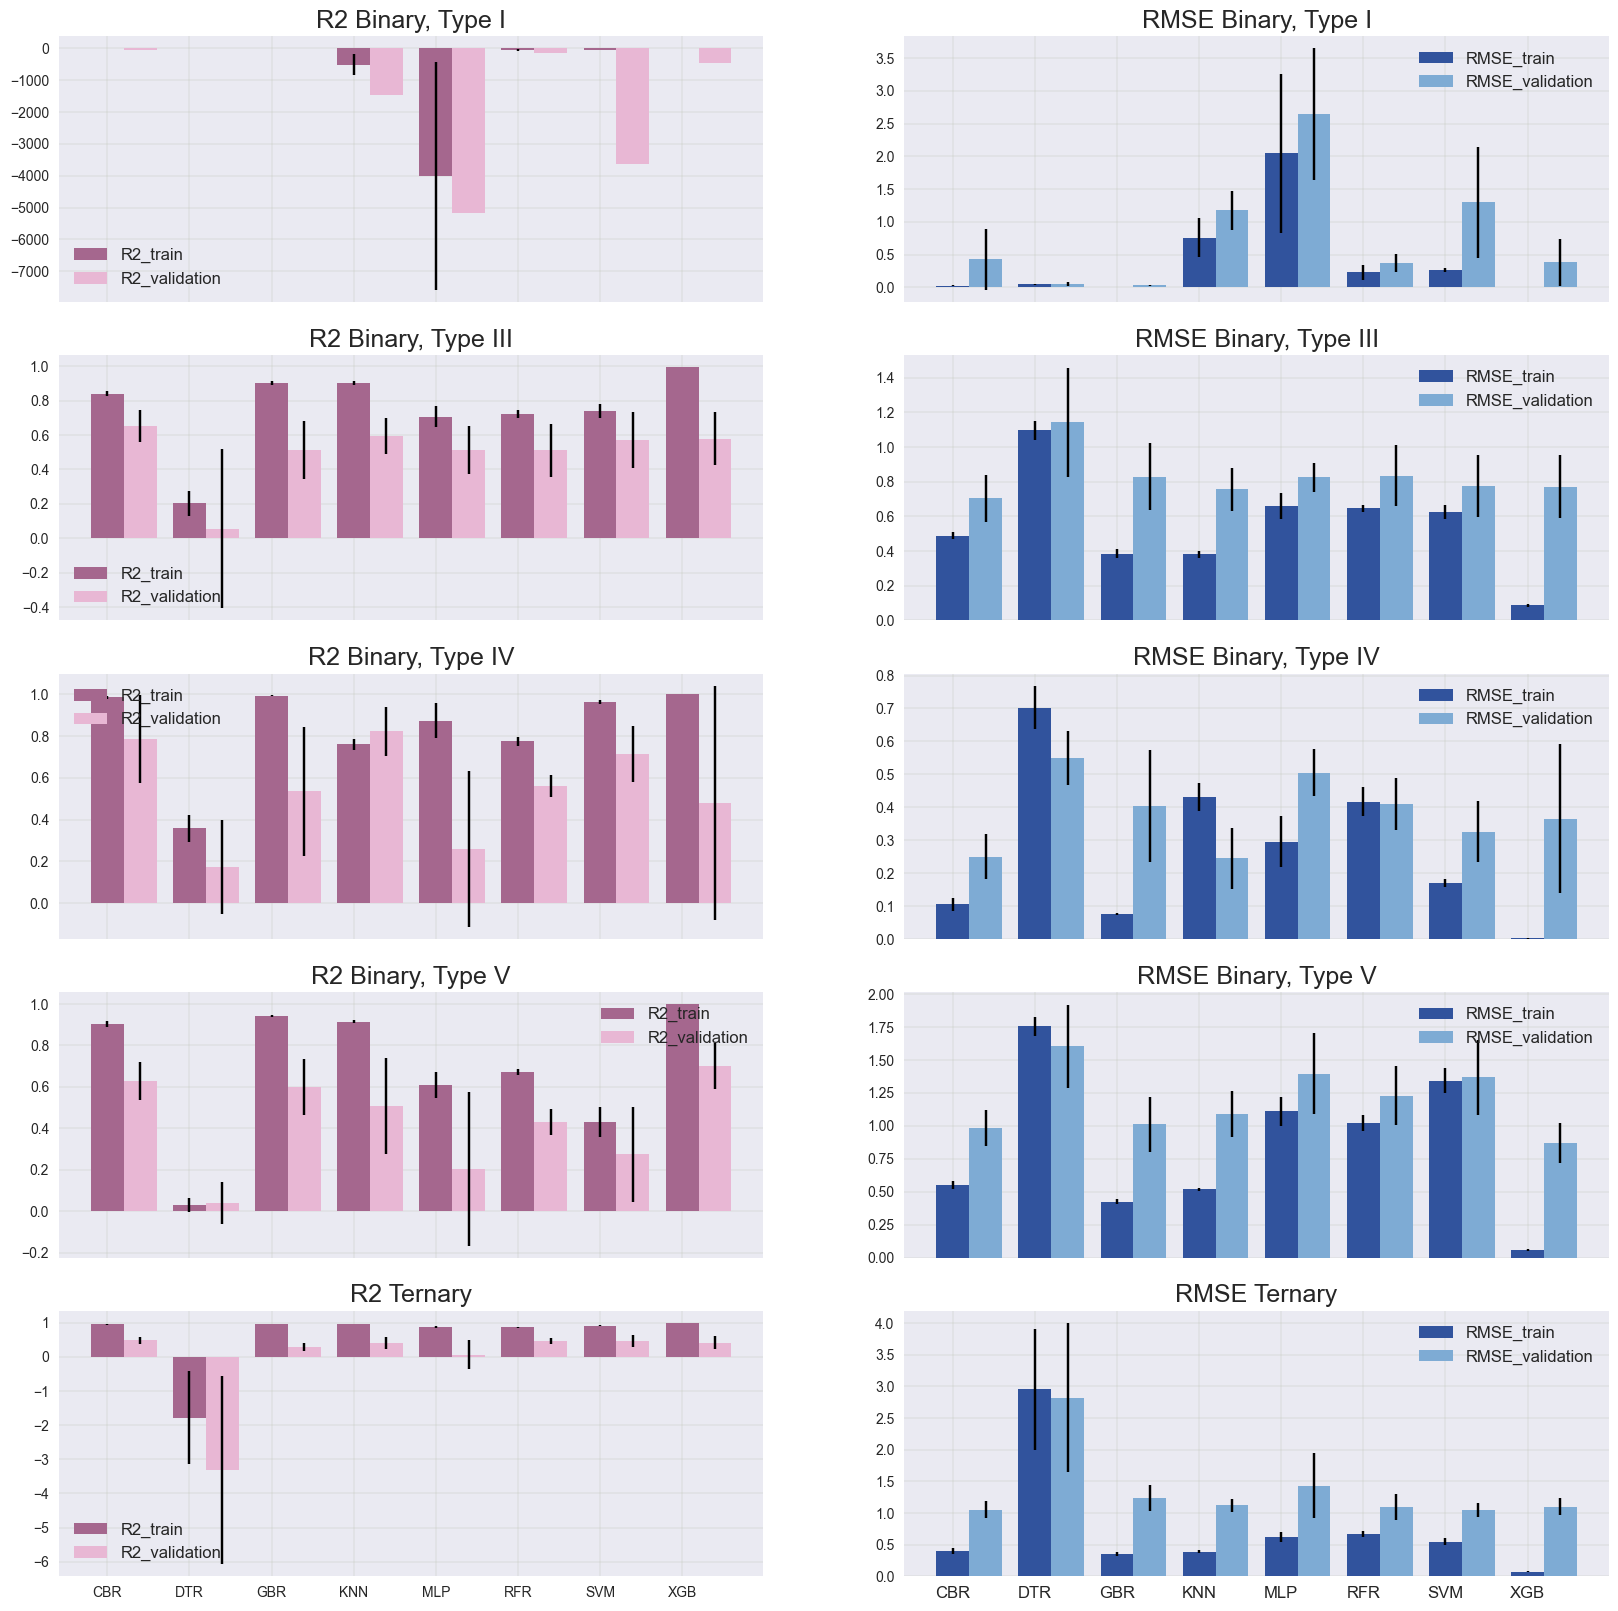

In [49]:
#Let's build a graph that will help compare the methods by the main metrics

barWidth = 0.4

br1 = np.arange(8)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(8)
br4 = [x + barWidth for x in br3]

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, figsize=(20, 20))

count = 0
conditions = [df_error_types['Type'] == 'I', df_error_types['Type'] == 'III', df_error_types['Type'] == 'IV', df_error_types['Type'] == 'V', df_error_types['Num_comp'] == 3]
Names = ['Binary, Type I', 'Binary, Type III', 'Binary, Type IV', 'Binary, Type V', 'Ternary']
for i in range(5):
  ax[i][0].bar(br1, df_error_types[conditions[count]]['R2_train_mean'], color =colors[0], width = barWidth, label ='R2_train', yerr = df_error_types[conditions[count]]['R2_train_std'])
  ax[i][0].bar(br2, df_error_types[conditions[count]]['R2_test_mean'], color =colors[1], width = barWidth, label ='R2_validation', yerr = df_error_types[conditions[count]]['R2_test_std'])
  ax[i][0].set_title('R2' + ' ' + Names[count], fontsize = 18)
  plt.xticks(br1, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)

  ax[i][1].bar(br3, df_error_types[conditions[count]]['RMSE_train_mean'], color =colors[4], width = barWidth, label ='RMSE_train', yerr = df_error_types[conditions[count]]['RMSE_train_std'])
  ax[i][1].bar(br4, df_error_types[conditions[count]]['RMSE_test_mean'], color =colors[3], width = barWidth, label ='RMSE_validation', yerr = df_error_types[conditions[count]]['RMSE_test_std'])
  ax[i][1].set_title(('RMSE' + ' ' + Names[count]), fontsize = 18)
  plt.xticks(br3, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)
  
          
  ax[i][0].grid(color='#C3C6BA', linewidth=0.3)
  ax[i][1].grid(color='#C3C6BA', linewidth=0.3)


  ax[i][0].legend(fontsize = 12)
  ax[i][1].legend(fontsize = 12)
  count += 1

## General conclusions:
The highest results were shown by Car Boosting XGBoosting, on the validation sample these models have R2 = , and RMSE equal to . The XGBoosting model also shows good results for predicting the density of all types of DES


In [50]:
#Сохранение модели
import pickle
filename = 'viscosity_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regr_CBR, file)
    file.close()

## 7. Applying the best model on test data

In [51]:
import pickle
df_error_train3 = pd.DataFrame()

0:	learn: 1.7084220	total: 2.1ms	remaining: 1.26s
1:	learn: 1.6393425	total: 3.76ms	remaining: 1.13s
2:	learn: 1.5850477	total: 5.05ms	remaining: 1s
3:	learn: 1.5211481	total: 6.32ms	remaining: 942ms
4:	learn: 1.4592903	total: 7.74ms	remaining: 921ms
5:	learn: 1.4052157	total: 9.06ms	remaining: 897ms
6:	learn: 1.3508087	total: 10.4ms	remaining: 882ms
7:	learn: 1.3059419	total: 11.7ms	remaining: 868ms
8:	learn: 1.2612655	total: 13.2ms	remaining: 864ms
9:	learn: 1.2179776	total: 14.5ms	remaining: 854ms
10:	learn: 1.1800762	total: 15.8ms	remaining: 848ms
11:	learn: 1.1376871	total: 17.4ms	remaining: 850ms
12:	learn: 1.1159583	total: 18.3ms	remaining: 826ms
13:	learn: 1.0792806	total: 19.7ms	remaining: 826ms
14:	learn: 1.0411194	total: 21.3ms	remaining: 832ms
15:	learn: 1.0104210	total: 22.8ms	remaining: 831ms
16:	learn: 0.9805608	total: 24.6ms	remaining: 842ms
17:	learn: 0.9557330	total: 26.1ms	remaining: 843ms
18:	learn: 0.9255603	total: 27.5ms	remaining: 840ms
19:	learn: 0.9020380	total

Text(0.5, 1.0, 'Cat Boosting Regression')

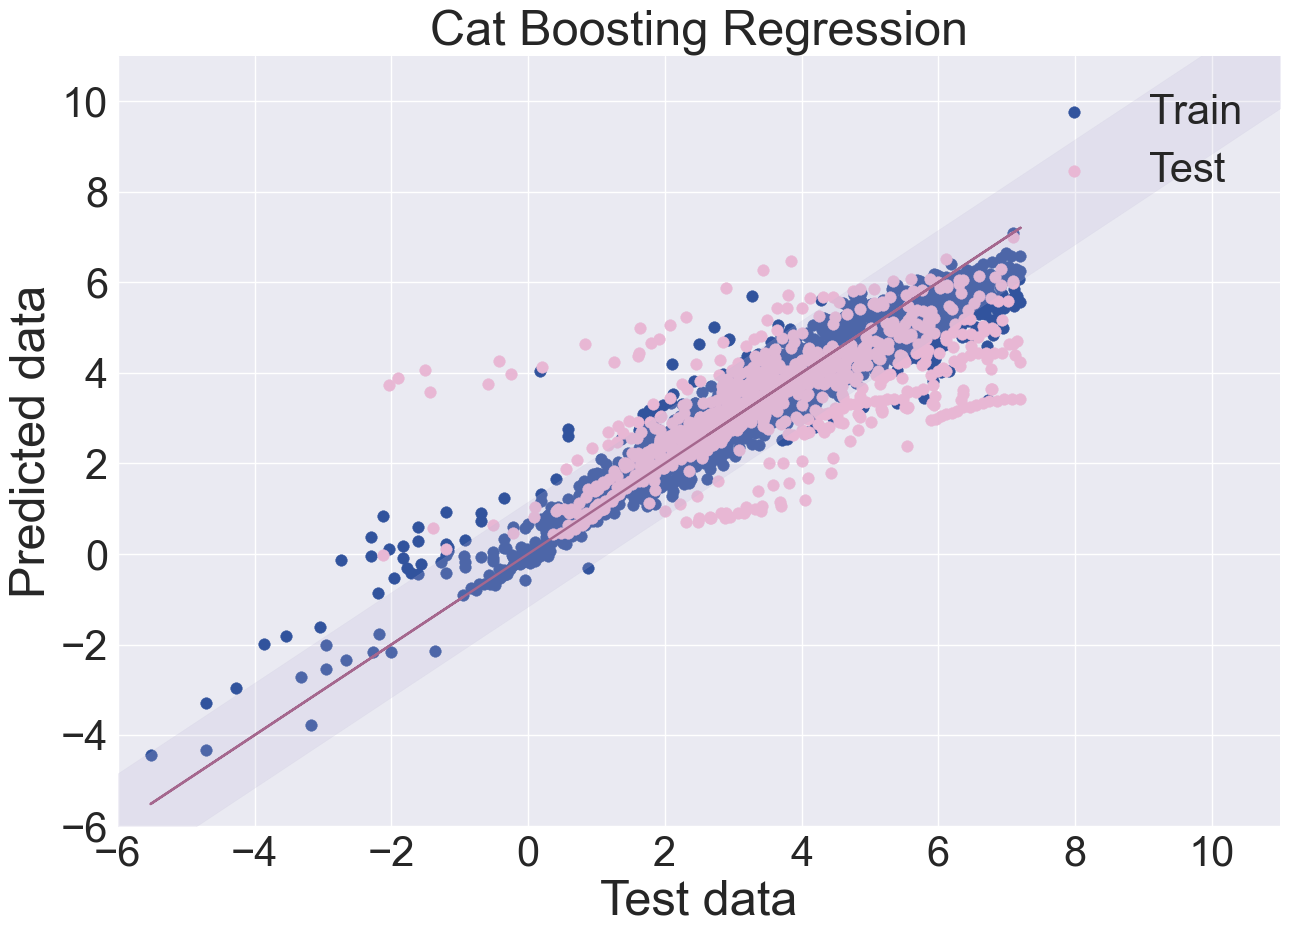

In [53]:
df_error_train3 = pd.DataFrame()
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Viscosity, cP']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
x_train = x_train.copy().drop(['ind_syst'],axis=1)
x_test = x_test.copy().drop(['ind_syst'],axis=1)
sample_w = compute_sample_weight('balanced', y=(x_train[['I','II','III','IV','V']]))
#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#CBR
with open('viscosity_model.pkl', 'rb') as file: 
 pickle_model = pickle.load(file)
regr_CBR = pickle_model
regr_CBR.fit(x_train, y_train, sample_weight=sample_w)
y_pred = regr_CBR.predict(x_test)
y1_pred = regr_CBR.predict(x_train)
#Calculating metrics
df_error_train3['Cat Boosting Regression'] = regr_metrics(regr_CBR, x_train, y_train, y_test, y_pred, y1_pred)
#Plotting a graph
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Cat Boosting Regression', fontsize=35)

In [54]:
df_error_train3

Cat Boosting Regression
0                 0.913165
1                 0.506575
2                 0.483621
3                 1.158039

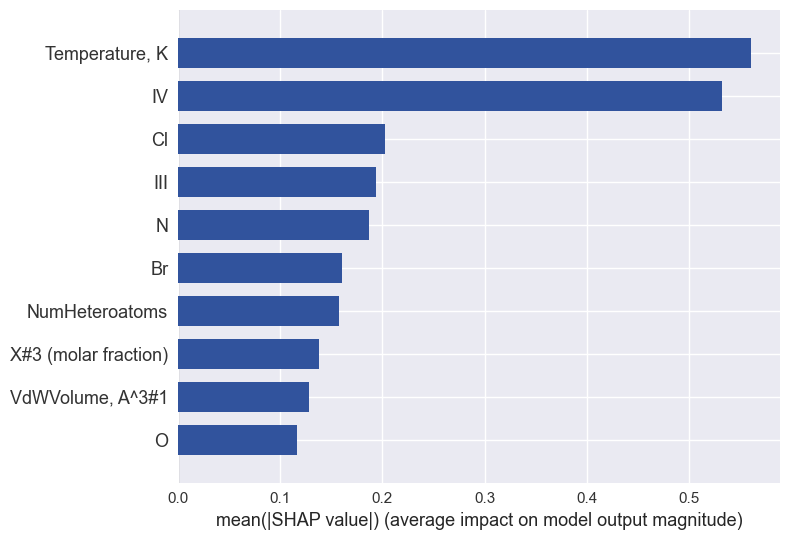

In [55]:
regr_feature(regr_CBR, x_test, list_columns)